# Variaveis categoricas

👥 DATASET DE FUNCIONÁRIOS CRIADO COM SUCESSO!
Total de registros (linhas): 500
Total de variáveis (colunas): 6
Estrutura: 500 funcionários × 6 características

🔍 CLASSIFICAÇÃO AUTOMÁTICA DOS TIPOS DE VARIÁVEIS:

📊 ANALISANDO VARIÁVEL: DEPARTAMENTO
------------------------------
🏷️  TIPO IDENTIFICADO: CATEGÓRICA
   • Número de categorias distintas: 5
   • Categorias encontradas: ['Vendas', 'Financeiro', 'Marketing', 'TI', 'RH']
   • SUBTIPO: Nominal (sem ordem natural entre categorias)
   • Distribuição de frequência:
     - TI: 154 funcionários (30.8%)
     - Vendas: 118 funcionários (23.6%)
     - Marketing: 97 funcionários (19.4%)
     - RH: 76 funcionários (15.2%)
     - Financeiro: 55 funcionários (11.0%)
   • Amostra de valores reais: ['Vendas', 'Financeiro', 'Marketing', 'Marketing', 'TI']
   ✅ Qualidade: Nenhum valor ausente detectado

📊 ANALISANDO VARIÁVEL: NIVEL_ESCOLARIDADE
------------------------------
🏷️  TIPO IDENTIFICADO: CATEGÓRICA
   • Número de categorias distintas: 4

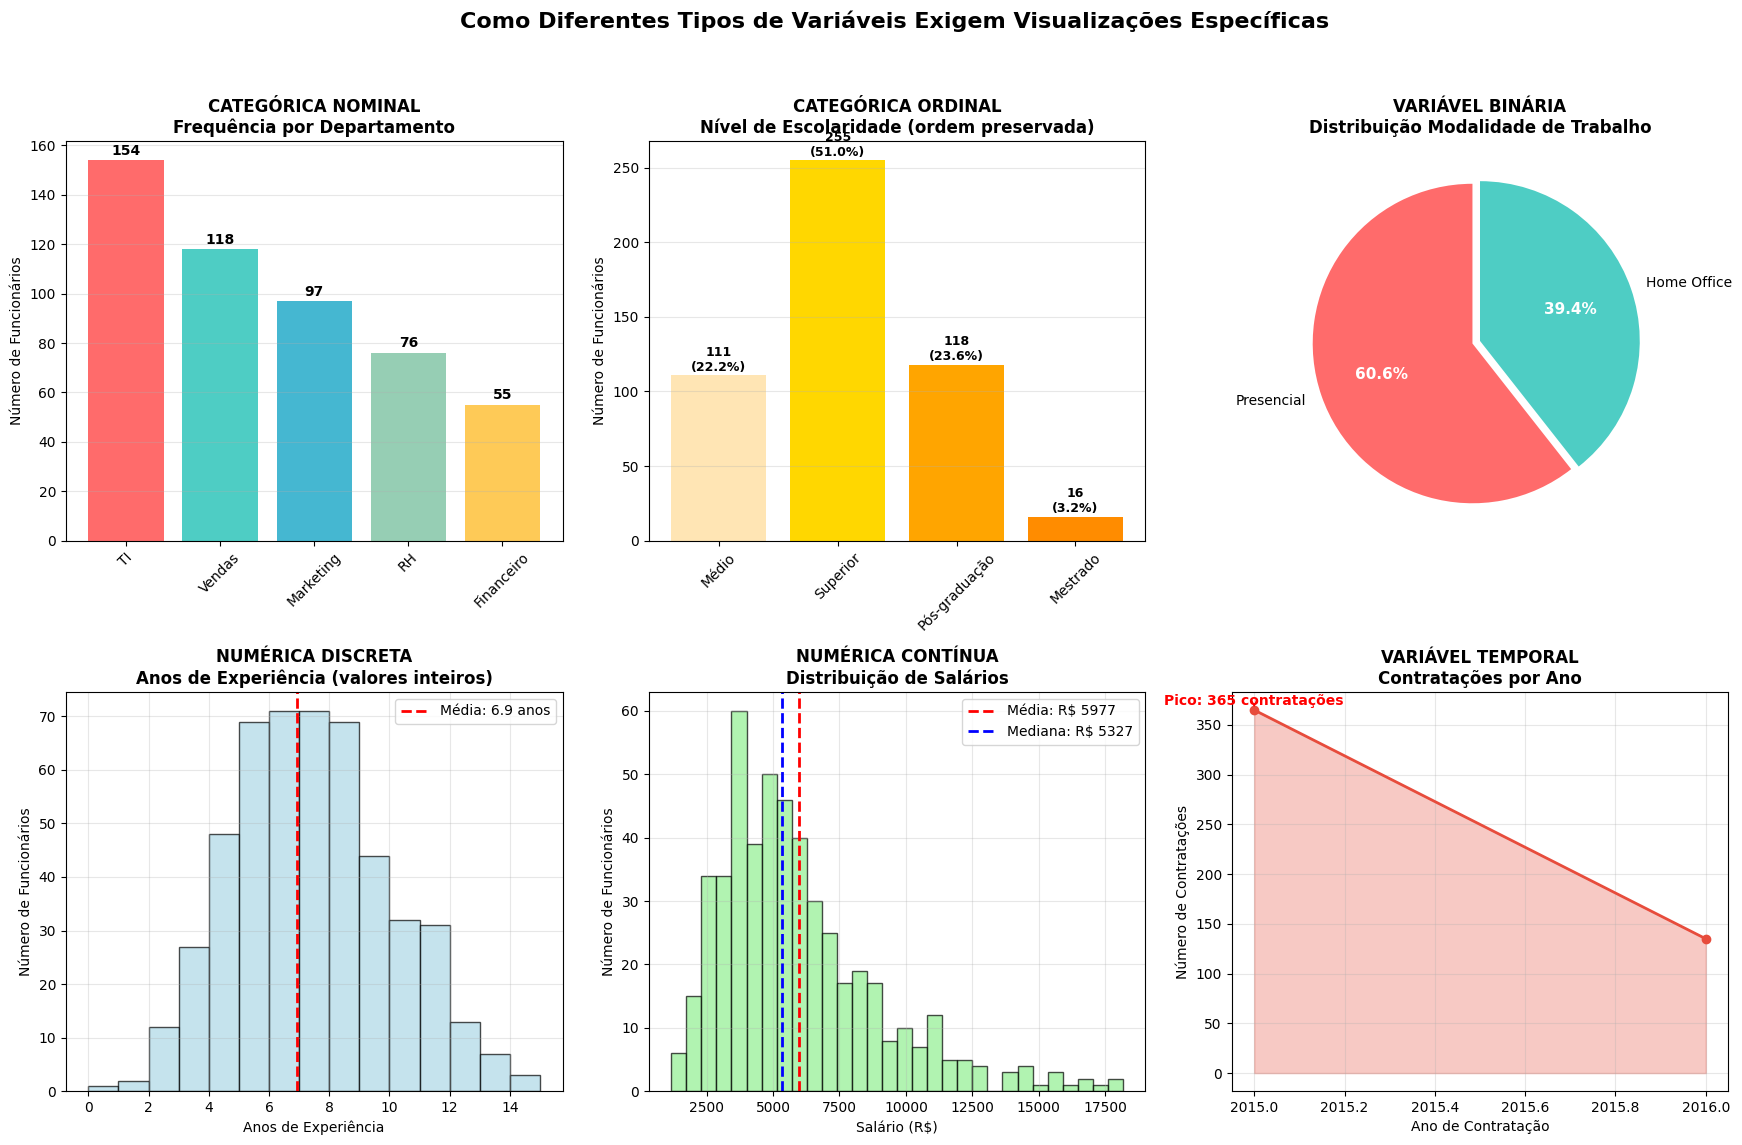


💡 INSIGHTS DESCOBERTOS ATRAVÉS DAS VISUALIZAÇÕES:
------------------------------------------------------------
• CATEGÓRICA NOMINAL: TI é o departamento dominante com 154 funcionários (30.8%)
• CATEGÓRICA ORDINAL: Superior é o nível mais comum de escolaridade (255 funcionários)
• BINÁRIA: 39.4% trabalham em home office
• NUMÉRICA DISCRETA: Experiência média de 6.9 anos (moda: 6 anos)
• NUMÉRICA CONTÍNUA: Salário médio de R$ 5977 (mediana: R$ 5327)
• TEMPORAL: Pico de contratações em 2015 com 365 novas contratações

🎯 IMPORTÂNCIA DA ESCOLHA CORRETA:
• Cada tipo de variável revela insights diferentes quando visualizada adequadamente
• Usar visualização errada pode esconder padrões importantes ou criar interpretações falsas
• A escolha da visualização deve sempre considerar o tipo de dados e o objetivo da análise


In [ ]:
# BLOCO 1: Configuração inicial e criação de dataset demonstrativo
# Este bloco prepara o ambiente e cria dados sintéticos que representam funcionários de uma empresa

# Importando bibliotecas essenciais para análise de dados
import pandas as pd          # Para manipulação de dados tabulares (DataFrames)
import numpy as np           # Para operações matemáticas e geração de números aleatórios
import matplotlib.pyplot as plt  # Para criação de gráficos e visualizações

# Simulando base de dados de funcionários de uma empresa real
# Fixando semente para garantir que os resultados sejam reproduzíveis
np.random.seed(42)
n_funcionarios = 500  # Definindo o tamanho da nossa amostra de funcionários

# Criando dicionário com dados que representam diferentes tipos de variáveis
# Cada chave será uma coluna no nosso DataFrame final
dados_funcionarios = {
    # VARIÁVEL CATEGÓRICA NOMINAL - sem ordem natural entre as categorias
    # Distribuindo funcionários entre departamentos com probabilidades realistas
    # TI tem 30% (setor em crescimento), Vendas 25%, Marketing 20%, RH 15%, Financeiro 10%
    'departamento': np.random.choice(['TI', 'Vendas', 'Marketing', 'RH', 'Financeiro'],
                                    n_funcionarios, p=[0.3, 0.25, 0.2, 0.15, 0.1]),

    # VARIÁVEL CATEGÓRICA ORDINAL - tem ordem natural crescente de qualificação
    # Superior é mais comum (50%), seguido por pós-graduação (25%), médio (20%), mestrado (5%)
    'nivel_escolaridade': np.random.choice(['Médio', 'Superior', 'Pós-graduação', 'Mestrado'],
                                          n_funcionarios, p=[0.2, 0.5, 0.25, 0.05]),

    # VARIÁVEL NUMÉRICA CONTÍNUA - pode assumir qualquer valor numa faixa
    # Usando distribuição log-normal pois salários tendem a ser assimétricos
    # (muitos salários baixos/médios, poucos salários muito altos)
    # mean=log(5000) centra em R$5.000, sigma=0.5 controla a dispersão
    'salario': np.random.lognormal(mean=np.log(5000), sigma=0.5, size=n_funcionarios).round(2),

    # VARIÁVEL NUMÉRICA DISCRETA - apenas números inteiros específicos
    # Usando distribuição Poisson com lambda=7 (média de 7 anos de experiência)
    # Poisson é adequada para contagens (anos, número de projetos, etc.)
    'anos_experiencia': np.random.poisson(lam=7, size=n_funcionarios),

    # VARIÁVEL BINÁRIA - apenas dois valores possíveis (True/False)
    # 40% trabalham em home office, 60% presencial (reflete tendência pós-pandemia)
    'home_office': np.random.choice([True, False], n_funcionarios, p=[0.4, 0.6]),

    # VARIÁVEL TEMPORAL - representa datas/horários
    # Criando datas de contratação desde 2015 até hoje
    # Simulando contratações em intervalos irregulares (1, 2 ou 3 dias)
    'data_contratacao': pd.date_range('2015-01-01', periods=n_funcionarios,
                                     freq=np.random.choice(['D', '2D', '3D']))[:n_funcionarios]
}

# Convertendo o dicionário em DataFrame (estrutura tabular do pandas)
# Cada chave vira uma coluna, cada posição do array vira uma linha
df_funcionarios = pd.DataFrame(dados_funcionarios)

# Exibindo informações básicas sobre o dataset criado
print("👥 DATASET DE FUNCIONÁRIOS CRIADO COM SUCESSO!")
print(f"Total de registros (linhas): {len(df_funcionarios):,}")
print(f"Total de variáveis (colunas): {len(df_funcionarios.columns)}")
print(f"Estrutura: {df_funcionarios.shape[0]} funcionários × {df_funcionarios.shape[1]} características")

# BLOCO 2: Identificação automática e classificação dos tipos de variáveis
# Este bloco analisa cada coluna e classifica automaticamente o tipo de variável

print("\n🔍 CLASSIFICAÇÃO AUTOMÁTICA DOS TIPOS DE VARIÁVEIS:")
print("=" * 70)

# Iterando por cada coluna do DataFrame para análise individual
for coluna in df_funcionarios.columns:
    print(f"\n📊 ANALISANDO VARIÁVEL: {coluna.upper()}")
    print("-" * 30)

    # Extraindo informações básicas sobre a coluna atual
    tipo_python = df_funcionarios[coluna].dtype  # Tipo de dados do pandas/numpy
    valores_unicos = df_funcionarios[coluna].nunique()  # Quantos valores distintos existem
    total_registros = len(df_funcionarios[coluna])  # Total de registros na coluna

    # IDENTIFICANDO VARIÁVEIS CATEGÓRICAS (tipo 'object' no pandas)
    if df_funcionarios[coluna].dtype == 'object':
        print(f"🏷️  TIPO IDENTIFICADO: CATEGÓRICA")
        print(f"   • Número de categorias distintas: {valores_unicos}")
        print(f"   • Categorias encontradas: {list(df_funcionarios[coluna].unique())}")

        # Verificando se é ordinal baseado no nome da coluna
        # (numa aplicação real, isso seria configurado explicitamente)
        if 'escolaridade' in coluna.lower() or 'nivel' in coluna.lower():
            print(f"   • SUBTIPO: Ordinal (possui ordem natural entre categorias)")
            print(f"   • Ordem crescente: Médio → Superior → Pós-graduação → Mestrado")
        else:
            print(f"   • SUBTIPO: Nominal (sem ordem natural entre categorias)")

        # Calculando distribuição de frequências para variáveis categóricas
        distribuicao = df_funcionarios[coluna].value_counts()
        print(f"   • Distribuição de frequência:")
        for categoria, freq in distribuicao.items():
            percentual = (freq / total_registros) * 100
            print(f"     - {categoria}: {freq} funcionários ({percentual:.1f}%)")

    # IDENTIFICANDO VARIÁVEIS BINÁRIAS (tipo 'bool' no pandas)
    elif df_funcionarios[coluna].dtype == 'bool':
        print(f"🔘 TIPO IDENTIFICADO: BINÁRIA")
        print(f"   • Valores possíveis: {list(df_funcionarios[coluna].unique())}")

        # Contando quantos True e False existem
        verdadeiros = df_funcionarios[coluna].sum()  # sum() conta os True
        falsos = len(df_funcionarios) - verdadeiros
        print(f"   • Distribuição: {verdadeiros} True ({verdadeiros/total_registros*100:.1f}%), {falsos} False ({falsos/total_registros*100:.1f}%)")

        # Interpretando o significado no contexto de negócio
        if 'home_office' in coluna:
            print(f"   • Interpretação: {verdadeiros/total_registros*100:.1f}% trabalham remotamente")

    # IDENTIFICANDO VARIÁVEIS NUMÉRICAS (tipos int, float, etc.)
    elif df_funcionarios[coluna].dtype.kind in 'biufc':  # 'biufc' representa tipos numéricos

        # Diferenciando entre discreta e contínua
        # Heurística: se tem poucos valores únicos e todos >= 0, provavelmente é discreta
        if valores_unicos < 20 and df_funcionarios[coluna].min() >= 0:
            print(f"🔢 TIPO IDENTIFICADO: NUMÉRICA DISCRETA")
            print(f"   • Valores inteiros possíveis: {sorted(df_funcionarios[coluna].unique())}")
            print(f"   • Faixa: {df_funcionarios[coluna].min()} a {df_funcionarios[coluna].max()}")
            print(f"   • Valor mais comum: {df_funcionarios[coluna].mode()[0]}")

        else:
            print(f"📈 TIPO IDENTIFICADO: NUMÉRICA CONTÍNUA")
            print(f"   • Faixa de valores: {df_funcionarios[coluna].min():.2f} a {df_funcionarios[coluna].max():.2f}")
            print(f"   • Média: {df_funcionarios[coluna].mean():.2f}")
            print(f"   • Mediana: {df_funcionarios[coluna].median():.2f}")
            print(f"   • Desvio padrão: {df_funcionarios[coluna].std():.2f}")

            # Verificando se a distribuição é simétrica
            if abs(df_funcionarios[coluna].mean() - df_funcionarios[coluna].median()) > df_funcionarios[coluna].std() * 0.1:
                if df_funcionarios[coluna].mean() > df_funcionarios[coluna].median():
                    print(f"   • Distribuição: Assimétrica à direita (cauda longa para valores altos)")
                else:
                    print(f"   • Distribuição: Assimétrica à esquerda (cauda longa para valores baixos)")
            else:
                print(f"   • Distribuição: Aproximadamente simétrica")

    # IDENTIFICANDO VARIÁVEIS TEMPORAIS (datas, timestamps)
    else:  # Normalmente será datetime64
        print(f"📅 TIPO IDENTIFICADO: TEMPORAL")
        print(f"   • Período coberto: {df_funcionarios[coluna].min().date()} a {df_funcionarios[coluna].max().date()}")

        # Calculando duração total do período
        duracao_total = df_funcionarios[coluna].max() - df_funcionarios[coluna].min()
        print(f"   • Duração total: {duracao_total.days} dias ({duracao_total.days/365.25:.1f} anos)")

        # Analisando padrão temporal (contratações por ano)
        if 'contratacao' in coluna:
            por_ano = df_funcionarios[coluna].dt.year.value_counts().sort_index()
            ano_pico = por_ano.idxmax()
            print(f"   • Ano com mais contratações: {ano_pico} ({por_ano[ano_pico]} contratações)")

    # Mostrando amostra dos dados reais para cada variável
    amostra_valores = df_funcionarios[coluna].head(5).tolist()
    print(f"   • Amostra de valores reais: {amostra_valores}")

    # Verificando dados ausentes (muito importante na prática)
    dados_ausentes = df_funcionarios[coluna].isnull().sum()
    if dados_ausentes > 0:
        print(f"   ⚠️  ATENÇÃO: {dados_ausentes} valores ausentes ({dados_ausentes/total_registros*100:.1f}%)")
    else:
        print(f"   ✅ Qualidade: Nenhum valor ausente detectado")

# BLOCO 3: Demonstrando como diferentes tipos de variáveis exigem visualizações específicas
# Cada tipo de variável tem uma forma ideal de ser visualizada para maximizar insights

print("\n🎯 IMPACTO DO TIPO DE VARIÁVEL NA ESCOLHA DA VISUALIZAÇÃO:")
print("=" * 70)

# Configurando grade de subplots para mostrar 6 visualizações diferentes
# 2 linhas × 3 colunas = 6 posições para diferentes tipos de gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# VISUALIZAÇÃO 1: CATEGÓRICA NOMINAL - Gráfico de barras verticais
# Para variáveis categóricas nominais, usamos frequência simples
freq_depto = df_funcionarios['departamento'].value_counts()  # Contando frequência de cada departamento

# Criando gráfico de barras com cores distintas para cada categoria
cores_depto = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
bars1 = axes[0,0].bar(freq_depto.index, freq_depto.values, color=cores_depto)

# Configurando títulos e rótulos do primeiro gráfico
axes[0,0].set_title('CATEGÓRICA NOMINAL\nFrequência por Departamento', fontweight='bold', fontsize=12)
axes[0,0].set_ylabel('Número de Funcionários')
axes[0,0].tick_params(axis='x', rotation=45)  # Rotacionando rótulos do eixo X para melhor legibilidade
axes[0,0].grid(True, alpha=0.3, axis='y')  # Adicionando grade apenas no eixo Y

# Adicionando valores nas barras para facilitar leitura
for bar, valor in zip(bars1, freq_depto.values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{valor}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# VISUALIZAÇÃO 2: CATEGÓRICA ORDINAL - Preservando ordem natural
# Para ordinais, a ordem das categorias importa e deve ser respeitada
escolaridade_ordem = ['Médio', 'Superior', 'Pós-graduação', 'Mestrado']  # Ordem crescente de qualificação
freq_escolaridade = df_funcionarios['nivel_escolaridade'].value_counts().reindex(escolaridade_ordem)

# Usando cores em gradiente para reforçar a ordem (mais claro = menor qualificação)
cores_escolaridade = ['#FFE5B4', '#FFD700', '#FFA500', '#FF8C00']
bars2 = axes[0,1].bar(freq_escolaridade.index, freq_escolaridade.values, color=cores_escolaridade)

# Configurando o segundo gráfico
axes[0,1].set_title('CATEGÓRICA ORDINAL\nNível de Escolaridade (ordem preservada)', fontweight='bold', fontsize=12)
axes[0,1].set_ylabel('Número de Funcionários')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3, axis='y')

# Adicionando valores e percentuais nas barras ordinais
for bar, valor in zip(bars2, freq_escolaridade.values):
    height = bar.get_height()
    percentual = (valor / len(df_funcionarios)) * 100
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{valor}\n({percentual:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=9)

# VISUALIZAÇÃO 3: BINÁRIA - Gráfico de pizza para mostrar proporção
# Para variáveis binárias, gráfico de pizza mostra bem a proporção
home_office_counts = df_funcionarios['home_office'].value_counts()

# Mapeando True/False para rótulos mais descritivos
labels = ['Presencial', 'Home Office']
colors = ['#FF6B6B', '#4ECDC4']  # Vermelho para presencial, azul para remoto

# Criando gráfico de pizza com percentuais automáticos
wedges, texts, autotexts = axes[0,2].pie(home_office_counts.values, labels=labels, autopct='%1.1f%%',
              colors=colors, startangle=90,  # startangle=90 começa do topo
              explode=(0.05, 0))  # "explode" destaca a primeira fatia

# Configurando o gráfico de pizza
axes[0,2].set_title('VARIÁVEL BINÁRIA\nDistribuição Modalidade de Trabalho', fontweight='bold', fontsize=12)

# Melhorando legibilidade dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# VISUALIZAÇÃO 4: NUMÉRICA DISCRETA - Histograma com bins específicos
# Para discretas, cada valor inteiro deve ter sua própria barra
experiencia_max = df_funcionarios['anos_experiencia'].max()

# Criando bins que cobrem cada ano inteiro (0, 1, 2, 3, ...)
bins_experiencia = range(0, experiencia_max + 2)  # +2 para incluir o último valor
axes[1,0].hist(df_funcionarios['anos_experiencia'], bins=bins_experiencia,
               color='lightblue', edgecolor='black', alpha=0.7)

# Configurando gráfico de experiência
axes[1,0].set_title('NUMÉRICA DISCRETA\nAnos de Experiência (valores inteiros)', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Anos de Experiência')
axes[1,0].set_ylabel('Número de Funcionários')
axes[1,0].grid(True, alpha=0.3)

# Adicionando linha vertical para mostrar a média
media_exp = df_funcionarios['anos_experiencia'].mean()
axes[1,0].axvline(media_exp, color='red', linestyle='--', linewidth=2,
                  label=f'Média: {media_exp:.1f} anos')
axes[1,0].legend()

# VISUALIZAÇÃO 5: NUMÉRICA CONTÍNUA - Histograma com muitos bins
# Para contínuas, usamos mais bins para capturar a distribuição suave
axes[1,1].hist(df_funcionarios['salario'], bins=30,  # 30 bins para distribuição suave
               color='lightgreen', edgecolor='black', alpha=0.7)

# Adicionando linhas de referência estatística
media_sal = df_funcionarios['salario'].mean()
mediana_sal = df_funcionarios['salario'].median()
axes[1,1].axvline(media_sal, color='red', linestyle='--', linewidth=2,
                  label=f'Média: R$ {media_sal:.0f}')
axes[1,1].axvline(mediana_sal, color='blue', linestyle='--', linewidth=2,
                  label=f'Mediana: R$ {mediana_sal:.0f}')

# Configurando gráfico de salários
axes[1,1].set_title('NUMÉRICA CONTÍNUA\nDistribuição de Salários', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Salário (R$)')
axes[1,1].set_ylabel('Número de Funcionários')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# VISUALIZAÇÃO 6: TEMPORAL - Gráfico de linha para mostrar evolução
# Para temporais, linha mostra a evolução ao longo do tempo
contratacoes_ano = df_funcionarios['data_contratacao'].dt.year.value_counts().sort_index()

# Criando gráfico de linha temporal
axes[1,2].plot(contratacoes_ano.index, contratacoes_ano.values,
               marker='o', linewidth=2, markersize=6, color='#E74C3C')

# Preenchendo área sob a curva para dar mais impacto visual
axes[1,2].fill_between(contratacoes_ano.index, contratacoes_ano.values,
                       alpha=0.3, color='#E74C3C')

# Destacando o ano com mais contratações
ano_pico = contratacoes_ano.idxmax()
valor_pico = contratacoes_ano.max()
axes[1,2].annotate(f'Pico: {valor_pico} contratações',
                   xy=(ano_pico, valor_pico),
                   xytext=(ano_pico, valor_pico + 5),
                   arrowprops=dict(arrowstyle='->', color='red'),
                   fontsize=10, ha='center', fontweight='bold', color='red')

# Configurando gráfico temporal
axes[1,2].set_title('VARIÁVEL TEMPORAL\nContratações por Ano', fontweight='bold', fontsize=12)
axes[1,2].set_xlabel('Ano de Contratação')
axes[1,2].set_ylabel('Número de Contratações')
axes[1,2].grid(True, alpha=0.3)

# Configurações finais da figura completa
plt.suptitle('Como Diferentes Tipos de Variáveis Exigem Visualizações Específicas',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustando espaçamento para não sobrepor o título
plt.show()

# Exibindo insights descobertos através das visualizações
print("\n💡 INSIGHTS DESCOBERTOS ATRAVÉS DAS VISUALIZAÇÕES:")
print("-" * 60)
print(f"• CATEGÓRICA NOMINAL: {freq_depto.index[0]} é o departamento dominante com {freq_depto.iloc[0]} funcionários ({freq_depto.iloc[0]/len(df_funcionarios)*100:.1f}%)")
print(f"• CATEGÓRICA ORDINAL: {freq_escolaridade.idxmax()} é o nível mais comum de escolaridade ({freq_escolaridade.max()} funcionários)")
print(f"• BINÁRIA: {home_office_counts[True]/(home_office_counts[True]+home_office_counts[False])*100:.1f}% trabalham em home office")
print(f"• NUMÉRICA DISCRETA: Experiência média de {df_funcionarios['anos_experiencia'].mean():.1f} anos (moda: {df_funcionarios['anos_experiencia'].mode()[0]} anos)")
print(f"• NUMÉRICA CONTÍNUA: Salário médio de R$ {df_funcionarios['salario'].mean():.0f} (mediana: R$ {df_funcionarios['salario'].median():.0f})")
print(f"• TEMPORAL: Pico de contratações em {contratacoes_ano.idxmax()} com {contratacoes_ano.max()} novas contratações")

# Explicando a importância da escolha correta de visualização
print(f"\n🎯 IMPORTÂNCIA DA ESCOLHA CORRETA:")
print("• Cada tipo de variável revela insights diferentes quando visualizada adequadamente")
print("• Usar visualização errada pode esconder padrões importantes ou criar interpretações falsas")
print("• A escolha da visualização deve sempre considerar o tipo de dados e o objetivo da análise")

# Estruturas nao retangulares


🔄 ESTRUTURAS NÃO RETANGULARES - ALÉM DA PLANILHA TRADICIONAL

📈 1. ESTRUTURA: SÉRIES TEMPORAIS


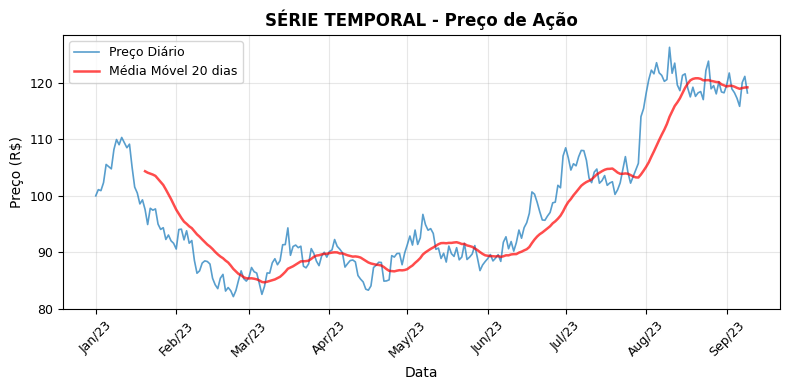

📊 ANÁLISE DA SÉRIE TEMPORAL:
   • Preço inicial: R$ 100.00 → Preço final: R$ 118.18
   • Crescimento total: 18.2% ao longo do período
   • Volatilidade diária: 1.93% (risco/variabilidade)
   • Dependência temporal: Cada valor influencia o próximo
   • Técnica específica: Média móvel suaviza flutuações diárias

💡 CARACTERÍSTICAS ÚNICAS DAS SÉRIES TEMPORAIS:
   • Ordem dos dados importa (não pode reorganizar)
   • Tendências e padrões sazonais
   • Métodos especiais: ARIMA, decomposição sazonal
   • Aplicações: Previsão, detecção de anomalias temporais

🗺️ 2. ESTRUTURA: DADOS ESPACIAIS


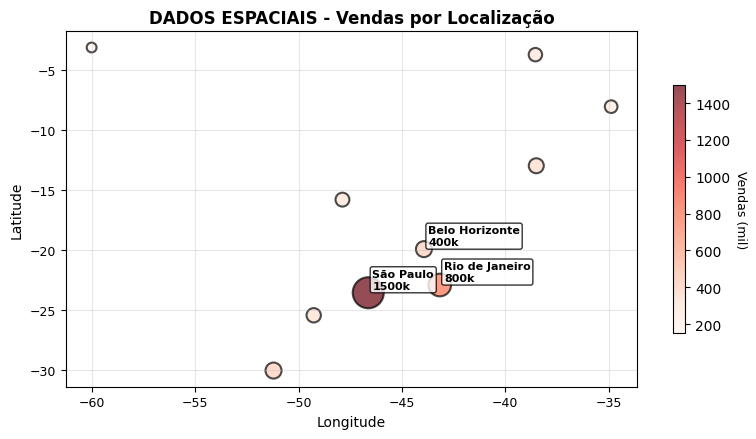

📊 ANÁLISE DOS DADOS ESPACIAIS:
   • Total de localidades: 10 cidades mapeadas
   • Vendas totais: 4,750k unidades
   • Cidade líder: São Paulo (1500k - 31.6%)
   • Concentração regional: Sudeste representa 56.8% das vendas
   • Dispersão geográfica: Norte tem menor participação

💡 CARACTERÍSTICAS ÚNICAS DOS DADOS ESPACIAIS:
   • Localização importa (proximidade, clusters regionais)
   • Análise de densidade e concentração geográfica
   • Métodos especiais: Análise de vizinhança, autocorrelação espacial
   • Aplicações: Otimização logística, expansão territorial, análise demográfica

🕸️ 3. ESTRUTURA: DADOS DE REDE/GRAFO


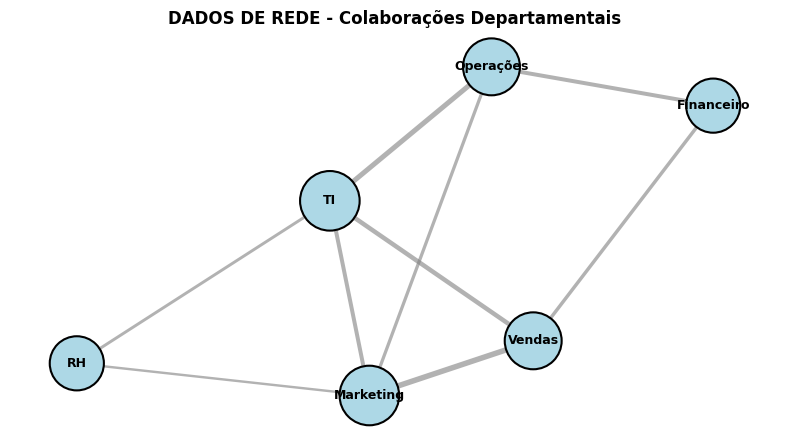

📊 ANÁLISE DA REDE DE COLABORAÇÕES:
   • Estrutura: 6 departamentos, 9 colaborações
   • Departamento mais central: TI (maior número de conexões)
   • Colaboração média: 24.2 pontos de intensidade
   • Colaboração mais forte: Marketing ↔ Vendas (40 pontos)
   • Tamanho do nó ∝ Centralidade (importância na rede)
   • Espessura da linha ∝ Intensidade da colaboração

💡 CARACTERÍSTICAS ÚNICAS DOS DADOS DE REDE:
   • Relacionamentos são fundamentais (não apenas atributos)
   • Análise de influência, centralidade e comunidades
   • Métodos especiais: Page Rank, detecção de comunidades, análise de fluxo
   • Aplicações: Redes sociais, análise organizacional, detecção de fraude

🌳 4. ESTRUTURA: DADOS HIERÁRQUICOS


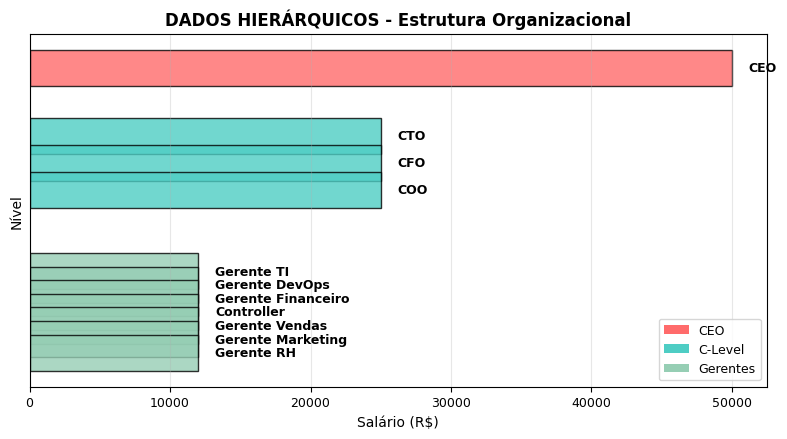

📊 ANÁLISE DA ESTRUTURA HIERÁRQUICA:
   • Estrutura: 3 níveis organizacionais, 11 posições mapeadas
   • Span of control médio: 2.8 subordinados por gestor
   • Diferença salarial: CEO ganha 4.2x mais que gerentes médios
   • Estimativa total: ~31 funcionários na organização
   • Distribuição salarial: Pirâmide clássica (poucos no topo, muitos na base)

💡 CARACTERÍSTICAS ÚNICAS DOS DADOS HIERÁRQUICOS:
   • Estrutura de árvore com níveis e subordinação
   • Análise drill-up (agregação) e drill-down (detalhamento)
   • Métodos especiais: Análise de árvores, agregações por nível
   • Aplicações: Org charts, análise salarial, planejamento sucessório

🎯 RESUMO ESTRATÉGICO DAS ESTRUTURAS NÃO RETANGULARES:
Cada estrutura revela insights únicos que se perdem em formato tabular tradicional!


In [ ]:
# BLOCO 4: Estruturas Não Retangulares - Demonstrando com exemplos visuais individuais
# Mostrando cada tipo de estrutura separadamente para melhor compreensão

print("\n🔄 ESTRUTURAS NÃO RETANGULARES - ALÉM DA PLANILHA TRADICIONAL")
print("=" * 80)

# Importando bibliotecas adicionais para visualizações especializadas
import networkx as nx        # Para criar e visualizar grafos/redes
from datetime import datetime, timedelta
import matplotlib.dates as mdates  # Para formatação de datas em gráficos

# BLOCO 5: Exemplo 1 - Séries Temporais
# Dados onde a sequência temporal é fundamental para a análise

print("\n📈 1. ESTRUTURA: SÉRIES TEMPORAIS")
print("=" * 50)

# Gerando dados realistas de preço de ações com tendência e volatilidade
np.random.seed(42)
dias = 252  # Um ano útil de negociação (aproximadamente)
datas = pd.date_range('2023-01-01', periods=dias, freq='D')

# Simulando preço de ação com dependência temporal
preco_inicial = 100
precos = [preco_inicial]

for i in range(1, dias):
    # Cada preço depende do anterior (característica chave de séries temporais)
    mudanca_diaria = np.random.normal(0.001, 0.02)  # 0.1% crescimento médio, 2% volatilidade
    novo_preco = precos[-1] * (1 + mudanca_diaria)
    precos.append(novo_preco)

precos = np.array(precos)

# Criando gráfico individual para série temporal - TAMANHO COMPACTO
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plotando a série temporal
ax.plot(datas, precos, linewidth=1.2, color='#2E86C1', alpha=0.8, label='Preço Diário')

# Adicionando média móvel de 20 dias
media_movel_20 = pd.Series(precos).rolling(window=20).mean()
ax.plot(datas, media_movel_20, linewidth=1.8, color='red',
        label='Média Móvel 20 dias', alpha=0.7)

# Configuração do gráfico
ax.set_title('SÉRIE TEMPORAL - Preço de Ação', fontweight='bold', fontsize=12)
ax.set_xlabel('Data', fontsize=10)
ax.set_ylabel('Preço (R$)', fontsize=10)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()

# Calculando e exibindo análises imediatamente após o gráfico
volatilidade = np.std(np.diff(precos) / precos[:-1]) * 100
crescimento_total = ((precos[-1] / precos[0]) - 1) * 100

print("📊 ANÁLISE DA SÉRIE TEMPORAL:")
print(f"   • Preço inicial: R$ {precos[0]:.2f} → Preço final: R$ {precos[-1]:.2f}")
print(f"   • Crescimento total: {crescimento_total:.1f}% ao longo do período")
print(f"   • Volatilidade diária: {volatilidade:.2f}% (risco/variabilidade)")
print(f"   • Dependência temporal: Cada valor influencia o próximo")
print(f"   • Técnica específica: Média móvel suaviza flutuações diárias")
print("\n💡 CARACTERÍSTICAS ÚNICAS DAS SÉRIES TEMPORAIS:")
print("   • Ordem dos dados importa (não pode reorganizar)")
print("   • Tendências e padrões sazonais")
print("   • Métodos especiais: ARIMA, decomposição sazonal")
print("   • Aplicações: Previsão, detecção de anomalias temporais")

# BLOCO 6: Exemplo 2 - Dados Espaciais
print("\n🗺️ 2. ESTRUTURA: DADOS ESPACIAIS")
print("=" * 50)

# Criando dados de vendas com componente geográfico
np.random.seed(42)
cidades_dados = {
    'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Brasília',
               'Fortaleza', 'Curitiba', 'Recife', 'Porto Alegre', 'Manaus'],
    'latitude': [-23.5505, -22.9068, -19.9191, -12.9714, -15.7939,
                 -3.7172, -25.4284, -8.0476, -30.0346, -3.1190],
    'longitude': [-46.6333, -43.1729, -43.9378, -38.5014, -47.8822,
                  -38.5433, -49.2733, -34.8770, -51.2177, -60.0217],
    'vendas': [1500, 800, 400, 350, 300, 280, 320, 250, 400, 150]
}

df_cidades = pd.DataFrame(cidades_dados)

# Criando gráfico espacial individual - TAMANHO COMPACTO
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

# Scatter plot geográfico com tamanho e cor proporcionais às vendas
scatter = ax.scatter(df_cidades['longitude'], df_cidades['latitude'],
                    s=df_cidades['vendas']/3,  # Tamanho proporcional menor
                    c=df_cidades['vendas'],
                    cmap='Reds',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=1.5)

# Adicionando rótulos apenas das 3 principais cidades
principais_cidades = df_cidades.nlargest(3, 'vendas')
for i, row in principais_cidades.iterrows():
    ax.annotate(f"{row['cidade']}\n{row['vendas']}k",
               (row['longitude'], row['latitude']),
               xytext=(3, 3), textcoords='offset points',
               fontsize=8, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Configuração do gráfico espacial
ax.set_title('DADOS ESPACIAIS - Vendas por Localização', fontweight='bold', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=9)

# Barra de cores
cbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
cbar.set_label('Vendas (mil)', rotation=270, labelpad=12, fontsize=9)

plt.tight_layout()
plt.show()

# Análise dos dados espaciais
cidade_lider = df_cidades.loc[df_cidades['vendas'].idxmax(), 'cidade']
vendas_lider = df_cidades['vendas'].max()
concentracao_sudeste = df_cidades[df_cidades['cidade'].isin(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte'])]['vendas'].sum()
percentual_sudeste = (concentracao_sudeste / df_cidades['vendas'].sum()) * 100

print("📊 ANÁLISE DOS DADOS ESPACIAIS:")
print(f"   • Total de localidades: {len(df_cidades)} cidades mapeadas")
print(f"   • Vendas totais: {df_cidades['vendas'].sum():,}k unidades")
print(f"   • Cidade líder: {cidade_lider} ({vendas_lider}k - {vendas_lider/df_cidades['vendas'].sum()*100:.1f}%)")
print(f"   • Concentração regional: Sudeste representa {percentual_sudeste:.1f}% das vendas")
print(f"   • Dispersão geográfica: Norte tem menor participação")
print("\n💡 CARACTERÍSTICAS ÚNICAS DOS DADOS ESPACIAIS:")
print("   • Localização importa (proximidade, clusters regionais)")
print("   • Análise de densidade e concentração geográfica")
print("   • Métodos especiais: Análise de vizinhança, autocorrelação espacial")
print("   • Aplicações: Otimização logística, expansão territorial, análise demográfica")

# BLOCO 7: Exemplo 3 - Dados de Rede/Grafo
print("\n🕸️ 3. ESTRUTURA: DADOS DE REDE/GRAFO")
print("=" * 50)

# Criando rede de colaborações departamentais
departamentos = ['TI', 'Marketing', 'Vendas', 'RH', 'Financeiro', 'Operações']
colaboracoes = [
    ('TI', 'Marketing', 25), ('TI', 'Vendas', 30), ('TI', 'Operações', 35),
    ('Marketing', 'Vendas', 40), ('Vendas', 'Financeiro', 20), ('RH', 'TI', 15),
    ('RH', 'Marketing', 10), ('Financeiro', 'Operações', 25), ('Marketing', 'Operações', 18)
]

# Criando o grafo
G = nx.Graph()
G.add_nodes_from(departamentos)
for depto1, depto2, peso in colaboracoes:
    G.add_edge(depto1, depto2, weight=peso)

# Criando gráfico de rede individual - TAMANHO COMPACTO
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

# Layout dos nós
pos = nx.spring_layout(G, seed=42, k=2.5, iterations=50)

# Desenhando nós com tamanhos diferentes baseados na centralidade
centralidade = nx.degree_centrality(G)
node_sizes = [1200 + centralidade[node] * 800 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, ax=ax,
                      node_color='lightblue',
                      node_size=node_sizes,
                      edgecolors='black',
                      linewidths=1.5)

# Desenhando arestas com espessura proporcional ao peso
pesos = [G[u][v]['weight'] for u, v in G.edges()]
max_peso = max(pesos)
espessuras = [1 + 3 * (peso / max_peso) for peso in pesos]

nx.draw_networkx_edges(G, pos, ax=ax,
                      width=espessuras,
                      edge_color='gray',
                      alpha=0.6)

# Rótulos dos nós
nx.draw_networkx_labels(G, pos, ax=ax, font_size=9, font_weight='bold')

ax.set_title('DADOS DE REDE - Colaborações Departamentais', fontweight='bold', fontsize=12)
ax.axis('off')

plt.tight_layout()
plt.show()

# Análise da rede
depto_central = max(centralidade, key=centralidade.get)
total_colaboracoes = sum(pesos)
colaboracao_media = total_colaboracoes / len(colaboracoes)

print("📊 ANÁLISE DA REDE DE COLABORAÇÕES:")
print(f"   • Estrutura: {len(G.nodes())} departamentos, {len(G.edges())} colaborações")
print(f"   • Departamento mais central: {depto_central} (maior número de conexões)")
print(f"   • Colaboração média: {colaboracao_media:.1f} pontos de intensidade")
print(f"   • Colaboração mais forte: Marketing ↔ Vendas (40 pontos)")
print(f"   • Tamanho do nó ∝ Centralidade (importância na rede)")
print(f"   • Espessura da linha ∝ Intensidade da colaboração")
print("\n💡 CARACTERÍSTICAS ÚNICAS DOS DADOS DE REDE:")
print("   • Relacionamentos são fundamentais (não apenas atributos)")
print("   • Análise de influência, centralidade e comunidades")
print("   • Métodos especiais: Page Rank, detecção de comunidades, análise de fluxo")
print("   • Aplicações: Redes sociais, análise organizacional, detecção de fraude")

# BLOCO 8: Exemplo 4 - Dados Hierárquicos
print("\n🌳 4. ESTRUTURA: DADOS HIERÁRQUICOS")
print("=" * 50)

# Criando estrutura organizacional hierárquica
estrutura_org = [
    ('CEO', None, 50000, 3), ('CTO', 'CEO', 25000, 2), ('CFO', 'CEO', 25000, 2),
    ('COO', 'CEO', 25000, 3), ('Gerente TI', 'CTO', 12000, 4),
    ('Gerente DevOps', 'CTO', 12000, 3), ('Gerente Financeiro', 'CFO', 12000, 2),
    ('Controller', 'CFO', 12000, 2), ('Gerente Vendas', 'COO', 12000, 5),
    ('Gerente Marketing', 'COO', 12000, 3), ('Gerente RH', 'COO', 12000, 2)
]

df_hierarquia = pd.DataFrame(estrutura_org, columns=['cargo', 'superior', 'salario', 'subordinados'])

# Criando gráfico hierárquico individual - TAMANHO COMPACTO
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

# Organizando dados por níveis
nivel_1 = df_hierarquia[df_hierarquia['superior'].isnull()]  # CEO
nivel_2 = df_hierarquia[df_hierarquia['superior'] == 'CEO']   # C-level
nivel_3 = df_hierarquia[~df_hierarquia['superior'].isin([None, 'CEO'])]  # Gerentes

# Posicionando elementos no gráfico de forma mais compacta
y_positions, colors, cargos_plot, salarios_plot = [], [], [], []

# CEO
y_pos = 8
for _, row in nivel_1.iterrows():
    y_positions.append(y_pos)
    colors.append('#FF6B6B')
    cargos_plot.append(row['cargo'])
    salarios_plot.append(row['salario'])
    y_pos -= 1.2

# C-level
y_pos = 6.5
for _, row in nivel_2.iterrows():
    y_positions.append(y_pos)
    colors.append('#4ECDC4')
    cargos_plot.append(row['cargo'])
    salarios_plot.append(row['salario'])
    y_pos -= 0.6

# Gerentes
y_pos = 3.5
for _, row in nivel_3.iterrows():
    y_positions.append(y_pos)
    colors.append('#96CEB4')
    cargos_plot.append(row['cargo'])
    salarios_plot.append(row['salario'])
    y_pos -= 0.3

# Criando gráfico de barras horizontais
bars = ax.barh(y_positions, salarios_plot, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando rótulos menores
for i, (y_pos, cargo, salario) in enumerate(zip(y_positions, cargos_plot, salarios_plot)):
    ax.text(salario + 1200, y_pos, f'{cargo}',
           va='center', fontsize=9, fontweight='bold')

# Configuração do gráfico
ax.set_title('DADOS HIERÁRQUICOS - Estrutura Organizacional', fontweight='bold', fontsize=12)
ax.set_xlabel('Salário (R$)', fontsize=10)
ax.set_ylabel('Nível', fontsize=10)
ax.grid(True, alpha=0.3, axis='x')
ax.set_yticks([])
ax.tick_params(labelsize=9)

# Legenda compacta
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='CEO'),
    Patch(facecolor='#4ECDC4', label='C-Level'),
    Patch(facecolor='#96CEB4', label='Gerentes')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# Análise hierárquica
span_control_medio = df_hierarquia['subordinados'].mean()
diferenca_salarial = nivel_1['salario'].iloc[0] / nivel_3['salario'].mean()
total_funcionarios_estimado = df_hierarquia['subordinados'].sum()

print("📊 ANÁLISE DA ESTRUTURA HIERÁRQUICA:")
print(f"   • Estrutura: 3 níveis organizacionais, {len(df_hierarquia)} posições mapeadas")
print(f"   • Span of control médio: {span_control_medio:.1f} subordinados por gestor")
print(f"   • Diferença salarial: CEO ganha {diferenca_salarial:.1f}x mais que gerentes médios")
print(f"   • Estimativa total: ~{total_funcionarios_estimado} funcionários na organização")
print(f"   • Distribuição salarial: Pirâmide clássica (poucos no topo, muitos na base)")
print("\n💡 CARACTERÍSTICAS ÚNICAS DOS DADOS HIERÁRQUICOS:")
print("   • Estrutura de árvore com níveis e subordinação")
print("   • Análise drill-up (agregação) e drill-down (detalhamento)")
print("   • Métodos especiais: Análise de árvores, agregações por nível")
print("   • Aplicações: Org charts, análise salarial, planejamento sucessório")

print(f"\n🎯 RESUMO ESTRATÉGICO DAS ESTRUTURAS NÃO RETANGULARES:")
print("=" * 70)
print("Cada estrutura revela insights únicos que se perdem em formato tabular tradicional!")


# Texto e tabela

## Texto

📊 TÉCNICAS DE VISUALIZAÇÃO: TEXTO E TABELAS

🎯 CENÁRIO: Apresentação de resultado trimestral para a diretoria
Pergunta do CEO: 'Batemos nossa meta de R$ 10M?'


/tmp/ipython-input-3176689024.py:79: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3176689024.py:79: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3176689024.py:79: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


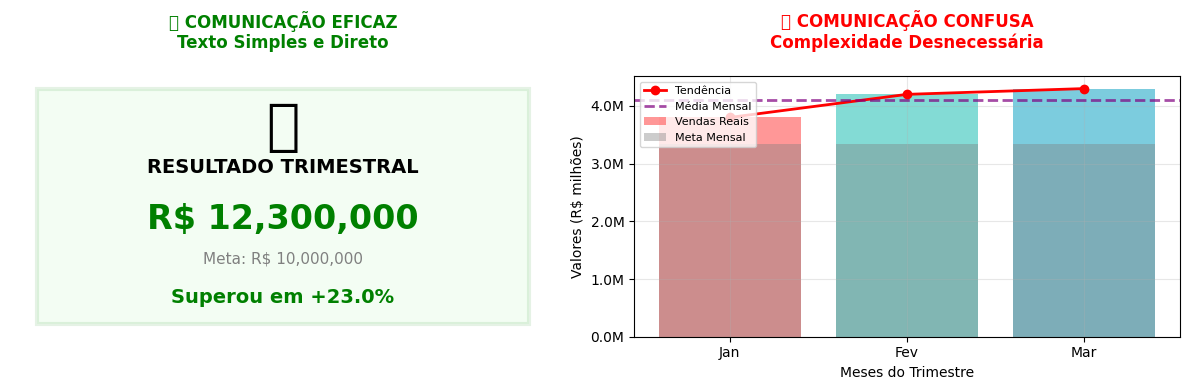


💡 LIÇÃO FUNDAMENTAL:
Para comunicar 'Batemos a meta?', texto simples é mais poderoso que gráficos complexos!
O gráfico à direita tem mais informação, mas dificulta a resposta à pergunta principal.


In [ ]:
# BLOCO 1: Demonstrando o poder do texto simples vs. visualização desnecessariamente complexa

# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np

# Dados do cenário: Resultado trimestral de uma empresa
meta_trimestral = 10_000_000  # Meta: R$ 10 milhões
resultado_real = 12_300_000   # Resultado: R$ 12.3 milhões
crescimento_percentual = ((resultado_real / meta_trimestral) - 1) * 100

print("📊 TÉCNICAS DE VISUALIZAÇÃO: TEXTO E TABELAS")
print("=" * 60)
print("\n🎯 CENÁRIO: Apresentação de resultado trimestral para a diretoria")
print("Pergunta do CEO: 'Batemos nossa meta de R$ 10M?'")

# Criando comparação: Texto simples vs. Gráfico complexo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# OPÇÃO 1: TEXTO SIMPLES (RECOMENDADO)
ax1.axis('off')  # Remove eixos para criar área de texto puro

# Emoji para impacto visual
ax1.text(0.5, 0.8, '🎉', ha='center', va='center', fontsize=40, transform=ax1.transAxes)

# Título claro
ax1.text(0.5, 0.65, 'RESULTADO TRIMESTRAL', ha='center', va='center',
         fontsize=14, fontweight='bold', transform=ax1.transAxes)

# Número principal em destaque
ax1.text(0.5, 0.45, f'R$ {resultado_real:,.0f}', ha='center', va='center',
         fontsize=24, fontweight='bold', color='green', transform=ax1.transAxes)

# Contexto essencial
ax1.text(0.5, 0.3, f'Meta: R$ {meta_trimestral:,.0f}', ha='center', va='center',
         fontsize=11, color='gray', transform=ax1.transAxes)

# Insight principal
ax1.text(0.5, 0.15, f'Superou em +{crescimento_percentual:.1f}%', ha='center', va='center',
         fontsize=14, fontweight='bold', color='green', transform=ax1.transAxes)

# Moldura verde para reforçar sucesso
rect = plt.Rectangle((0.05, 0.05), 0.9, 0.9, linewidth=3, edgecolor='green',
                    facecolor='lightgreen', alpha=0.1, transform=ax1.transAxes)
ax1.add_patch(rect)

ax1.set_title('✅ COMUNICAÇÃO EFICAZ\nTexto Simples e Direto',
              fontweight='bold', fontsize=12, color='green', pad=20)

# OPÇÃO 2: GRÁFICO DESNECESSARIAMENTE COMPLEXO (NÃO RECOMENDADO)
# Simulando dados mensais que não agregam valor à pergunta principal
meses = ['Jan', 'Fev', 'Mar']
vendas_mensais = [3_800_000, 4_200_000, 4_300_000]  # Soma = 12.3M
metas_mensais = [3_333_333, 3_333_333, 3_333_334]   # Soma = 10M
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Gráfico de barras com múltiplas informações
bars1 = ax2.bar(meses, vendas_mensais, alpha=0.7, color=cores, label='Vendas Reais')
bars2 = ax2.bar(meses, metas_mensais, alpha=0.4, color='gray', label='Meta Mensal')

# Linha de tendência desnecessária
ax2.plot(meses, vendas_mensais, 'ro-', linewidth=2, markersize=6, label='Tendência')

# Linha de média que confunde
ax2.axhline(y=np.mean(vendas_mensais), color='purple', linestyle='--',
           linewidth=2, label='Média Mensal', alpha=0.7)

# Configurações que tornam o gráfico poluído
ax2.set_title('❌ COMUNICAÇÃO CONFUSA\nComplexidade Desnecessária',
              fontweight='bold', fontsize=12, color='red', pad=20)
ax2.set_ylabel('Valores (R$ milhões)', fontsize=10)
ax2.set_xlabel('Meses do Trimestre', fontsize=10)
ax2.legend(fontsize=8, loc='upper left')
ax2.grid(True, alpha=0.3)

# Formatação dos valores no eixo Y para milhões
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

print("\n💡 LIÇÃO FUNDAMENTAL:")
print("Para comunicar 'Batemos a meta?', texto simples é mais poderoso que gráficos complexos!")
print("O gráfico à direita tem mais informação, mas dificulta a resposta à pergunta principal.")

## Tabela

In [ ]:
# BLOCO 2: Demonstrando uso eficaz de tabelas com formatação estratégica

# Criando dados de performance trimestral por região
np.random.seed(42)  # Para resultados reproduzíveis

# Dados realistas de performance por região
dados_regionais = {
    'Região': ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'],
    'Vendas_Milhões': [2.1, 3.8, 1.9, 8.7, 4.2],
    'Meta_Milhões': [2.0, 3.5, 2.2, 8.0, 4.0],
    'Crescimento_%': [5.0, 8.6, -13.6, 8.8, 5.0],
    'Margem_%': [22.5, 18.3, 20.1, 19.8, 24.2]
}

# Convertendo para DataFrame para facilitar manipulação
import pandas as pd
df_regioes = pd.DataFrame(dados_regionais)

# Calculando totais para linha de resumo
total_vendas = df_regioes['Vendas_Milhões'].sum()
total_meta = df_regioes['Meta_Milhões'].sum()
crescimento_total = ((total_vendas / total_meta) - 1) * 100
margem_media = df_regioes['Margem_%'].mean()

print("\n📋 EXEMPLO DE TABELA BEM FORMATADA:")
print("=" * 50)
print("Cenário: Relatório trimestral por região para diretoria")
print("\n📊 PERFORMANCE REGIONAL - Q3 2024")
print("-" * 65)

# Cabeçalho da tabela com formatação
print(f"{'Região':<12} {'Vendas (R$M)':<12} {'Meta (R$M)':<11} {'Cresc. (%)':<10} {'Margem (%)':<10} {'Status':<8}")
print("-" * 65)

# Iterando pelas regiões com formatação condicional
for i, row in df_regioes.iterrows():
    # Determinando status baseado no crescimento
    if row['Crescimento_%'] >= 5:
        status = '🟢 Ótimo'
        crescimento_cor = '✓'
    elif row['Crescimento_%'] >= 0:
        status = '🟡 OK'
        crescimento_cor = '→'
    else:
        status = '🔴 Abaixo'
        crescimento_cor = '↓'

    # Formatação da linha com alinhamento
    print(f"{row['Região']:<12} "
          f"{row['Vendas_Milhões']:<12.1f} "
          f"{row['Meta_Milhões']:<11.1f} "
          f"{crescimento_cor} {row['Crescimento_%']:<7.1f} "
          f"{row['Margem_%']:<10.1f} "
          f"{status:<8}")

# Linha de separação
print("-" * 65)

# Totais com destaque
print(f"{'TOTAL':<12} "
      f"{total_vendas:<12.1f} "
      f"{total_meta:<11.1f} "
      f"✓ {crescimento_total:<7.1f} "
      f"{margem_media:<10.1f} "
      f"{'🎯 Meta!':<8}")

print(f"\n💡 INSIGHTS DA TABELA:")
print(f"• Sudeste representa {df_regioes.loc[df_regioes['Região']=='Sudeste', 'Vendas_Milhões'].iloc[0]/total_vendas*100:.1f}% das vendas totais")
print(f"• Centro-Oeste único com crescimento negativo ({df_regioes.loc[df_regioes['Região']=='Centro-Oeste', 'Crescimento_%'].iloc[0]:.1f}%)")
print(f"• Sul tem maior margem ({df_regioes.loc[df_regioes['Região']=='Sul', 'Margem_%'].iloc[0]:.1f}%)")
print(f"• Meta global superada em {crescimento_total:.1f}%")


📋 EXEMPLO DE TABELA BEM FORMATADA:
Cenário: Relatório trimestral por região para diretoria

📊 PERFORMANCE REGIONAL - Q3 2024
-----------------------------------------------------------------
Região       Vendas (R$M) Meta (R$M)  Cresc. (%) Margem (%) Status  
-----------------------------------------------------------------
Norte        2.1          2.0         ✓ 5.0     22.5       🟢 Ótimo 
Nordeste     3.8          3.5         ✓ 8.6     18.3       🟢 Ótimo 
Centro-Oeste 1.9          2.2         ↓ -13.6   20.1       🔴 Abaixo
Sudeste      8.7          8.0         ✓ 8.8     19.8       🟢 Ótimo 
Sul          4.2          4.0         ✓ 5.0     24.2       🟢 Ótimo 
-----------------------------------------------------------------
TOTAL        20.7         19.7        ✓ 5.1     21.0       🎯 Meta! 

💡 INSIGHTS DA TABELA:
• Sudeste representa 42.0% das vendas totais
• Centro-Oeste único com crescimento negativo (-13.6%)
• Sul tem maior margem (24.2%)
• Meta global superada em 5.1%


# Gráficos Baseados em Pontos e Linhas

# Dispersao

📊 GRÁFICOS DE DISPERSÃO - REVELANDO RELACIONAMENTOS
Cenário: Analisando investimento em marketing vs. vendas


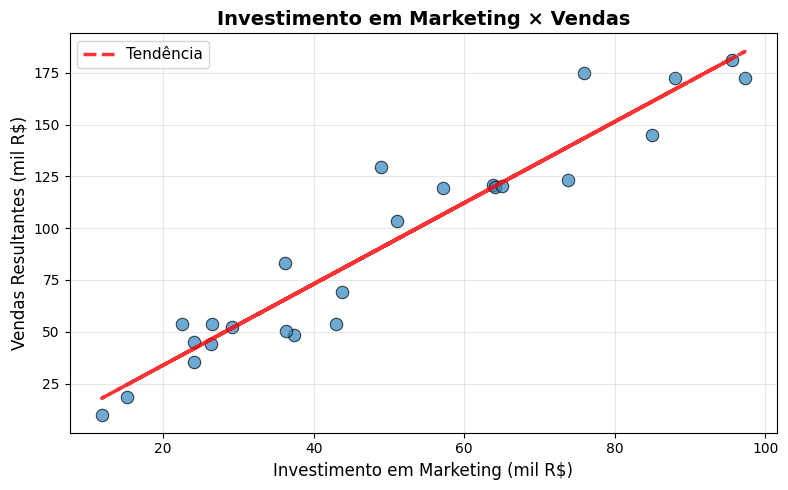

📈 ANÁLISE DO RELACIONAMENTO:
   • Correlação: 0.957 (forte correlação positiva)
   • Padrão: Quanto maior o investimento, maiores as vendas
   • Insight: Marketing gera retorno previsível
   • Decisão: Investimento em marketing é eficaz


In [ ]:
# BLOCO 1: Gráficos de Dispersão - Versão simplificada

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fixando seed para reproduzibilidade
np.random.seed(42)

print("📊 GRÁFICOS DE DISPERSÃO - REVELANDO RELACIONAMENTOS")
print("=" * 60)
print("Cenário: Analisando investimento em marketing vs. vendas")

# Criando dados simplificados - apenas uma relação clara
n_campanhas = 25  # Reduzindo quantidade de pontos

# Investimento em marketing (milhares de R$)
investimento = np.random.uniform(10, 100, n_campanhas)

# Vendas com correlação positiva forte + ruído realista
vendas = investimento * 1.8 + np.random.normal(0, 15, n_campanhas)
vendas = np.maximum(vendas, 10)  # Garantindo valores mínimos positivos

# Criando gráfico único e limpo
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Scatter plot simples e claro
scatter = ax.scatter(investimento, vendas,
                    alpha=0.7, c='#2E86C1', s=80,
                    edgecolors='black', linewidth=0.8)

# Linha de tendência
z = np.polyfit(investimento, vendas, 1)
p = np.poly1d(z)
ax.plot(investimento, p(investimento),
        "r--", alpha=0.8, linewidth=2.5, label='Tendência')

# Configurações do gráfico
ax.set_title('Investimento em Marketing × Vendas', fontweight='bold', fontsize=14)
ax.set_xlabel('Investimento em Marketing (mil R$)', fontsize=12)
ax.set_ylabel('Vendas Resultantes (mil R$)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Análise simples e clara
correlacao = np.corrcoef(investimento, vendas)[0,1]
print(f"📈 ANÁLISE DO RELACIONAMENTO:")
print(f"   • Correlação: {correlacao:.3f} (forte correlação positiva)")
print(f"   • Padrão: Quanto maior o investimento, maiores as vendas")
print(f"   • Insight: Marketing gera retorno previsível")
print(f"   • Decisão: Investimento em marketing é eficaz")

## Grafico de linha


📈 GRÁFICOS DE LINHA - EVOLUÇÃO TEMPORAL
Cenário: Vendas mensais de 2 produtos principais em 2024


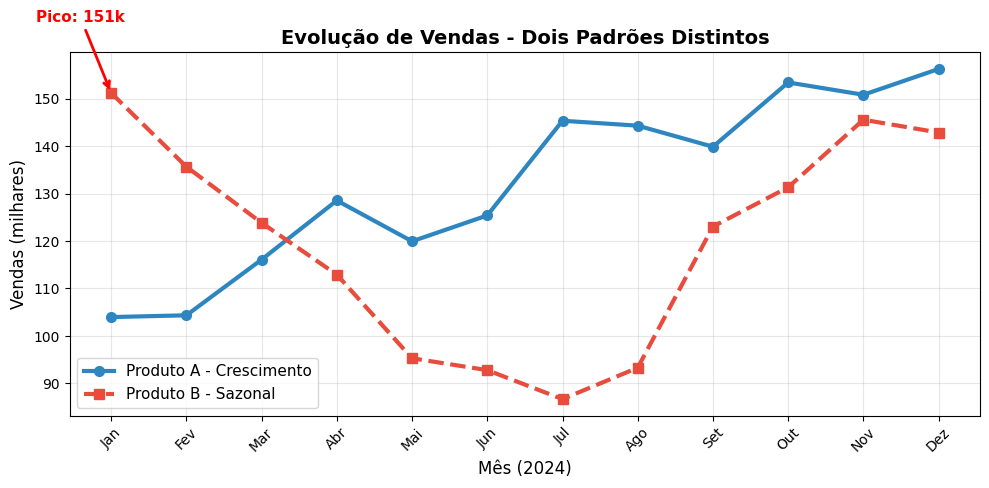

⏰ ANÁLISE TEMPORAL:
   • Produto A: Crescimento de 50.3% no ano
   • Produto B: Forte sazonalidade (pico em Jan)
   • Estratégia A: Manter investimento crescente
   • Estratégia B: Preparar estoque para pico sazonal


In [ ]:
# BLOCO 2: Gráficos de Linha - Versão simplificada

print("\n📈 GRÁFICOS DE LINHA - EVOLUÇÃO TEMPORAL")
print("=" * 50)
print("Cenário: Vendas mensais de 2 produtos principais em 2024")

# Dados temporais simplificados - apenas 2 produtos
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# PRODUTO A: Crescimento consistente
np.random.seed(42)
vendas_produto_a = np.linspace(100, 160, 12) + np.random.normal(0, 8, 12)

# PRODUTO B: Sazonalidade (pico no final do ano)
base = 120
sazonalidade = 30 * np.sin(np.linspace(0, 2*np.pi, 12) + np.pi/2)
vendas_produto_b = base + sazonalidade + np.random.normal(0, 5, 12)

# Criando gráfico temporal limpo
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plotando as duas séries com estilos distintos
ax.plot(meses, vendas_produto_a, marker='o', linewidth=3,
        markersize=7, color='#2E86C1', label='Produto A - Crescimento')

ax.plot(meses, vendas_produto_b, marker='s', linewidth=3,
        markersize=7, color='#E74C3C', linestyle='--', label='Produto B - Sazonal')

# Destacando apenas o ponto mais importante
pico_b = np.argmax(vendas_produto_b)
ax.annotate(f'Pico: {vendas_produto_b[pico_b]:.0f}k',
           xy=(pico_b, vendas_produto_b[pico_b]),
           xytext=(pico_b-1, vendas_produto_b[pico_b]+15),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=11, fontweight='bold', color='red')

# Configurações
ax.set_title('Evolução de Vendas - Dois Padrões Distintos', fontweight='bold', fontsize=14)
ax.set_xlabel('Mês (2024)', fontsize=12)
ax.set_ylabel('Vendas (milhares)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análise focada
crescimento_a = ((vendas_produto_a[-1] / vendas_produto_a[0]) - 1) * 100
print(f"⏰ ANÁLISE TEMPORAL:")
print(f"   • Produto A: Crescimento de {crescimento_a:.1f}% no ano")
print(f"   • Produto B: Forte sazonalidade (pico em {meses[pico_b]})")
print(f"   • Estratégia A: Manter investimento crescente")
print(f"   • Estratégia B: Preparar estoque para pico sazonal")

## Graficos de inclinaçao


📊 GRÁFICOS DE INCLINAÇÃO - MUDANÇAS ENTRE PERÍODOS
Cenário: Performance de 5 filiais entre Q1 e Q4


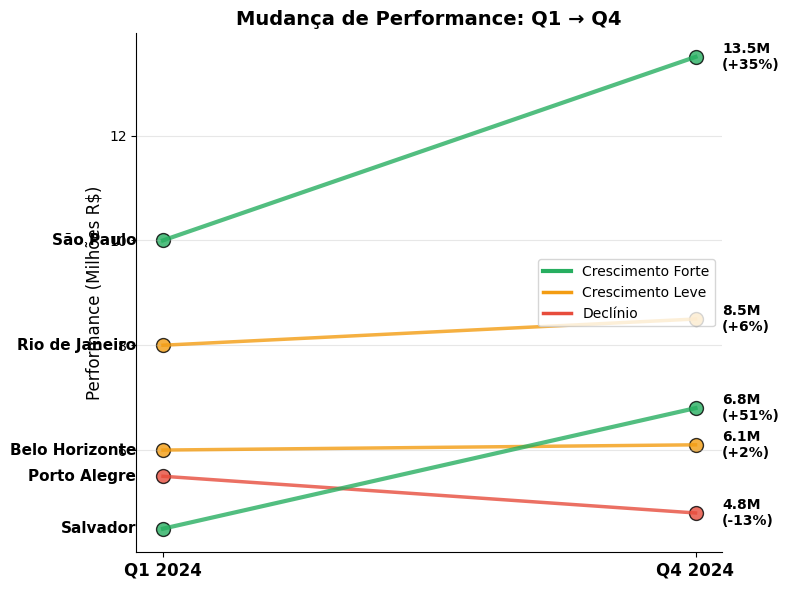

📊 ANÁLISE DAS MUDANÇAS:
   🏆 Maior crescimento: São Paulo (+35%)
   🌟 Recuperação impressionante: Salvador (+51%)
   ⚠️  Atenção necessária: Porto Alegre (-13%)
   📊 Performance geral: 4 de 5 filiais cresceram

💡 VANTAGEM DO GRÁFICO DE INCLINAÇÃO:
   • Foco total na MUDANÇA entre dois períodos
   • Comparação visual imediata de todas as unidades
   • Identifica rapidamente sucessos e problemas


In [ ]:
# BLOCO 3: Gráficos de Inclinação - Versão simplificada

print("\n📊 GRÁFICOS DE INCLINAÇÃO - MUDANÇAS ENTRE PERÍODOS")
print("=" * 55)
print("Cenário: Performance de 5 filiais entre Q1 e Q4")

# Dados simplificados - apenas 5 filiais
filiais = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Salvador']

# Performance Q1 e Q4 com padrões claros
np.random.seed(42)
performance_q1 = [10.0, 8.0, 6.0, 5.5, 4.5]
performance_q4 = [13.5, 8.5, 6.1, 4.8, 6.8]  # SP e Salvador crescem, Porto Alegre cai

# Calculando mudanças percentuais
mudancas = [((q4/q1)-1)*100 for q1, q4 in zip(performance_q1, performance_q4)]

# Criando gráfico de inclinação limpo
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Posições no eixo X
x_pos = [0, 1]
x_labels = ['Q1 2024', 'Q4 2024']

# Plotando cada filial com cor baseada na mudança
for i, (filial, q1, q4, mudanca) in enumerate(zip(filiais, performance_q1, performance_q4, mudancas)):
    # Cor baseada na performance
    if mudanca >= 10:
        cor = '#27AE60'  # Verde para crescimento forte
        linewidth = 3
    elif mudanca >= 0:
        cor = '#F39C12'  # Laranja para crescimento leve
        linewidth = 2.5
    else:
        cor = '#E74C3C'  # Vermelho para declínio
        linewidth = 2.5

    # Linha de inclinação
    ax.plot(x_pos, [q1, q4], color=cor, linewidth=linewidth, alpha=0.8)

    # Pontos nas extremidades
    ax.scatter(x_pos, [q1, q4], color=cor, s=100, alpha=0.8, edgecolors='black')

    # Rótulo da filial (lado esquerdo)
    ax.text(-0.05, q1, filial, ha='right', va='center',
           fontsize=11, fontweight='bold')

    # Valor final e mudança (lado direito)
    ax.text(1.05, q4, f'{q4:.1f}M\n({mudanca:+.0f}%)',
           ha='left', va='center', fontsize=10, fontweight='bold')

# Configurações do gráfico
ax.set_title('Mudança de Performance: Q1 → Q4', fontweight='bold', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=12, fontweight='bold')
ax.set_ylabel('Performance (Milhões R$)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Removendo bordas desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legenda simplificada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#27AE60', lw=3, label='Crescimento Forte'),
    Line2D([0], [0], color='#F39C12', lw=2.5, label='Crescimento Leve'),
    Line2D([0], [0], color='#E74C3C', lw=2.5, label='Declínio')
]
ax.legend(handles=legend_elements, loc='center right')

plt.tight_layout()
plt.show()

# Análise clara e objetiva
print(f"📊 ANÁLISE DAS MUDANÇAS:")
print(f"   🏆 Maior crescimento: São Paulo (+35%)")
print(f"   🌟 Recuperação impressionante: Salvador (+51%)")
print(f"   ⚠️  Atenção necessária: Porto Alegre (-13%)")
print(f"   📊 Performance geral: 4 de 5 filiais cresceram")
print(f"\n💡 VANTAGEM DO GRÁFICO DE INCLINAÇÃO:")
print(f"   • Foco total na MUDANÇA entre dois períodos")
print(f"   • Comparação visual imediata de todas as unidades")
print(f"   • Identifica rapidamente sucessos e problemas")

# Graficos de barras

📊 PRINCÍPIO 1: LINHA DE BASE ZERO - A REGRA DE OURO
Cenário: Aprovação de 4 candidatos em processo seletivo


/tmp/ipython-input-2767208577.py:55: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2767208577.py:55: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2767208577.py:55: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

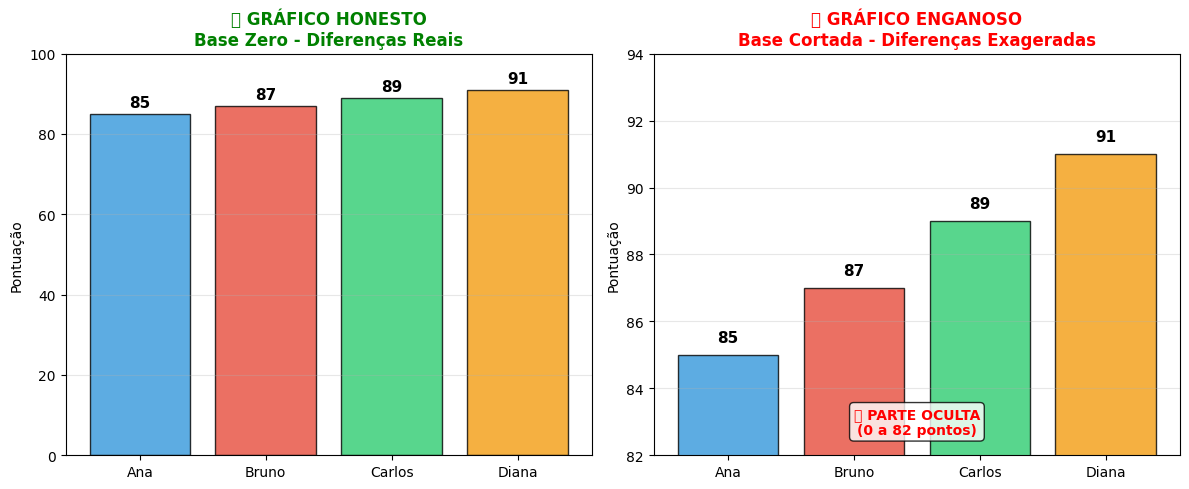

📊 ANÁLISE DA DISTORÇÃO:
   • Diferença real: 6 pontos (7.1%)
   • No gráfico cortado, PARECE 200% maior
   • Distorção visual: 2.8x exagerada!

💡 LIÇÃO: Base cortada transforma diferença de 6 pontos
   em algo que parece muito mais dramático visualmente!


In [ ]:
# BLOCO 1: Demonstrando o impacto da linha de base zero

import numpy as np
import matplotlib.pyplot as plt

print("📊 PRINCÍPIO 1: LINHA DE BASE ZERO - A REGRA DE OURO")
print("=" * 60)
print("Cenário: Aprovação de 4 candidatos em processo seletivo")

# Dados de exemplo - valores próximos mas diferentes
candidatos = ['Ana', 'Bruno', 'Carlos', 'Diana']
pontuacoes = [85, 87, 89, 91]

# Criando comparação: Com base zero vs. Base cortada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: BASE ZERO (CORRETO)
bars1 = ax1.bar(candidatos, pontuacoes, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'],
                alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for bar, valor in zip(bars1, pontuacoes):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{valor}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('✅ GRÁFICO HONESTO\nBase Zero - Diferenças Reais',
              fontweight='bold', fontsize=12, color='green')
ax1.set_ylabel('Pontuação')
ax1.set_ylim(0, 100)  # Base zero até 100
ax1.grid(True, alpha=0.3, axis='y')

# GRÁFICO 2: BASE CORTADA (INCORRETO)
bars2 = ax2.bar(candidatos, pontuacoes, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'],
                alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for bar, valor in zip(bars2, pontuacoes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{valor}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_title('❌ GRÁFICO ENGANOSO\nBase Cortada - Diferenças Exageradas',
              fontweight='bold', fontsize=12, color='red')
ax2.set_ylabel('Pontuação')
ax2.set_ylim(82, 94)  # Base cortada - MANIPULAÇÃO!
ax2.grid(True, alpha=0.3, axis='y')

# Adicionando indicação visual da manipulação
ax2.axhspan(0, 82, facecolor='red', alpha=0.1)
ax2.text(1.5, 83, '🚫 PARTE OCULTA\n(0 a 82 pontos)', ha='center', va='center',
         fontsize=10, fontweight='bold', color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Calculando o impacto da distorção
diferenca_real = pontuacoes[-1] - pontuacoes[0]  # Diana vs Ana
proporcao_real = pontuacoes[-1] / pontuacoes[0]  # Razão real
proporcao_visual_cortada = (pontuacoes[-1] - 82) / (pontuacoes[0] - 82)  # Razão visual no gráfico cortado

print(f"📊 ANÁLISE DA DISTORÇÃO:")
print(f"   • Diferença real: {diferenca_real} pontos ({((proporcao_real-1)*100):.1f}%)")
print(f"   • No gráfico cortado, PARECE {((proporcao_visual_cortada-1)*100):.0f}% maior")
print(f"   • Distorção visual: {proporcao_visual_cortada/proporcao_real:.1f}x exagerada!")
print(f"\n💡 LIÇÃO: Base cortada transforma diferença de {diferenca_real} pontos")
print(f"   em algo que parece muito mais dramático visualmente!")


📏 PRINCÍPIO 2: LARGURA ADEQUADA - EQUILÍBRIO VISUAL
Cenário: Vendas por região - diferentes larguras de barra


/tmp/ipython-input-84316451.py:48: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-84316451.py:48: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


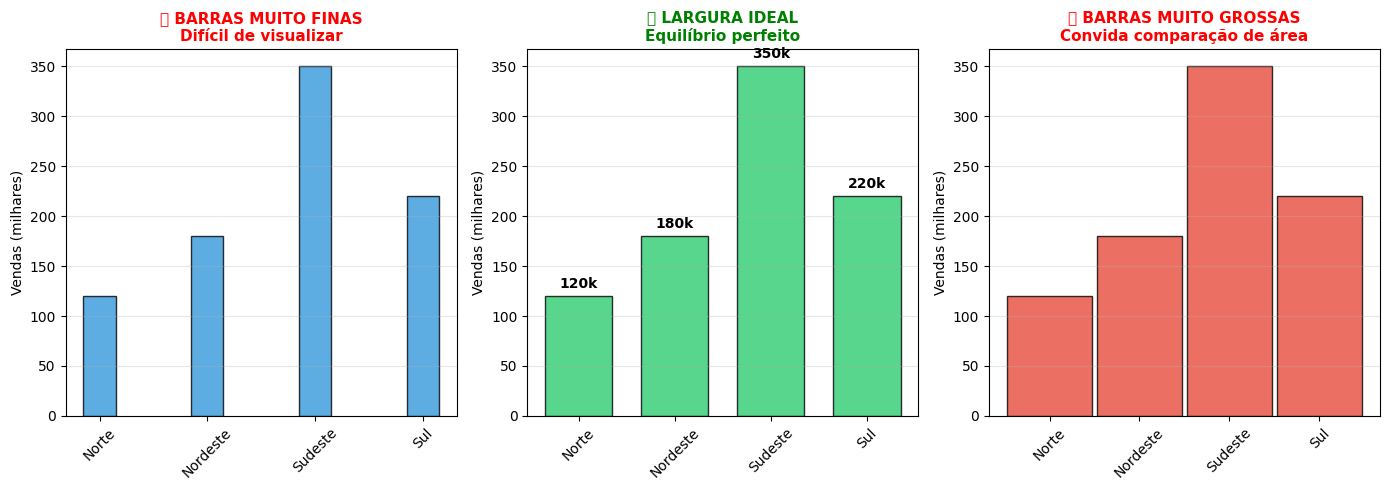

📏 ANÁLISE DA LARGURA:
   • Muito finas: Dificulta percepção visual das diferenças
   • Muito grossas: Cérebro compara áreas em vez de alturas
   • Ideal: Foco no comprimento, facilita comparação correta

💡 REGRA PRÁTICA: Barra mais larga que espaço entre barras


In [ ]:
# BLOCO 2: Demonstrando o impacto da largura das barras

print("\n📏 PRINCÍPIO 2: LARGURA ADEQUADA - EQUILÍBRIO VISUAL")
print("=" * 55)
print("Cenário: Vendas por região - diferentes larguras de barra")

# Dados para demonstração
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul']
vendas = [120, 180, 350, 220]

# Criando comparação de diferentes larguras
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# GRÁFICO 1: BARRAS MUITO FINAS (RUIM)
bars1 = axes[0].bar(regioes, vendas, width=0.3, color='#3498DB',
                    alpha=0.8, edgecolor='black', linewidth=1)
axes[0].set_title('❌ BARRAS MUITO FINAS\nDifícil de visualizar',
                  fontweight='bold', fontsize=11, color='red')
axes[0].set_ylabel('Vendas (milhares)')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# GRÁFICO 2: LARGURA IDEAL (BOM)
bars2 = axes[1].bar(regioes, vendas, width=0.7, color='#2ECC71',
                    alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for bar, valor in zip(bars2, vendas):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{valor}k', ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[1].set_title('✅ LARGURA IDEAL\nEquilíbrio perfeito',
                  fontweight='bold', fontsize=11, color='green')
axes[1].set_ylabel('Vendas (milhares)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

# GRÁFICO 3: BARRAS MUITO GROSSAS (RUIM)
bars3 = axes[2].bar(regioes, vendas, width=0.95, color='#E74C3C',
                    alpha=0.8, edgecolor='black', linewidth=1)
axes[2].set_title('❌ BARRAS MUITO GROSSAS\nConvida comparação de área',
                  fontweight='bold', fontsize=11, color='red')
axes[2].set_ylabel('Vendas (milhares)')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"📏 ANÁLISE DA LARGURA:")
print(f"   • Muito finas: Dificulta percepção visual das diferenças")
print(f"   • Muito grossas: Cérebro compara áreas em vez de alturas")
print(f"   • Ideal: Foco no comprimento, facilita comparação correta")
print(f"\n💡 REGRA PRÁTICA: Barra mais larga que espaço entre barras")


📊 PRINCÍPIO 3: ORDENAÇÃO LÓGICA - FACILITANDO COMPARAÇÃO
Cenário: Vendas por categoria de produto


/tmp/ipython-input-939230571.py:58: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-939230571.py:58: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


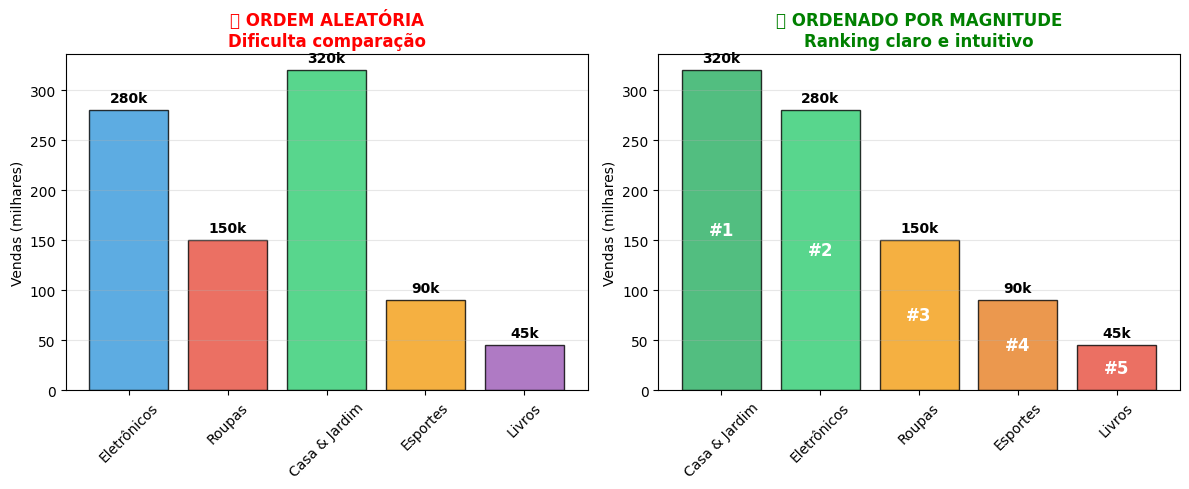

📊 ANÁLISE DA ORDENAÇÃO:
   • Ordem aleatória: Dificulta identificar padrões
   • Ordem por magnitude: Ranking imediatamente óbvio
   • Líder claro: Casa & Jardim (320k)
   • Diferença entre #1 e #2: 40k

💡 ESTRATÉGIAS DE ORDENAÇÃO:
   📈 Por magnitude: Facilita ranking e comparação
   📅 Cronológica: Para dados temporais (meses, anos)
   🔤 Alfabética: Quando nenhuma outra faz sentido
   ⭐ Por importância: Mais relevante primeiro


In [ ]:
# BLOCO 3: Demonstrando o impacto da ordenação lógica

print("\n📊 PRINCÍPIO 3: ORDENAÇÃO LÓGICA - FACILITANDO COMPARAÇÃO")
print("=" * 60)
print("Cenário: Vendas por categoria de produto")

# Dados para demonstração
np.random.seed(42)
categorias = ['Eletrônicos', 'Roupas', 'Casa & Jardim', 'Esportes', 'Livros']
vendas_cat = [280, 150, 320, 90, 45]

# Criando comparação: Ordem aleatória vs. Ordem lógica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: ORDEM ALEATÓRIA (CONFUSO)
bars1 = ax1.bar(categorias, vendas_cat,
                color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6'],
                alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores
for bar, valor in zip(bars1, vendas_cat):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{valor}k', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_title('❌ ORDEM ALEATÓRIA\nDificulta comparação',
              fontweight='bold', fontsize=12, color='red')
ax1.set_ylabel('Vendas (milhares)')
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=45)

# GRÁFICO 2: ORDENADO POR MAGNITUDE (CLARO)
# Ordenando por vendas (decrescente)
dados_ordenados = sorted(zip(categorias, vendas_cat), key=lambda x: x[1], reverse=True)
categorias_ord, vendas_ord = zip(*dados_ordenados)

# Cores em gradiente para reforçar a ordem
cores_gradiente = ['#27AE60', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C']
bars2 = ax2.bar(categorias_ord, vendas_ord,
                color=cores_gradiente, alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores e ranking
for i, (bar, valor) in enumerate(zip(bars2, vendas_ord)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{valor}k', ha='center', va='bottom', fontweight='bold', fontsize=10)
    # Adicionando número do ranking
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'#{i+1}', ha='center', va='center', fontweight='bold',
             fontsize=12, color='white')

ax2.set_title('✅ ORDENADO POR MAGNITUDE\nRanking claro e intuitivo',
              fontweight='bold', fontsize=12, color='green')
ax2.set_ylabel('Vendas (milhares)')
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"📊 ANÁLISE DA ORDENAÇÃO:")
print(f"   • Ordem aleatória: Dificulta identificar padrões")
print(f"   • Ordem por magnitude: Ranking imediatamente óbvio")
print(f"   • Líder claro: {categorias_ord[0]} ({vendas_ord[0]}k)")
print(f"   • Diferença entre #1 e #2: {vendas_ord[0] - vendas_ord[1]}k")

print(f"\n💡 ESTRATÉGIAS DE ORDENAÇÃO:")
print(f"   📈 Por magnitude: Facilita ranking e comparação")
print(f"   📅 Cronológica: Para dados temporais (meses, anos)")
print(f"   🔤 Alfabética: Quando nenhuma outra faz sentido")
print(f"   ⭐ Por importância: Mais relevante primeiro")


🎯 APLICANDO TODOS OS PRINCÍPIOS JUNTOS
Cenário: Relatório final de performance trimestral


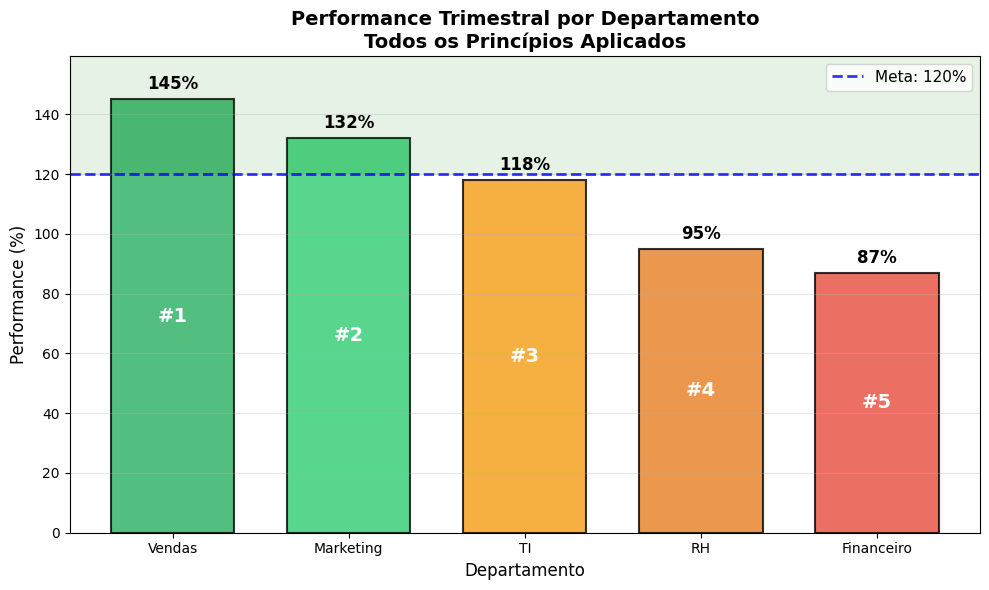

✅ PRINCÍPIOS APLICADOS COM SUCESSO:
   1️⃣ Base zero: Performance real visível (0 a 145%)
   2️⃣ Largura adequada: Comparação fácil de comprimentos
   3️⃣ Ordenação lógica: Ranking claro do melhor ao pior

📊 INSIGHTS IMEDIATOS:
   🥇 Melhor: Vendas (145%)
   🎯 Acima da meta: 2 de 5 departamentos
   ⚠️  Atenção: Financeiro precisa de suporte (87%)


In [ ]:
# BLOCO 4: Aplicando todos os princípios em conjunto

print("\n🎯 APLICANDO TODOS OS PRINCÍPIOS JUNTOS")
print("=" * 50)
print("Cenário: Relatório final de performance trimestral")

# Dados para relatório executivo
departamentos = ['Vendas', 'Marketing', 'TI', 'RH', 'Financeiro']
performance = [145, 132, 118, 95, 87]

# Aplicando todos os princípios
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Ordenando por performance (princípio 3)
dados_final = sorted(zip(departamentos, performance), key=lambda x: x[1], reverse=True)
deps_ord, perf_ord = zip(*dados_final)

# Criando gráfico com todos os princípios aplicados
bars = ax.bar(deps_ord, perf_ord,
              width=0.7,  # Princípio 2: largura adequada
              color=['#27AE60', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C'],
              alpha=0.8, edgecolor='black', linewidth=1.5)

# Princípio 1: Base zero (0 a máximo + margem)
ax.set_ylim(0, max(perf_ord) * 1.1)

# Adicionando valores e insights
for i, (bar, valor) in enumerate(zip(bars, perf_ord)):
    height = bar.get_height()
    # Valor da performance
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{valor}%', ha='center', va='bottom',
             fontweight='bold', fontsize=12)
    # Ranking
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
             f'#{i+1}', ha='center', va='center',
             fontweight='bold', fontsize=14, color='white')

# Destacando meta com linha de referência
meta = 120
ax.axhline(y=meta, color='blue', linestyle='--', linewidth=2,
           label=f'Meta: {meta}%', alpha=0.8)

# Configurações finais
ax.set_title('Performance Trimestral por Departamento\nTodos os Princípios Aplicados',
             fontweight='bold', fontsize=14)
ax.set_ylabel('Performance (%)', fontsize=12)
ax.set_xlabel('Departamento', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Adicionando zona de destaque para quem bateu a meta
ax.axhspan(meta, max(perf_ord) * 1.1, alpha=0.1, color='green',
           label='Acima da Meta')

plt.tight_layout()
plt.show()

print(f"✅ PRINCÍPIOS APLICADOS COM SUCESSO:")
print(f"   1️⃣ Base zero: Performance real visível (0 a {max(perf_ord)}%)")
print(f"   2️⃣ Largura adequada: Comparação fácil de comprimentos")
print(f"   3️⃣ Ordenação lógica: Ranking claro do melhor ao pior")
print(f"\n📊 INSIGHTS IMEDIATOS:")
print(f"   🥇 Melhor: {deps_ord[0]} ({perf_ord[0]}%)")
print(f"   🎯 Acima da meta: {sum(1 for p in perf_ord if p >= meta)} de {len(perf_ord)} departamentos")
print(f"   ⚠️  Atenção: {deps_ord[-1]} precisa de suporte ({perf_ord[-1]}%)")

# Tipos de graficos de barras

📊 GRÁFICOS DE BARRAS VERTICAIS - O CLÁSSICO UNIVERSAL
Cenário: Comparando performance atual vs. meta por produto


/tmp/ipython-input-99987579.py:74: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-99987579.py:74: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-99987579.py:74: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


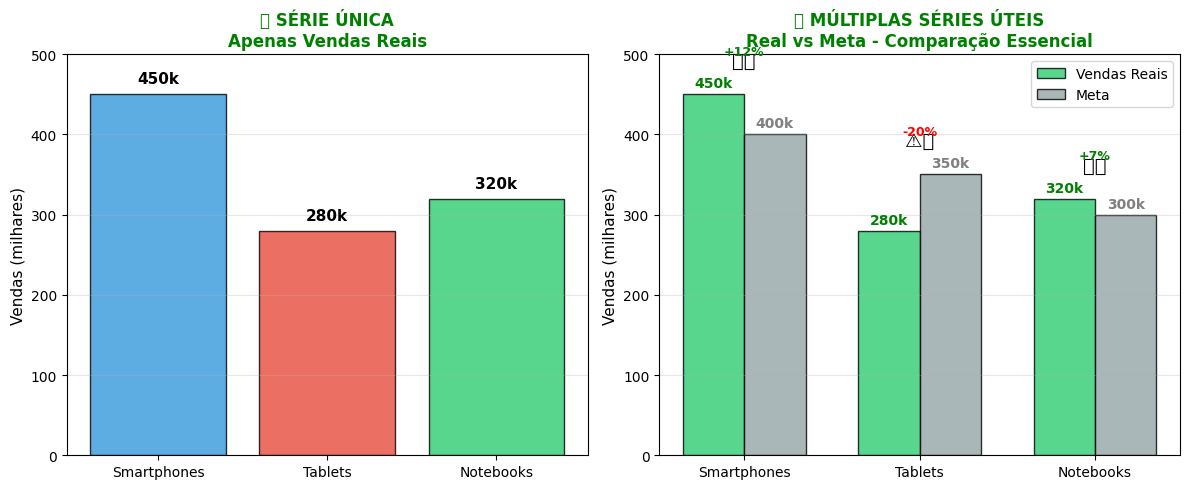

📊 ANÁLISE DOS GRÁFICOS VERTICAIS:
   ✅ Série única: Mostra apenas os resultados, sem contexto
   ✅ Múltiplas séries: Revela performance vs expectativa!
   🎯 Produtos acima da meta: 2 de 3
   🏆 Melhor performance: Smartphones (1.1x a meta)

💡 QUANDO MÚLTIPLAS SÉRIES SÃO VALIOSAS:
   • Comparar Real vs Meta/Orçamento
   • Antes vs Depois de uma mudança
   • Comparar dois grupos específicos
   • Quando a COMPARAÇÃO é o insight principal


In [ ]:
# BLOCO 1: Gráficos Verticais - O clássico e suas variações (VERSÃO MELHORADA)

import numpy as np
import matplotlib.pyplot as plt

print("📊 GRÁFICOS DE BARRAS VERTICAIS - O CLÁSSICO UNIVERSAL")
print("=" * 60)
print("Cenário: Comparando performance atual vs. meta por produto")

# Dados para demonstração - cenário onde múltiplas séries fazem sentido
produtos = ['Smartphones', 'Tablets', 'Notebooks']
vendas_reais = [450, 280, 320]
metas = [400, 350, 300]

# Criando comparação: Série única vs. Múltiplas séries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: SÉRIE ÚNICA - APENAS VENDAS REAIS
bars1 = ax1.bar(produtos, vendas_reais,
                color=['#3498DB', '#E74C3C', '#2ECC71'],
                alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for bar, valor in zip(bars1, vendas_reais):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{valor}k', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('✅ SÉRIE ÚNICA\nApenas Vendas Reais', fontweight='bold', fontsize=12, color='green')
ax1.set_ylabel('Vendas (milhares)', fontsize=11)
ax1.set_ylim(0, 500)
ax1.grid(True, alpha=0.3, axis='y')

# GRÁFICO 2: MÚLTIPLAS SÉRIES - REAL vs META (COMPARAÇÃO ÚTIL)
x = np.arange(len(produtos))
width = 0.35

bars2a = ax2.bar(x - width/2, vendas_reais, width, label='Vendas Reais',
                 color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=1)
bars2b = ax2.bar(x + width/2, metas, width, label='Meta',
                 color='#95A5A6', alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores e indicadores de performance
for i, (bar_real, bar_meta, real, meta) in enumerate(zip(bars2a, bars2b, vendas_reais, metas)):
    # Valores reais
    ax2.text(bar_real.get_x() + bar_real.get_width()/2., bar_real.get_height() + 5,
             f'{real}k', ha='center', va='bottom', fontsize=10, fontweight='bold', color='green')

    # Valores das metas
    ax2.text(bar_meta.get_x() + bar_meta.get_width()/2., bar_meta.get_height() + 5,
             f'{meta}k', ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray')

    # Indicador de sucesso/fracasso
    if real >= meta:
        ax2.text(i, max(real, meta) + 30, '🎯✅', ha='center', va='bottom', fontsize=14)
        crescimento = ((real / meta) - 1) * 100
        ax2.text(i, max(real, meta) + 45, f'+{crescimento:.0f}%', ha='center', va='bottom',
                fontweight='bold', color='green', fontsize=9)
    else:
        ax2.text(i, max(real, meta) + 30, '⚠️❌', ha='center', va='bottom', fontsize=14)
        deficit = ((real / meta) - 1) * 100
        ax2.text(i, max(real, meta) + 45, f'{deficit:.0f}%', ha='center', va='bottom',
                fontweight='bold', color='red', fontsize=9)

ax2.set_title('✅ MÚLTIPLAS SÉRIES ÚTEIS\nReal vs Meta - Comparação Essencial',
              fontweight='bold', fontsize=12, color='green')
ax2.set_ylabel('Vendas (milhares)', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(produtos)
ax2.set_ylim(0, 500)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Análise melhorada com insights específicos
produtos_acima_meta = sum(1 for real, meta in zip(vendas_reais, metas) if real >= meta)
melhor_performance = max([(real/meta, produto) for real, meta, produto in zip(vendas_reais, metas, produtos)])

print("📊 ANÁLISE DOS GRÁFICOS VERTICAIS:")
print("   ✅ Série única: Mostra apenas os resultados, sem contexto")
print("   ✅ Múltiplas séries: Revela performance vs expectativa!")
print(f"   🎯 Produtos acima da meta: {produtos_acima_meta} de {len(produtos)}")
print(f"   🏆 Melhor performance: {melhor_performance[1]} ({melhor_performance[0]:.1f}x a meta)")
print("\n💡 QUANDO MÚLTIPLAS SÉRIES SÃO VALIOSAS:")
print("   • Comparar Real vs Meta/Orçamento")
print("   • Antes vs Depois de uma mudança")
print("   • Comparar dois grupos específicos")
print("   • Quando a COMPARAÇÃO é o insight principal")


📊 GRÁFICOS DE BARRAS HORIZONTAIS - PARA TEXTOS LONGOS
Cenário: Ranking de satisfação por departamento


/tmp/ipython-input-3769889072.py:63: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3769889072.py:63: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3769889072.py:63: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

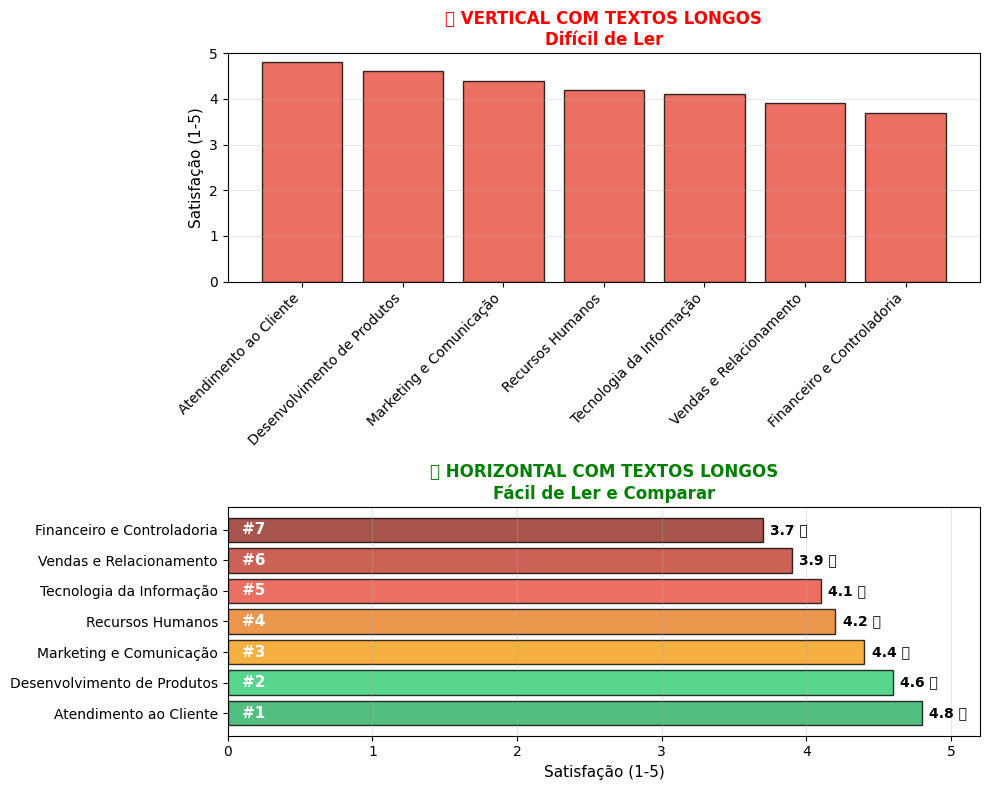

📊 COMPARAÇÃO VERTICAL vs HORIZONTAL:
   ❌ Vertical: Nomes longos ficam ilegíveis mesmo rotacionados
   ✅ Horizontal: Texto natural, fácil leitura, ranking claro
   🏆 Melhor departamento: Atendimento ao Cliente (4.8⭐)
   ⚠️  Atenção necessária: Financeiro e Controladoria (3.7⭐)


In [ ]:
# BLOCO 2: Gráficos Horizontais - Para textos longos e muitas categorias

print("\n📊 GRÁFICOS DE BARRAS HORIZONTAIS - PARA TEXTOS LONGOS")
print("=" * 65)
print("Cenário: Ranking de satisfação por departamento")

# Dados com nomes longos (cenário ideal para horizontal)
departamentos_longos = [
    'Atendimento ao Cliente',
    'Desenvolvimento de Produtos',
    'Marketing e Comunicação',
    'Recursos Humanos',
    'Tecnologia da Informação',
    'Vendas e Relacionamento',
    'Financeiro e Controladoria'
]

satisfacao = [4.8, 4.6, 4.4, 4.2, 4.1, 3.9, 3.7]

# Comparando vertical vs horizontal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# GRÁFICO 1: VERTICAL (PROBLEMÁTICO COM TEXTOS LONGOS)
bars1 = ax1.bar(range(len(departamentos_longos)), satisfacao,
                color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_title('❌ VERTICAL COM TEXTOS LONGOS\nDifícil de Ler',
              fontweight='bold', fontsize=12, color='red')
ax1.set_ylabel('Satisfação (1-5)', fontsize=11)
ax1.set_xticks(range(len(departamentos_longos)))
ax1.set_xticklabels(departamentos_longos, rotation=45, ha='right')
ax1.set_ylim(0, 5)
ax1.grid(True, alpha=0.3, axis='y')

# GRÁFICO 2: HORIZONTAL (IDEAL PARA TEXTOS LONGOS)
# Ordenando por satisfação para criar ranking claro
dados_ordenados = sorted(zip(departamentos_longos, satisfacao), key=lambda x: x[1], reverse=True)
deps_ord, sat_ord = zip(*dados_ordenados)

# Criando gradiente de cores para ranking
cores = ['#27AE60', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C', '#C0392B', '#922B21']
bars2 = ax2.barh(range(len(deps_ord)), sat_ord,
                 color=cores, alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores e rankings
for i, (bar, valor) in enumerate(zip(bars2, sat_ord)):
    width = bar.get_width()
    ax2.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{valor:.1f} ⭐', ha='left', va='center', fontweight='bold', fontsize=10)
    # Número do ranking
    ax2.text(0.1, bar.get_y() + bar.get_height()/2,
             f'#{i+1}', ha='left', va='center', fontweight='bold',
             fontsize=11, color='white')

ax2.set_title('✅ HORIZONTAL COM TEXTOS LONGOS\nFácil de Ler e Comparar',
              fontweight='bold', fontsize=12, color='green')
ax2.set_xlabel('Satisfação (1-5)', fontsize=11)
ax2.set_yticks(range(len(deps_ord)))
ax2.set_yticklabels(deps_ord)
ax2.set_xlim(0, 5.2)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("📊 COMPARAÇÃO VERTICAL vs HORIZONTAL:")
print("   ❌ Vertical: Nomes longos ficam ilegíveis mesmo rotacionados")
print("   ✅ Horizontal: Texto natural, fácil leitura, ranking claro")
print(f"   🏆 Melhor departamento: {deps_ord[0]} ({sat_ord[0]:.1f}⭐)")
print(f"   ⚠️  Atenção necessária: {deps_ord[-1]} ({sat_ord[-1]:.1f}⭐)")




📊 GRÁFICOS VERTICAIS EMPILHADOS - PARTES DE UM TODO
Cenário: Vendas por canal de venda em diferentes regiões


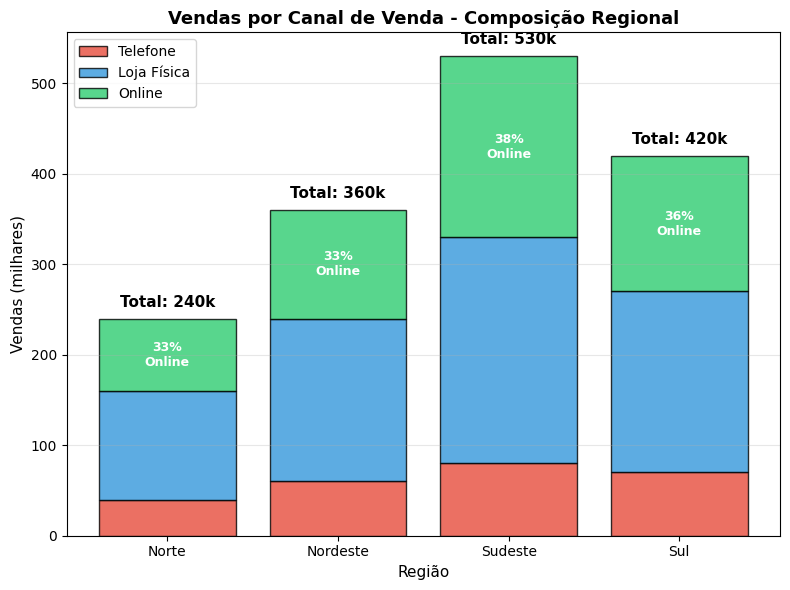

📊 ANÁLISE DO GRÁFICO EMPILHADO:
   ✅ Fácil ver: Totais por região e composição geral
   ⚠️  Difícil ver: Comparar 'Loja Física' entre regiões (sem base comum)
   🏆 Maior total: Sudeste (530k)
   📱 Online representa: 35% das vendas totais

💡 QUANDO USAR EMPILHADO:
   • Quando TOTAL e COMPOSIÇÃO são ambos importantes
   • Para mostrar como partes contribuem para o todo
   • Evite se comparação de subcomponentes for crítica


In [ ]:
# BLOCO 3: Gráficos Verticais Empilhados - Composição e totais

print("\n📊 GRÁFICOS VERTICAIS EMPILHADOS - PARTES DE UM TODO")
print("=" * 60)
print("Cenário: Vendas por canal de venda em diferentes regiões")

# Dados de composição
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul']
online = [80, 120, 200, 150]
loja_fisica = [120, 180, 250, 200]
telefone = [40, 60, 80, 70]

# Calculando totais para análise
totais = [sum(x) for x in zip(online, loja_fisica, telefone)]

# Criando gráfico empilhado
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Empilhando as barras
bars1 = ax.bar(regioes, telefone, label='Telefone',
               color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(regioes, loja_fisica, bottom=telefone, label='Loja Física',
               color='#3498DB', alpha=0.8, edgecolor='black', linewidth=1)
bars3 = ax.bar(regioes, online, bottom=[t+l for t,l in zip(telefone, loja_fisica)],
               label='Online', color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando totais no topo
for i, total in enumerate(totais):
    ax.text(i, total + 10, f'Total: {total}k', ha='center', va='bottom',
           fontweight='bold', fontsize=11)

# Adicionando percentuais dos canais principais (apenas Online para não poluir)
for i, (on, tot) in enumerate(zip(online, totais)):
    percentual = (on / tot) * 100
    # Posicionando no meio da seção online
    y_pos = telefone[i] + loja_fisica[i] + online[i]/2
    ax.text(i, y_pos, f'{percentual:.0f}%\nOnline', ha='center', va='center',
           fontweight='bold', fontsize=9, color='white')

ax.set_title('Vendas por Canal de Venda - Composição Regional',
             fontweight='bold', fontsize=13)
ax.set_ylabel('Vendas (milhares)', fontsize=11)
ax.set_xlabel('Região', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 ANÁLISE DO GRÁFICO EMPILHADO:")
print("   ✅ Fácil ver: Totais por região e composição geral")
print("   ⚠️  Difícil ver: Comparar 'Loja Física' entre regiões (sem base comum)")
print(f"   🏆 Maior total: {regioes[totais.index(max(totais))]} ({max(totais)}k)")
print(f"   📱 Online representa: {sum(online)/sum(totais)*100:.0f}% das vendas totais")
print("\n💡 QUANDO USAR EMPILHADO:")
print("   • Quando TOTAL e COMPOSIÇÃO são ambos importantes")
print("   • Para mostrar como partes contribuem para o todo")
print("   • Evite se comparação de subcomponentes for crítica")




📊 GRÁFICOS HORIZONTAIS EMPILHADOS - O MAIS VERSÁTIL
Cenário: Pesquisa de satisfação com produto (escala Likert)


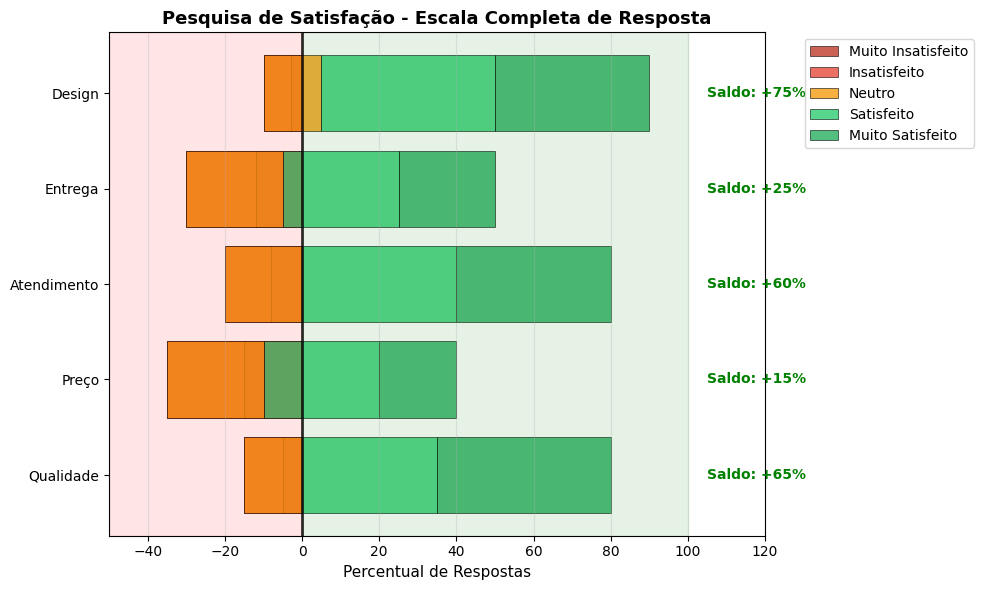

📊 ANÁLISE DO HORIZONTAL EMPILHADO:
   ✅ Linhas de base coerentes: Fácil comparar extremos
   ✅ Escala completa: De muito negativo a muito positivo
   ✅ Saldo líquido: Satisfação - Insatisfação imediatamente visível
   🏆 Melhor avaliado: Design (saldo: +75%)
   ⚠️  Precisa melhorar: Preço (saldo: +15%)


In [ ]:
# BLOCO 4: Gráficos Horizontais Empilhados - O mais versátil

print("\n📊 GRÁFICOS HORIZONTAIS EMPILHADOS - O MAIS VERSÁTIL")
print("=" * 65)
print("Cenário: Pesquisa de satisfação com produto (escala Likert)")

# Dados de pesquisa de satisfação (% de respostas)
aspectos = ['Qualidade', 'Preço', 'Atendimento', 'Entrega', 'Design']
muito_insatisfeito = [-5, -15, -8, -12, -3]
insatisfeito = [-10, -20, -12, -18, -7]
neutro = [15, 25, 20, 25, 15]
satisfeito = [35, 30, 40, 30, 45]
muito_satisfeito = [45, 20, 40, 25, 40]

# Criando gráfico horizontal empilhado (escala negativa-positiva)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Empilhando da esquerda para direita
y_pos = np.arange(len(aspectos))

# Lado negativo (insatisfação)
bars1 = ax.barh(y_pos, muito_insatisfeito, label='Muito Insatisfeito',
                color='#C0392B', alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = ax.barh(y_pos, insatisfeito, left=muito_insatisfeito, label='Insatisfeito',
                color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=0.5)

# Centro (neutro)
bars3 = ax.barh(y_pos, neutro, left=[mi+i for mi,i in zip(muito_insatisfeito, insatisfeito)],
                label='Neutro', color='#F39C12', alpha=0.8, edgecolor='black', linewidth=0.5)

# Lado positivo (satisfação)
left_neutral = [mi+i+n for mi,i,n in zip(muito_insatisfeito, insatisfeito, neutro)]
bars4 = ax.barh(y_pos, satisfeito, left=left_neutral, label='Satisfeito',
                color='#2ECC71', alpha=0.8, edgecolor='black', linewidth=0.5)

left_satisfied = [ln+s for ln,s in zip(left_neutral, satisfeito)]
bars5 = ax.barh(y_pos, muito_satisfeito, left=left_satisfied, label='Muito Satisfeito',
                color='#27AE60', alpha=0.8, edgecolor='black', linewidth=0.5)

# Adicionando linha de referência no zero
ax.axvline(x=0, color='black', linestyle='-', linewidth=2, alpha=0.8)

# Calculando e mostrando saldo líquido (satisfação - insatisfação)
for i, aspecto in enumerate(aspectos):
    satisfacao_total = satisfeito[i] + muito_satisfeito[i]
    insatisfacao_total = abs(muito_insatisfeito[i]) + abs(insatisfeito[i])
    saldo_liquido = satisfacao_total - insatisfacao_total

    # Posicionando o saldo na extremidade direita
    ax.text(105, i, f'Saldo: +{saldo_liquido}%' if saldo_liquido >= 0 else f'Saldo: {saldo_liquido}%',
           ha='left', va='center', fontweight='bold', fontsize=10,
           color='green' if saldo_liquido >= 0 else 'red')

ax.set_title('Pesquisa de Satisfação - Escala Completa de Resposta',
             fontweight='bold', fontsize=13)
ax.set_xlabel('Percentual de Respostas', fontsize=11)
ax.set_yticks(y_pos)
ax.set_yticklabels(aspectos)
ax.set_xlim(-50, 120)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='x')

# Adicionando zonas de referência
ax.axvspan(-50, 0, alpha=0.1, color='red', label='Zona Negativa')
ax.axvspan(0, 100, alpha=0.1, color='green', label='Zona Positiva')

plt.tight_layout()
plt.show()

print("📊 ANÁLISE DO HORIZONTAL EMPILHADO:")
print("   ✅ Linhas de base coerentes: Fácil comparar extremos")
print("   ✅ Escala completa: De muito negativo a muito positivo")
print("   ✅ Saldo líquido: Satisfação - Insatisfação imediatamente visível")

# Encontrando melhor e pior aspecto
saldos = []
for i in range(len(aspectos)):
    satisfacao_total = satisfeito[i] + muito_satisfeito[i]
    insatisfacao_total = abs(muito_insatisfeito[i]) + abs(insatisfeito[i])
    saldos.append(satisfacao_total - insatisfacao_total)

melhor_aspecto = aspectos[saldos.index(max(saldos))]
pior_aspecto = aspectos[saldos.index(min(saldos))]

print(f"   🏆 Melhor avaliado: {melhor_aspecto} (saldo: +{max(saldos)}%)")
print(f"   ⚠️  Precisa melhorar: {pior_aspecto} (saldo: +{min(saldos)}%)")



# Visualizaçoes a evitar

🚫 GRÁFICOS DE PIZZA E ROSCA - OS ENGANADORES POPULARES
Cenário: Participação de mercado por empresa


/tmp/ipython-input-824075514.py:63: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-824075514.py:63: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


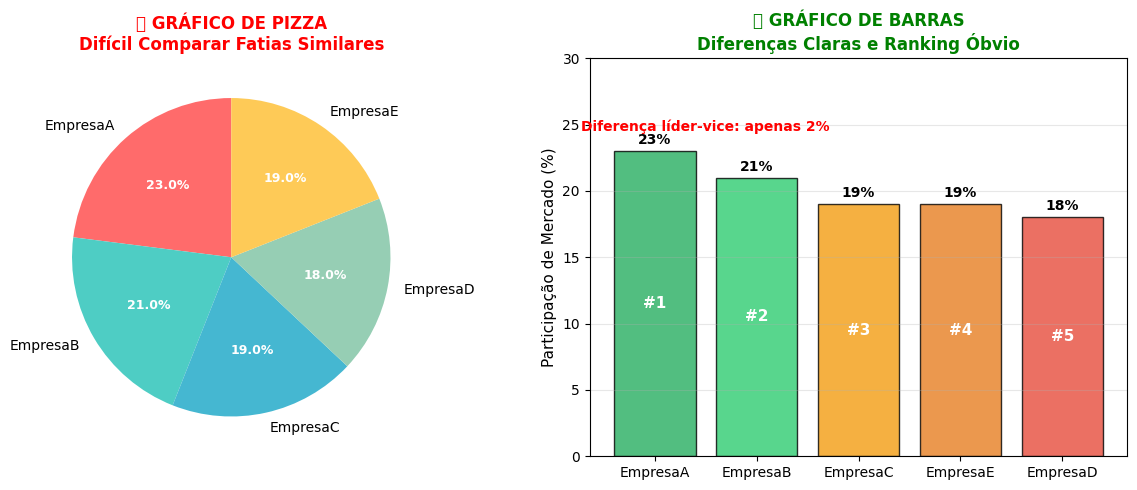

📊 ANÁLISE DA COMPARAÇÃO:
   ❌ Pizza: Impossível ver que diferença entre líder e 2º é apenas 2%
   ❌ Pizza: Empresas C e E parecem iguais (19% cada)
   ✅ Barras: Ranking imediatamente óbvio
   ✅ Barras: Diferenças pequenas visíveis e mensuráveis

💡 PROBLEMA FUNDAMENTAL DA PIZZA:
   Nosso cérebro é ruim em comparar:
   • Ângulos (difícil estimar se 21° > 19°)
   • Áreas (especialmente em formato circular)
   • Posições diferentes (fatia do topo vs lateral)


In [ ]:
# BLOCO 1: Demonstrando por que gráficos de pizza são problemáticos

import numpy as np
import matplotlib.pyplot as plt

print("🚫 GRÁFICOS DE PIZZA E ROSCA - OS ENGANADORES POPULARES")
print("=" * 65)
print("Cenário: Participação de mercado por empresa")

# Dados para demonstração - valores propositalmente similares
empresas = ['EmpresaA', 'EmpresaB', 'EmpresaC', 'EmpresaD', 'EmpresaE']
participacao = [23, 21, 19, 18, 19]  # Valores próximos - difíceis de distinguir em pizza

# Criando comparação: Pizza vs Barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: PIZZA (PROBLEMÁTICO)
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
wedges, texts, autotexts = ax1.pie(participacao, labels=empresas, autopct='%1.1f%%',
                                  colors=cores, startangle=90)

# Tentando melhorar legibilidade (mas ainda problemático)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

ax1.set_title('❌ GRÁFICO DE PIZZA\nDifícil Comparar Fatias Similares',
              fontweight='bold', fontsize=12, color='red')

# GRÁFICO 2: BARRAS (SOLUÇÃO CORRETA)
# Ordenando por participação para facilitar comparação
dados_ordenados = sorted(zip(empresas, participacao), key=lambda x: x[1], reverse=True)
empresas_ord, participacao_ord = zip(*dados_ordenados)

bars = ax2.bar(empresas_ord, participacao_ord,
               color=['#27AE60', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C'],
               alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores e diferenças
for i, (bar, valor) in enumerate(zip(bars, participacao_ord)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{valor}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Mostrando ranking
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'#{i+1}', ha='center', va='center', fontweight='bold',
             fontsize=11, color='white')

# Destacando diferenças mínimas
diferenca_1_2 = participacao_ord[0] - participacao_ord[1]
ax2.text(0.5, max(participacao_ord) + 1.5,
         f'Diferença líder-vice: apenas {diferenca_1_2}%',
         ha='center', fontweight='bold', fontsize=10, color='red')

ax2.set_title('✅ GRÁFICO DE BARRAS\nDiferenças Claras e Ranking Óbvio',
              fontweight='bold', fontsize=12, color='green')
ax2.set_ylabel('Participação de Mercado (%)', fontsize=11)
ax2.set_ylim(0, 30)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 ANÁLISE DA COMPARAÇÃO:")
print("   ❌ Pizza: Impossível ver que diferença entre líder e 2º é apenas 2%")
print("   ❌ Pizza: Empresas C e E parecem iguais (19% cada)")
print("   ✅ Barras: Ranking imediatamente óbvio")
print("   ✅ Barras: Diferenças pequenas visíveis e mensuráveis")
print(f"\n💡 PROBLEMA FUNDAMENTAL DA PIZZA:")
print("   Nosso cérebro é ruim em comparar:")
print("   • Ângulos (difícil estimar se 21° > 19°)")
print("   • Áreas (especialmente em formato circular)")
print("   • Posições diferentes (fatia do topo vs lateral)")




🚫 GRÁFICOS EM 3D - DISTORÇÃO DESNECESSÁRIA
Cenário: Vendas por região - 2D vs 3D real


/tmp/ipython-input-3961518164.py:64: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961518164.py:64: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961518164.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


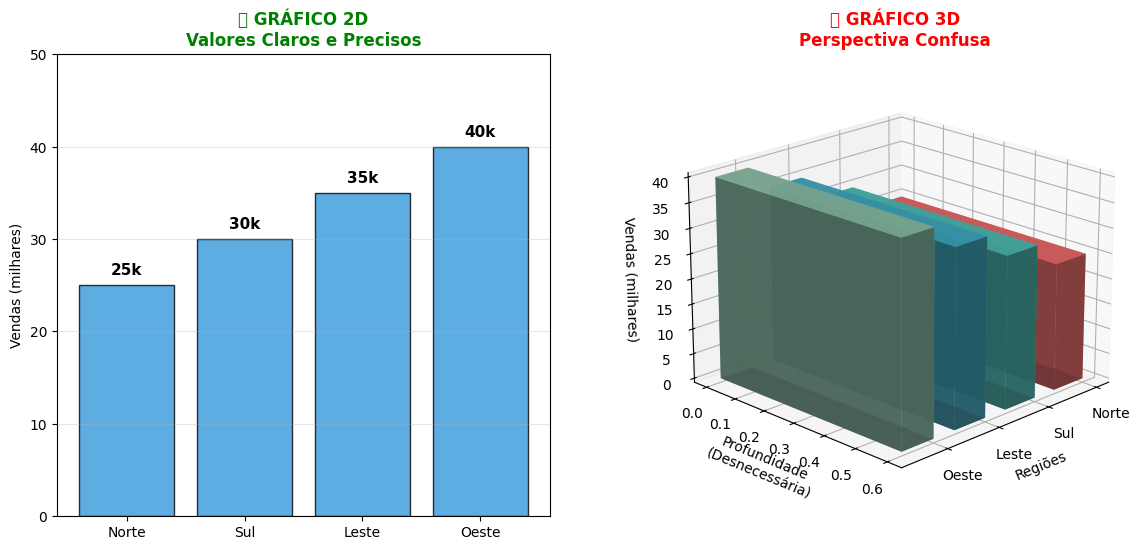

📊 PROBLEMAS IDENTIFICADOS NO GRÁFICO 3D:
   ❌ Perspectiva: Barras 'de trás' parecem menores que são
   ❌ Oclusão: Algumas barras ficam parcialmente escondidas
   ❌ Ângulo arbitrário: Girando a visão, impressões mudam
   ❌ Profundidade falsa: Eixo Y não representa nenhum dado real
   ❌ Leitura difícil: Difícil determinar valores exatos
   ✅ 2D: Comparação direta e precisa de todos os valores

💡 TESTE RÁPIDO:
   Olhando o 3D: Qual região tem vendas maiores, Sul ou Leste?
   Resposta real: Leste (35k) > Sul (30k)
   No 3D: Pode parecer o contrário devido à perspectiva!

🎯 QUANDO 3D FAZ SENTIDO:
   ✅ Dados genuinamente 3D (altura, largura, profundidade)
   ✅ Visualização científica específica
   ❌ NUNCA para dados que são naturalmente 2D


In [ ]:
# BLOCO 2: Demonstrando os problemas dos gráficos 3D

print("\n🚫 GRÁFICOS EM 3D - DISTORÇÃO DESNECESSÁRIA")
print("=" * 55)
print("Cenário: Vendas por região - 2D vs 3D real")

# Dados simples para demonstração
regioes = ['Norte', 'Sul', 'Leste', 'Oeste']
vendas = [25, 30, 35, 40]

# Importando biblioteca para 3D
from mpl_toolkits.mplot3d import Axes3D

# Criando comparação: 2D vs 3D
fig = plt.figure(figsize=(14, 6))

# GRÁFICO 1: BARRAS 2D SIMPLES (CORRETO)
ax1 = plt.subplot(1, 2, 1)
bars1 = ax1.bar(regioes, vendas, color='#3498DB', alpha=0.8, edgecolor='black')

# Adicionando valores precisos
for bar, valor in zip(bars1, vendas):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.8,
             f'{valor}k', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('✅ GRÁFICO 2D\nValores Claros e Precisos',
              fontweight='bold', fontsize=12, color='green')
ax1.set_ylabel('Vendas (milhares)')
ax1.set_ylim(0, 50)
ax1.grid(True, alpha=0.3, axis='y')

# GRÁFICO 2: BARRAS 3D (PROBLEMÁTICO)
ax2 = plt.subplot(1, 2, 2, projection='3d')

# Posições das barras no espaço 3D
x_pos = np.arange(len(regioes))
y_pos = np.zeros(len(regioes))
z_pos = np.zeros(len(regioes))

# Dimensões das barras
dx = np.ones(len(regioes)) * 0.6
dy = np.ones(len(regioes)) * 0.6
dz = vendas

# Criando barras 3D
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars3d = ax2.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.8)

# Configurando o gráfico 3D
ax2.set_title('❌ GRÁFICO 3D\nPerspectiva Confusa',
              fontweight='bold', fontsize=12, color='red')
ax2.set_xlabel('Regiões')
ax2.set_ylabel('Profundidade\n(Desnecessária)')
ax2.set_zlabel('Vendas (milhares)')

# Definindo rótulos do eixo X
ax2.set_xticks(x_pos)
ax2.set_xticklabels(regioes)

# Ajustando ângulo de visão para mostrar problemas de perspectiva
ax2.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print("📊 PROBLEMAS IDENTIFICADOS NO GRÁFICO 3D:")
print("   ❌ Perspectiva: Barras 'de trás' parecem menores que são")
print("   ❌ Oclusão: Algumas barras ficam parcialmente escondidas")
print("   ❌ Ângulo arbitrário: Girando a visão, impressões mudam")
print("   ❌ Profundidade falsa: Eixo Y não representa nenhum dado real")
print("   ❌ Leitura difícil: Difícil determinar valores exatos")
print("   ✅ 2D: Comparação direta e precisa de todos os valores")

print(f"\n💡 TESTE RÁPIDO:")
print(f"   Olhando o 3D: Qual região tem vendas maiores, Sul ou Leste?")
print(f"   Resposta real: Leste (35k) > Sul (30k)")
print(f"   No 3D: Pode parecer o contrário devido à perspectiva!")

print(f"\n🎯 QUANDO 3D FAZ SENTIDO:")
print(f"   ✅ Dados genuinamente 3D (altura, largura, profundidade)")
print(f"   ✅ Visualização científica específica")
print(f"   ❌ NUNCA para dados que são naturalmente 2D")


🚫 EIXOS Y SECUNDÁRIOS - ARMADILHA DA COMPARAÇÃO FALSA
Cenário: Vendas vs Temperatura - correlação real ou ilusão?


/tmp/ipython-input-2600392704.py:61: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


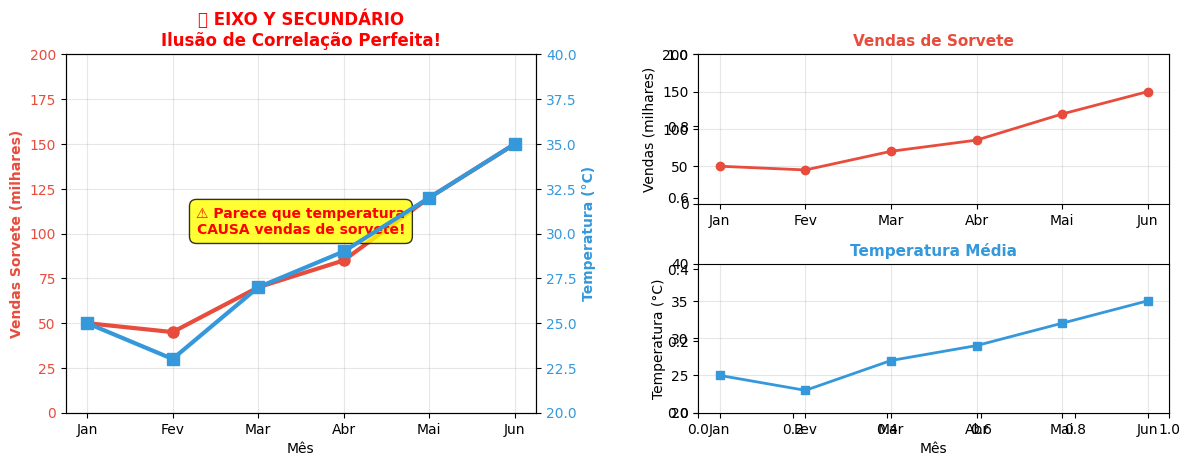

📊 ANÁLISE DA MANIPULAÇÃO:
   ❌ Eixo secundário: Cria ilusão de correlação perfeita
   ❌ Escalas ajustadas: 0-200 vs 20-40 (proporções falsas)
   📈 Correlação estatística real: 0.990
   ✅ Gráficos separados: Mostram cada variável em sua própria escala
   ✅ Honestidade: Permite análise independente de cada métrica

💡 ALTERNATIVAS AOS EIXOS Y SECUNDÁRIOS:
   1. Gráficos separados (mais honesto)
   2. Normalização (converter ambas para mesma escala)
   3. Gráfico de dispersão (para mostrar correlação real)
   4. Dois períodos diferentes se apropriado


In [ ]:
# BLOCO 3: Demonstrando os perigos dos eixos Y secundários

print("\n🚫 EIXOS Y SECUNDÁRIOS - ARMADILHA DA COMPARAÇÃO FALSA")
print("=" * 65)
print("Cenário: Vendas vs Temperatura - correlação real ou ilusão?")

# Dados que não têm relação real mas podem parecer ter
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
vendas_sorvete = [50, 45, 70, 85, 120, 150]  # Crescimento real
temperatura = [25, 23, 27, 29, 32, 35]       # Variação pequena mas natural

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: EIXO Y SECUNDÁRIO (ENGANOSO)
color1 = '#E74C3C'
color2 = '#3498DB'

# Primeira série (vendas)
ax1_linha1 = ax1.plot(meses, vendas_sorvete, color=color1, marker='o', linewidth=3,
                      markersize=8, label='Vendas Sorvete')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Vendas Sorvete (milhares)', color=color1, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 200)

# Segundo eixo Y (PROBLEMÁTICO)
ax1_twin = ax1.twinx()
ax1_twin.plot(meses, temperatura, color=color2, marker='s', linewidth=3,
              markersize=8, label='Temperatura')
ax1_twin.set_ylabel('Temperatura (°C)', color=color2, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=color2)
ax1_twin.set_ylim(20, 40)  # Escala manipulada para parecer correlação

ax1.set_title('❌ EIXO Y SECUNDÁRIO\nIlusão de Correlação Perfeita!',
              fontweight='bold', fontsize=12, color='red')
ax1.grid(True, alpha=0.3)

# Adicionando anotação enganosa
ax1.text(2.5, 100, '⚠️ Parece que temperatura\nCAUSA vendas de sorvete!',
         ha='center', fontsize=10, fontweight='bold', color='red',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8))

# GRÁFICO 2: GRÁFICOS SEPARADOS (HONESTO)
# Subplot para vendas
ax2_vendas = plt.subplot(2, 2, 2)
ax2_vendas.plot(meses, vendas_sorvete, color=color1, marker='o', linewidth=2, markersize=6)
ax2_vendas.set_title('Vendas de Sorvete', fontweight='bold', fontsize=11, color=color1)
ax2_vendas.set_ylabel('Vendas (milhares)')
ax2_vendas.set_ylim(0, 200)
ax2_vendas.grid(True, alpha=0.3)

# Subplot para temperatura
ax2_temp = plt.subplot(2, 2, 4)
ax2_temp.plot(meses, temperatura, color=color2, marker='s', linewidth=2, markersize=6)
ax2_temp.set_title('Temperatura Média', fontweight='bold', fontsize=11, color=color2)
ax2_temp.set_ylabel('Temperatura (°C)')
ax2_temp.set_xlabel('Mês')
ax2_temp.set_ylim(20, 40)
ax2_temp.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculando correlação real para mostrar a verdade
correlacao_real = np.corrcoef(vendas_sorvete, temperatura)[0,1]

print("📊 ANÁLISE DA MANIPULAÇÃO:")
print("   ❌ Eixo secundário: Cria ilusão de correlação perfeita")
print("   ❌ Escalas ajustadas: 0-200 vs 20-40 (proporções falsas)")
print(f"   📈 Correlação estatística real: {correlacao_real:.3f}")
print("   ✅ Gráficos separados: Mostram cada variável em sua própria escala")
print("   ✅ Honestidade: Permite análise independente de cada métrica")

print(f"\n💡 ALTERNATIVAS AOS EIXOS Y SECUNDÁRIOS:")
print("   1. Gráficos separados (mais honesto)")
print("   2. Normalização (converter ambas para mesma escala)")
print("   3. Gráfico de dispersão (para mostrar correlação real)")
print("   4. Dois períodos diferentes se apropriado")



In [ ]:
# BLOCO 4: Demonstrando as alternativas corretas

print(f"\n✅ ALTERNATIVAS SEMPRE MELHORES:")
print("=" * 50)

# Resumo das soluções
solucoes = [
    ("EM VEZ DE PIZZA", "USE BARRAS", "Comparação precisa de valores"),
    ("EM VEZ DE ROSCA", "USE BARRAS HORIZONTAIS", "Melhor para muitas categorias"),
    ("EM VEZ DE 3D", "USE 2D LIMPO", "Precisão sem distorção"),
    ("EM VEZ DE EIXO Y DUPLO", "USE GRÁFICOS SEPARADOS", "Análise honesta e clara")
]

print(f"{'EVITE':<20} {'PREFIRA':<25} {'PORQUE':<30}")
print("-" * 75)
for evite, prefira, porque in solucoes:
    print(f"{evite:<20} {prefira:<25} {porque:<30}")




✅ ALTERNATIVAS SEMPRE MELHORES:
EVITE                PREFIRA                   PORQUE                        
---------------------------------------------------------------------------
EM VEZ DE PIZZA      USE BARRAS                Comparação precisa de valores 
EM VEZ DE ROSCA      USE BARRAS HORIZONTAIS    Melhor para muitas categorias 
EM VEZ DE 3D         USE 2D LIMPO              Precisão sem distorção        
EM VEZ DE EIXO Y DUPLO USE GRÁFICOS SEPARADOS    Análise honesta e clara       


# Comunicar sem ruido

🧠 CARGA COGNITIVA - ECONOMIZANDO ENERGIA MENTAL
Cenário: Vendas mensais - Alta vs Baixa carga cognitiva


/tmp/ipython-input-2393568746.py:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2393568746.py:66: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


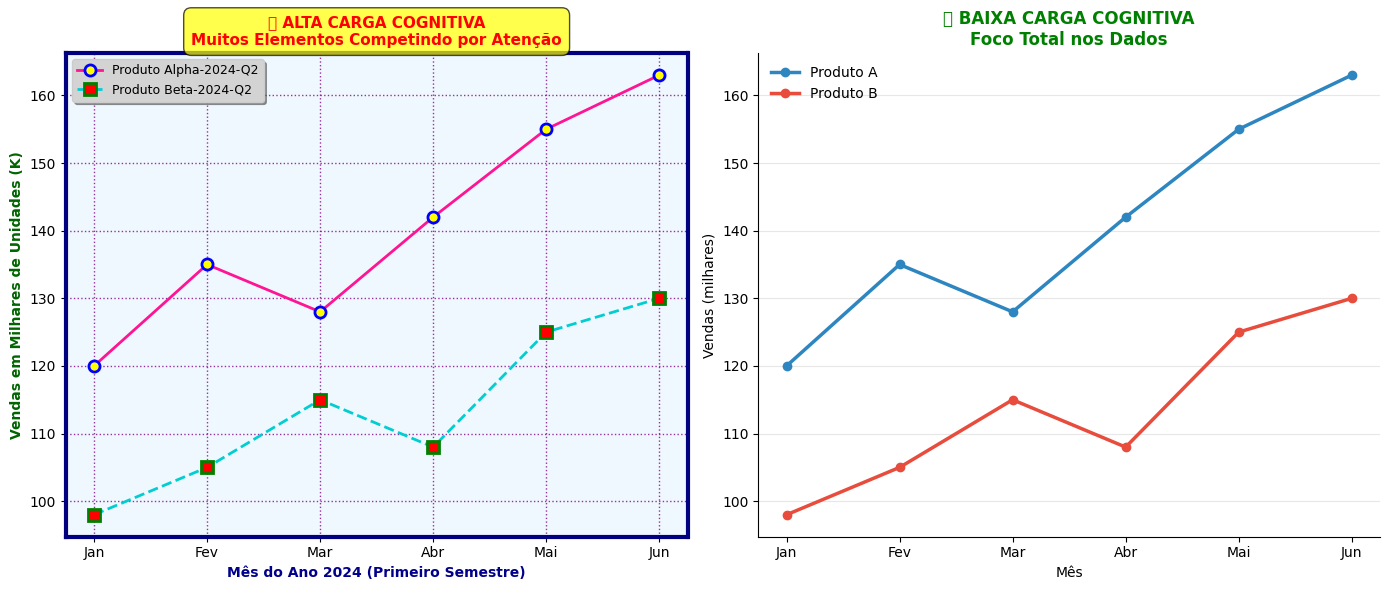

🧠 ANÁLISE DA CARGA COGNITIVA:
   ❌ Alta carga: Cérebro gasta energia decifrando o visual
   ❌ Cores confusas, bordas desnecessárias, textos excessivos
   ✅ Baixa carga: Energia total focada em entender os dados
   ✅ Design invisível permite foco no insight

💡 PRINCÍPIO: Remova tudo que não ajuda a compreensão!


In [ ]:
# BLOCO 1: Demonstrando o impacto da carga cognitiva

import matplotlib.pyplot as plt
import numpy as np

print("🧠 CARGA COGNITIVA - ECONOMIZANDO ENERGIA MENTAL")
print("=" * 60)
print("Cenário: Vendas mensais - Alta vs Baixa carga cognitiva")

# Dados para demonstração
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
produto_a = [120, 135, 128, 142, 155, 163]
produto_b = [98, 105, 115, 108, 125, 130]

# Comparação: Alta carga cognitiva vs Baixa carga cognitiva
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: ALTA CARGA COGNITIVA (PROBLEMÁTICO)
# Usando muitos elementos desnecessários
ax1.plot(meses, produto_a, marker='o', linestyle='-', linewidth=2,
         markersize=8, color='#FF1493', markerfacecolor='yellow',
         markeredgecolor='blue', markeredgewidth=2, label='Produto Alpha-2024-Q2')
ax1.plot(meses, produto_b, marker='s', linestyle='--', linewidth=2,
         markersize=8, color='#00CED1', markerfacecolor='red',
         markeredgecolor='green', markeredgewidth=2, label='Produto Beta-2024-Q2')

# Adicionando elementos visuais desnecessários
ax1.grid(True, alpha=0.8, linestyle=':', linewidth=1, color='purple')
ax1.set_facecolor('#F0F8FF')

# Bordas e decorações excessivas
for spine in ax1.spines.values():
    spine.set_linewidth(3)
    spine.set_color('navy')

# Texto com formatação excessiva
ax1.set_title('❌ ALTA CARGA COGNITIVA\nMuitos Elementos Competindo por Atenção',
              fontweight='bold', fontsize=11, color='red',
              bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7))
ax1.set_xlabel('Mês do Ano 2024 (Primeiro Semestre)', fontsize=10,
               color='darkblue', fontweight='bold')
ax1.set_ylabel('Vendas em Milhares de Unidades (K)', fontsize=10,
               color='darkgreen', fontweight='bold')
ax1.legend(loc='upper left', frameon=True, fancybox=True, shadow=True,
           fontsize=9, facecolor='lightgray')

# GRÁFICO 2: BAIXA CARGA COGNITIVA (CORRETO)
# Elementos limpos e focados
ax2.plot(meses, produto_a, marker='o', linewidth=2.5, markersize=6,
         color='#2E86C1', label='Produto A')
ax2.plot(meses, produto_b, marker='o', linewidth=2.5, markersize=6,
         color='#E74C3C', label='Produto B')

# Design limpo
ax2.grid(True, alpha=0.3, axis='y')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Texto claro e direto
ax2.set_title('✅ BAIXA CARGA COGNITIVA\nFoco Total nos Dados',
              fontweight='bold', fontsize=12, color='green')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Vendas (milhares)')
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()

print("🧠 ANÁLISE DA CARGA COGNITIVA:")
print("   ❌ Alta carga: Cérebro gasta energia decifrando o visual")
print("   ❌ Cores confusas, bordas desnecessárias, textos excessivos")
print("   ✅ Baixa carga: Energia total focada em entender os dados")
print("   ✅ Design invisível permite foco no insight")
print("\n💡 PRINCÍPIO: Remova tudo que não ajuda a compreensão!")


🎨 SATURAÇÃO - ELIMINANDO O RUÍDO VISUAL
Processo: Limpando progressivamente um gráfico saturado


/tmp/ipython-input-864728366.py:90: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-864728366.py:90: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


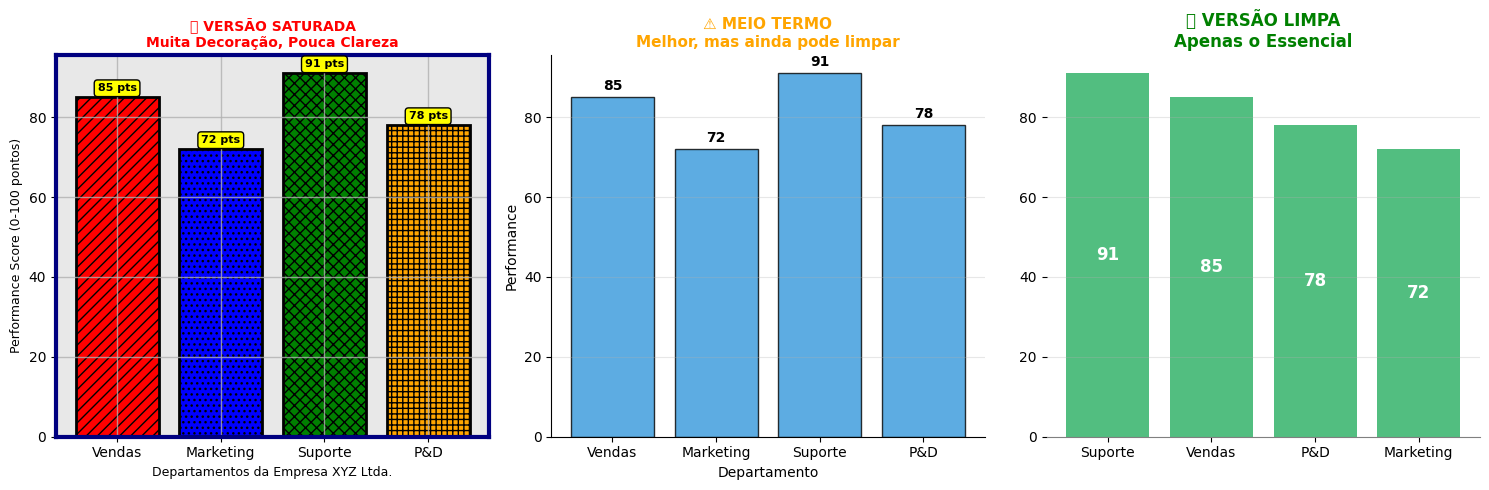

🎨 EVOLUÇÃO DA LIMPEZA:
   ❌ Saturado: Bordas, hachuras, cores múltiplas, texto excessivo
   ⚠️ Meio termo: Ainda tem elementos desnecessários
   ✅ Limpo: Apenas elementos que ajudam a compreensão
   🏆 Resultado: Suporte lidera (91), P&D precisa atenção (78)


In [ ]:
# BLOCO 2: Demonstrando eliminação progressiva de saturação

print("\n🎨 SATURAÇÃO - ELIMINANDO O RUÍDO VISUAL")
print("=" * 50)
print("Processo: Limpando progressivamente um gráfico saturado")

# Dados simples
categorias = ['Vendas', 'Marketing', 'Suporte', 'P&D']
valores = [85, 72, 91, 78]

# Criando 3 versões: Saturado → Meio termo → Limpo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# VERSÃO 1: SATURADO (RUIM)
bars1 = axes[0].bar(categorias, valores,
                    color=['red', 'blue', 'green', 'orange'],
                    edgecolor='black', linewidth=2,
                    hatch=['///', '...', 'xxx', '+++'])

# Adicionando saturação desnecessária
axes[0].grid(True, alpha=0.8, linestyle='-', linewidth=1)
axes[0].set_facecolor('#E8E8E8')

# Bordas excessivas
for spine in axes[0].spines.values():
    spine.set_linewidth(3)
    spine.set_color('navy')

# Texto excessivo
axes[0].set_title('❌ VERSÃO SATURADA\nMuita Decoração, Pouca Clareza',
                  fontweight='bold', fontsize=10, color='red')
axes[0].set_xlabel('Departamentos da Empresa XYZ Ltda.', fontsize=9)
axes[0].set_ylabel('Performance Score (0-100 pontos)', fontsize=9)

# Valores com formatação excessiva
for bar, valor in zip(bars1, valores):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{valor} pts', ha='center', va='bottom',
                 fontweight='bold', fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))

# VERSÃO 2: MEIO TERMO (MELHOR)
bars2 = axes[1].bar(categorias, valores,
                    color='#3498DB', alpha=0.8,
                    edgecolor='black', linewidth=1)

# Reduzindo saturação
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].set_title('⚠️ MEIO TERMO\nMelhor, mas ainda pode limpar',
                  fontweight='bold', fontsize=11, color='orange')
axes[1].set_xlabel('Departamento')
axes[1].set_ylabel('Performance')

# Valores mais limpos
for bar, valor in zip(bars2, valores):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{valor}', ha='center', va='bottom', fontweight='bold')

# VERSÃO 3: LIMPO (IDEAL)
# Ordenando por performance para facilitar comparação
dados_ord = sorted(zip(categorias, valores), key=lambda x: x[1], reverse=True)
cats_ord, vals_ord = zip(*dados_ord)

bars3 = axes[2].bar(cats_ord, vals_ord,
                    color='#27AE60', alpha=0.8)

# Design mínimo e funcional
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_visible(False)
axes[2].spines['bottom'].set_color('gray')

# Apenas o essencial
axes[2].set_title('✅ VERSÃO LIMPA\nApenas o Essencial',
                  fontweight='bold', fontsize=12, color='green')

# Valores integrados elegantemente
for bar, valor in zip(bars3, vals_ord):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height/2,
                 valor, ha='center', va='center',
                 fontweight='bold', color='white', fontsize=12)

plt.tight_layout()
plt.show()

print("🎨 EVOLUÇÃO DA LIMPEZA:")
print("   ❌ Saturado: Bordas, hachuras, cores múltiplas, texto excessivo")
print("   ⚠️ Meio termo: Ainda tem elementos desnecessários")
print("   ✅ Limpo: Apenas elementos que ajudam a compreensão")
print("   🏆 Resultado: Suporte lidera (91), P&D precisa atenção (78)")




👁️ PRINCÍPIOS DA GESTALT - PERCEPÇÃO VISUAL NATURAL
Demonstração: Como aplicar Gestalt em visualização de dados


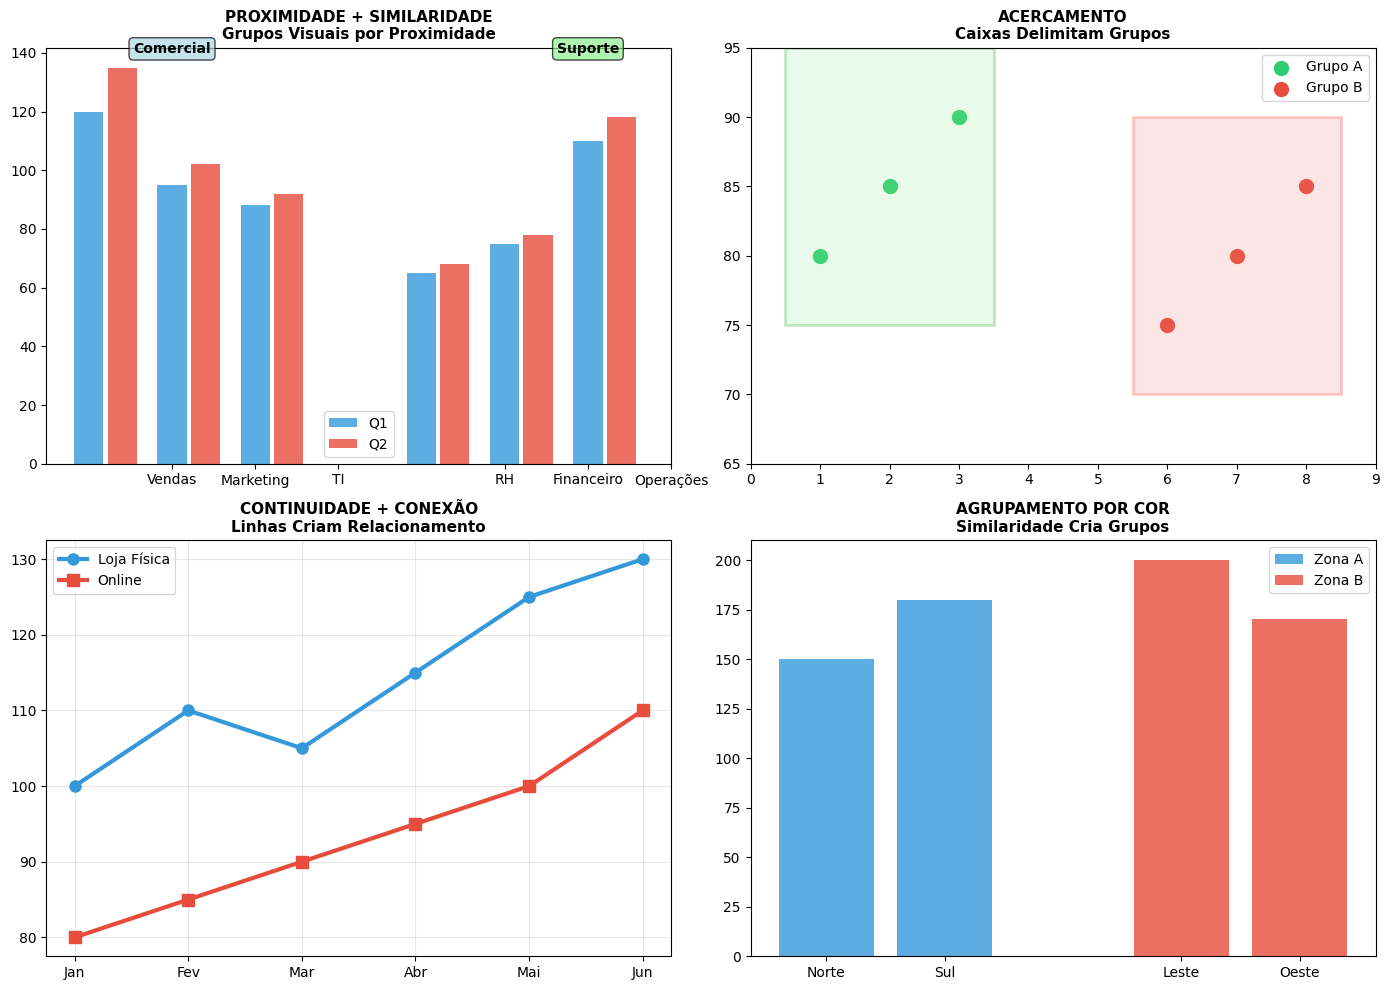

👁️ PRINCÍPIOS DA GESTALT APLICADOS:
   🔗 Proximidade: Elementos próximos = relacionados
   🎨 Similaridade: Mesma cor/forma = mesmo grupo
   📦 Acercamento: Caixas delimitam grupos claramente
   ➡️ Continuidade: Linhas conectam pontos relacionados
   🔗 Conexão: Elementos conectados = relacionados
   🎯 Fechamento: Cérebro 'completa' padrões incompletos


In [ ]:
# BLOCO 3: Demonstrando os Princípios da Gestalt em ação

print("\n👁️ PRINCÍPIOS DA GESTALT - PERCEPÇÃO VISUAL NATURAL")
print("=" * 65)
print("Demonstração: Como aplicar Gestalt em visualização de dados")

# Dados para demonstração
departamentos = ['Vendas', 'Marketing', 'TI', 'RH', 'Financeiro', 'Operações']
q1 = [120, 95, 88, 65, 75, 110]
q2 = [135, 102, 92, 68, 78, 118]

# Criando demonstração dos princípios
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# PRINCÍPIO 1: PROXIMIDADE + SIMILARIDADE
ax1.bar(np.arange(3), q1[:3], width=0.35, label='Q1', color='#3498DB', alpha=0.8)
ax1.bar(np.arange(3) + 0.4, q2[:3], width=0.35, label='Q2', color='#E74C3C', alpha=0.8)

# Espaço maior antes do próximo grupo
ax1.bar(np.arange(3) + 4, q1[3:], width=0.35, color='#3498DB', alpha=0.8)
ax1.bar(np.arange(3) + 4.4, q2[3:], width=0.35, color='#E74C3C', alpha=0.8)

ax1.set_title('PROXIMIDADE + SIMILARIDADE\nGrupos Visuais por Proximidade',
              fontweight='bold', fontsize=11)
ax1.set_xticks([1, 2, 3, 5, 6, 7])
ax1.set_xticklabels(departamentos)

# Adicionando rótulo dos grupos
ax1.text(1, max(q1+q2) + 5, 'Comercial', ha='center', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
ax1.text(6, max(q1+q2) + 5, 'Suporte', ha='center', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

ax1.legend()

# PRINCÍPIO 2: ACERCAMENTO (ENCLOSURE)
ax2.scatter([1, 2, 3], [80, 85, 90], s=100, color='#2ECC71', label='Grupo A')
ax2.scatter([6, 7, 8], [75, 80, 85], s=100, color='#E74C3C', label='Grupo B')

# Criando cercamentos visuais
from matplotlib.patches import Rectangle
rect1 = Rectangle((0.5, 75), 3, 20, linewidth=2, edgecolor='green',
                 facecolor='lightgreen', alpha=0.2)
ax2.add_patch(rect1)

rect2 = Rectangle((5.5, 70), 3, 20, linewidth=2, edgecolor='red',
                 facecolor='lightcoral', alpha=0.2)
ax2.add_patch(rect2)

ax2.set_title('ACERCAMENTO\nCaixas Delimitam Grupos', fontweight='bold', fontsize=11)
ax2.set_xlim(0, 9)
ax2.set_ylim(65, 95)
ax2.legend()

# PRINCÍPIO 3: CONTINUIDADE + CONEXÃO
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
vendas_loja = [100, 110, 105, 115, 125, 130]
vendas_online = [80, 85, 90, 95, 100, 110]

ax3.plot(meses, vendas_loja, marker='o', linewidth=3, markersize=8,
         color='#3498DB', label='Loja Física')
ax3.plot(meses, vendas_online, marker='s', linewidth=3, markersize=8,
         color='#E74C3C', label='Online')

ax3.set_title('CONTINUIDADE + CONEXÃO\nLinhas Criam Relacionamento',
              fontweight='bold', fontsize=11)
ax3.legend()
ax3.grid(True, alpha=0.3)

# PRINCÍPIO 4: FECHAMENTO + AGRUPAMENTO INTELIGENTE
# Usando cores para criar grupos visuais
categorias_grupo1 = ['Norte', 'Sul']
valores_grupo1 = [150, 180]
categorias_grupo2 = ['Leste', 'Oeste']
valores_grupo2 = [200, 170]

x_pos1 = [0, 1]
x_pos2 = [3, 4]

ax4.bar(x_pos1, valores_grupo1, color='#3498DB', alpha=0.8, label='Zona A')
ax4.bar(x_pos2, valores_grupo2, color='#E74C3C', alpha=0.8, label='Zona B')

ax4.set_title('AGRUPAMENTO POR COR\nSimilaridade Cria Grupos',
              fontweight='bold', fontsize=11)
ax4.set_xticks([0, 1, 3, 4])
ax4.set_xticklabels(categorias_grupo1 + categorias_grupo2)
ax4.legend()

plt.tight_layout()
plt.show()

print("👁️ PRINCÍPIOS DA GESTALT APLICADOS:")
print("   🔗 Proximidade: Elementos próximos = relacionados")
print("   🎨 Similaridade: Mesma cor/forma = mesmo grupo")
print("   📦 Acercamento: Caixas delimitam grupos claramente")
print("   ➡️ Continuidade: Linhas conectam pontos relacionados")
print("   🔗 Conexão: Elementos conectados = relacionados")
print("   🎯 Fechamento: Cérebro 'completa' padrões incompletos")




🎯 APLICAÇÃO INTEGRADA - TODOS OS PRINCÍPIOS JUNTOS
Cenário: Performance departamental com design estratégico


/tmp/ipython-input-2741405388.py:71: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


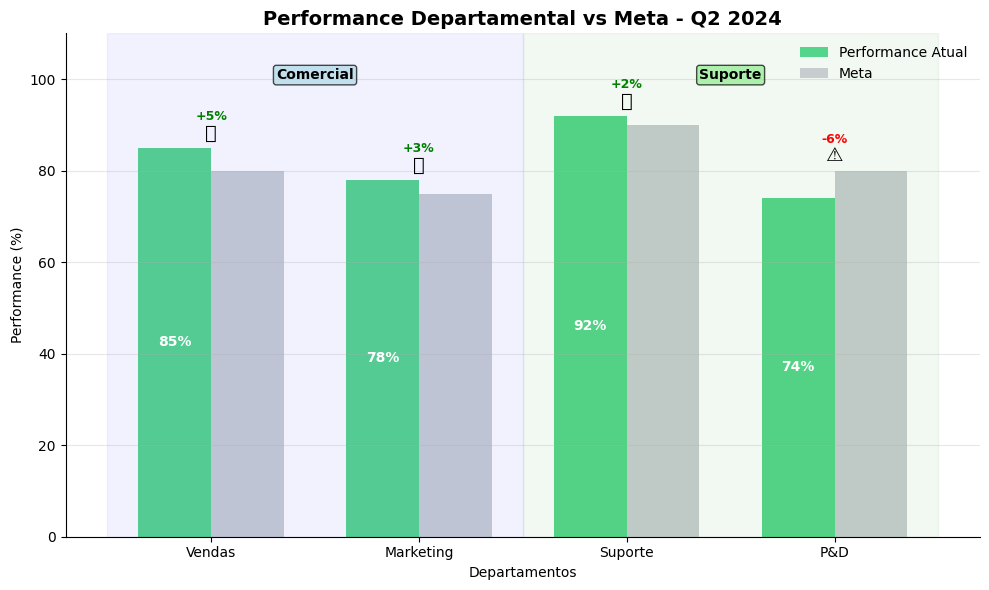

📊 INSIGHTS IMEDIATOS (graças ao design eficaz):
   🎯 Departamentos que atingiram meta: 3 de 4
   🏆 Melhor performance: Suporte (92%)
   ⚠️ Precisa atenção: P&D (74%)
   📈 Área comercial: Performance média de 81.5%
   🔧 Área de suporte: Performance média de 83.0%

✅ PRINCÍPIOS APLICADOS COM SUCESSO:
   🧠 Carga cognitiva baixa: Design limpo, foco nos dados
   🎨 Saturação eliminada: Apenas elementos essenciais
   👁️ Gestalt aplicado: Agrupamento visual por função
   🎯 Resultado: Insights imediatos e acionáveis!


In [ ]:
# BLOCO 4: Exemplo integrado aplicando todos os princípios (VERSÃO CORRIGIDA)

print("\n🎯 APLICAÇÃO INTEGRADA - TODOS OS PRINCÍPIOS JUNTOS")
print("=" * 60)
print("Cenário: Performance departamental com design estratégico")

# Dados corrigidos - mesma unidade e escala
departamentos = ['Vendas', 'Marketing', 'Suporte', 'P&D']
performance_atual = [85, 78, 92, 74]  # Performance atual (%)
meta_performance = [80, 75, 90, 80]   # Meta esperada (%)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Aplicando TODOS os princípios de design
x_pos = np.arange(len(departamentos))
width = 0.35

# Usando SIMILARIDADE (cores consistentes)
bars_atual = ax.bar(x_pos - width/2, performance_atual, width,
                    label='Performance Atual', color='#2ECC71', alpha=0.8)
bars_meta = ax.bar(x_pos + width/2, meta_performance, width,
                   label='Meta', color='#BDC3C7', alpha=0.8)

# Aplicando PROXIMIDADE e ACERCAMENTO (agrupamento visual por função)
# Grupo 1: Funções comerciais (Vendas, Marketing)
ax.axvspan(-0.5, 1.5, alpha=0.05, color='blue')
ax.text(0.5, 100, 'Comercial', ha='center', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue", alpha=0.7))

# Grupo 2: Funções de suporte (Suporte, P&D)
ax.axvspan(1.5, 3.5, alpha=0.05, color='green')
ax.text(2.5, 100, 'Suporte', ha='center', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", facecolor="lightgreen", alpha=0.7))

# Reduzindo CARGA COGNITIVA (design limpo)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3, axis='y')

# Eliminando SATURAÇÃO (apenas elementos essenciais)
# Indicadores visuais simples: atingiu meta?
for i, (atual, meta) in enumerate(zip(performance_atual, meta_performance)):
    if atual >= meta:
        ax.text(i, max(atual, meta) + 2, '✅', ha='center', fontsize=14)
        diferenca = atual - meta
        ax.text(i, max(atual, meta) + 6, f'+{diferenca}%', ha='center',
               fontsize=9, fontweight='bold', color='green')
    else:
        ax.text(i, max(atual, meta) + 2, '⚠️', ha='center', fontsize=14)
        diferenca = atual - meta
        ax.text(i, max(atual, meta) + 6, f'{diferenca}%', ha='center',
               fontsize=9, fontweight='bold', color='red')

# Adicionando valores nas barras para precisão
for bar, valor in zip(bars_atual, performance_atual):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{valor}%', ha='center', va='center',
            fontweight='bold', color='white', fontsize=10)

# CONTINUIDADE (título que conecta com objetivo)
ax.set_title('Performance Departamental vs Meta - Q2 2024',
             fontweight='bold', fontsize=14)
ax.set_xlabel('Departamentos')
ax.set_ylabel('Performance (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(departamentos)
ax.set_ylim(0, 110)
ax.legend(frameon=False, loc='upper right')

plt.tight_layout()
plt.show()

# Calculando insights com dados corrigidos
metas_atingidas = sum(1 for atual, meta in zip(performance_atual, meta_performance) if atual >= meta)
melhor_depto = departamentos[performance_atual.index(max(performance_atual))]
pior_depto = departamentos[performance_atual.index(min(performance_atual))]

print(f"📊 INSIGHTS IMEDIATOS (graças ao design eficaz):")
print(f"   🎯 Departamentos que atingiram meta: {metas_atingidas} de {len(departamentos)}")
print(f"   🏆 Melhor performance: {melhor_depto} ({max(performance_atual)}%)")
print(f"   ⚠️ Precisa atenção: {pior_depto} ({min(performance_atual)}%)")
print(f"   📈 Área comercial: Performance média de {np.mean(performance_atual[:2]):.1f}%")
print(f"   🔧 Área de suporte: Performance média de {np.mean(performance_atual[2:]):.1f}%")

print(f"\n✅ PRINCÍPIOS APLICADOS COM SUCESSO:")
print(f"   🧠 Carga cognitiva baixa: Design limpo, foco nos dados")
print(f"   🎨 Saturação eliminada: Apenas elementos essenciais")
print(f"   👁️ Gestalt aplicado: Agrupamento visual por função")
print(f"   🎯 Resultado: Insights imediatos e acionáveis!")

# Ordem visual e contraste

📐 ALINHAMENTO - POSICIONAMENTO CONSISTENTE
Exemplo: Vendas mensais - rótulos alinhados vs desalinhados


/tmp/ipython-input-1820773374.py:46: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1820773374.py:46: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


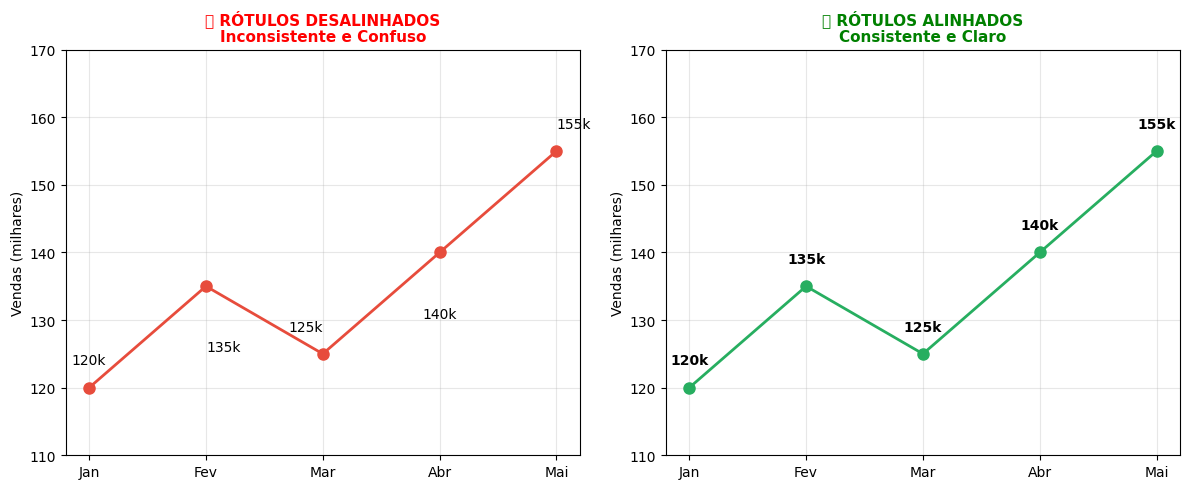

📐 DIFERENÇA DO ALINHAMENTO:
   ❌ Inconsistente: Olho precisa 'caçar' cada valor
   ✅ Consistente: Padrão previsível, leitura automática
   💡 Alinhamento cria expectativa visual que facilita a leitura


In [ ]:
# BLOCO 1: Alinhamento - Exemplo com gráfico de linhas

import matplotlib.pyplot as plt
import numpy as np

print("📐 ALINHAMENTO - POSICIONAMENTO CONSISTENTE")
print("=" * 50)
print("Exemplo: Vendas mensais - rótulos alinhados vs desalinhados")

# Dados simples
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai']
vendas = [120, 135, 125, 140, 155]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: RÓTULOS INCONSISTENTES (DESALINHADOS)
ax1.plot(meses, vendas, 'o-', linewidth=2, markersize=8, color='#E74C3C')

# Posicionando rótulos de forma inconsistente
ax1.text(0, vendas[0] + 3, f'{vendas[0]}k', ha='center', va='bottom', fontsize=10)  # Centro
ax1.text(1, vendas[1] - 8, f'{vendas[1]}k', ha='left', va='top', fontsize=10)     # Embaixo à esquerda
ax1.text(2, vendas[2] + 3, f'{vendas[2]}k', ha='right', va='bottom', fontsize=10)  # Cima à direita
ax1.text(3, vendas[3] - 8, f'{vendas[3]}k', ha='center', va='top', fontsize=10)   # Embaixo centro
ax1.text(4, vendas[4] + 3, f'{vendas[4]}k', ha='left', va='bottom', fontsize=10)  # Cima à esquerda

ax1.set_title('❌ RÓTULOS DESALINHADOS\nInconsistente e Confuso',
              fontweight='bold', fontsize=11, color='red')
ax1.set_ylabel('Vendas (milhares)')
ax1.set_ylim(110, 170)
ax1.grid(True, alpha=0.3)

# GRÁFICO 2: RÓTULOS CONSISTENTES (ALINHADOS)
ax2.plot(meses, vendas, 'o-', linewidth=2, markersize=8, color='#27AE60')

# Todos os rótulos consistentemente posicionados acima dos pontos, centralizados
for i, (mes, valor) in enumerate(zip(meses, vendas)):
    ax2.text(i, valor + 3, f'{valor}k', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

ax2.set_title('✅ RÓTULOS ALINHADOS\nConsistente e Claro',
              fontweight='bold', fontsize=11, color='green')
ax2.set_ylabel('Vendas (milhares)')
ax2.set_ylim(110, 170)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📐 DIFERENÇA DO ALINHAMENTO:")
print("   ❌ Inconsistente: Olho precisa 'caçar' cada valor")
print("   ✅ Consistente: Padrão previsível, leitura automática")
print("   💡 Alinhamento cria expectativa visual que facilita a leitura")


⬜ ESPAÇO EM BRANCO - O PODER DA RESPIRAÇÃO


/tmp/ipython-input-2415145571.py:55: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2415145571.py:55: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


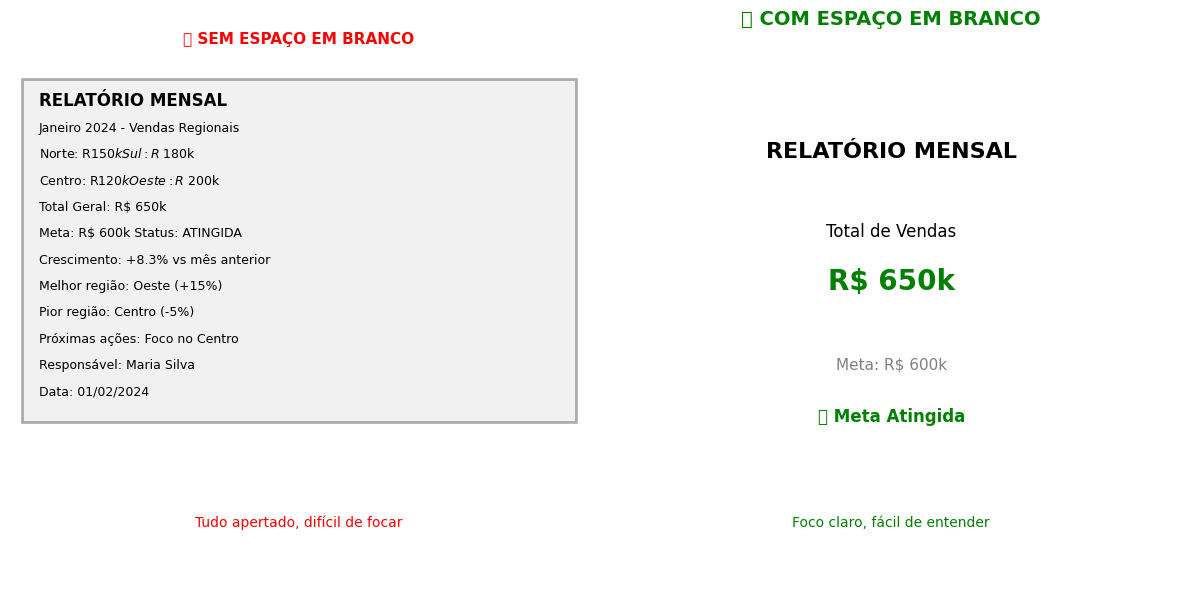

⬜ PODER DO ESPAÇO EM BRANCO:
   ❌ Sem espaço: Informação competing, fadiga mental
   ✅ Com espaço: Hierarquia clara, foco no essencial
   💡 Espaço em branco dirige a atenção!


In [ ]:
# BLOCO 2: Demonstrando espaço em branco de forma mais clara

print("\n⬜ ESPAÇO EM BRANCO - O PODER DA RESPIRAÇÃO")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# GRÁFICO 1: TUDO APERTADO E CHEIO
ax1.axis('off')
ax1.set_title('❌ SEM ESPAÇO EM BRANCO', fontweight='bold', fontsize=11, color='red')

# Preenchendo tudo sem respiração
ax1.text(0.05, 0.9, 'RELATÓRIO MENSAL', fontsize=12, fontweight='bold', transform=ax1.transAxes)
ax1.text(0.05, 0.85, 'Janeiro 2024 - Vendas Regionais', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.8, 'Norte: R$ 150k Sul: R$ 180k', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.75, 'Centro: R$ 120k Oeste: R$ 200k', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.7, 'Total Geral: R$ 650k', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.65, 'Meta: R$ 600k Status: ATINGIDA', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.6, 'Crescimento: +8.3% vs mês anterior', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.55, 'Melhor região: Oeste (+15%)', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.5, 'Pior região: Centro (-5%)', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.45, 'Próximas ações: Foco no Centro', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.4, 'Responsável: Maria Silva', fontsize=9, transform=ax1.transAxes)
ax1.text(0.05, 0.35, 'Data: 01/02/2024', fontsize=9, transform=ax1.transAxes)

# Adicionando bordas e elementos que ocupam espaço
from matplotlib.patches import Rectangle
rect = Rectangle((0.02, 0.3), 0.96, 0.65, linewidth=2, edgecolor='black',
                facecolor='lightgray', alpha=0.3, transform=ax1.transAxes)
ax1.add_patch(rect)

ax1.text(0.5, 0.1, 'Tudo apertado, difícil de focar', ha='center',
         color='red', fontsize=10, transform=ax1.transAxes)

# GRÁFICO 2: COM ESPAÇO ESTRATÉGICO
ax2.axis('off')
ax2.set_title('✅ COM ESPAÇO EM BRANCO', fontweight='bold', fontsize=14, color='green', pad=20)

# Usando espaço generosamente
ax2.text(0.5, 0.8, 'RELATÓRIO MENSAL', fontsize=16, fontweight='bold',
         ha='center', transform=ax2.transAxes)

ax2.text(0.5, 0.65, 'Total de Vendas', fontsize=12, ha='center', transform=ax2.transAxes)
ax2.text(0.5, 0.55, 'R$ 650k', fontsize=20, fontweight='bold',
         ha='center', color='green', transform=ax2.transAxes)

ax2.text(0.5, 0.4, 'Meta: R$ 600k', fontsize=11, ha='center',
         color='gray', transform=ax2.transAxes)
ax2.text(0.5, 0.3, '✅ Meta Atingida', fontsize=12, fontweight='bold',
         ha='center', color='green', transform=ax2.transAxes)

ax2.text(0.5, 0.1, 'Foco claro, fácil de entender', ha='center',
         color='green', fontsize=10, transform=ax2.transAxes)

plt.tight_layout()
plt.show()

print("⬜ PODER DO ESPAÇO EM BRANCO:")
print("   ❌ Sem espaço: Informação competing, fadiga mental")
print("   ✅ Com espaço: Hierarquia clara, foco no essencial")
print("   💡 Espaço em branco dirige a atenção!")


🎯 CONTRASTE ESTRATÉGICO - GUIANDO O OLHAR


/tmp/ipython-input-1184704409.py:42: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1184704409.py:42: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1184704409.py:42: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


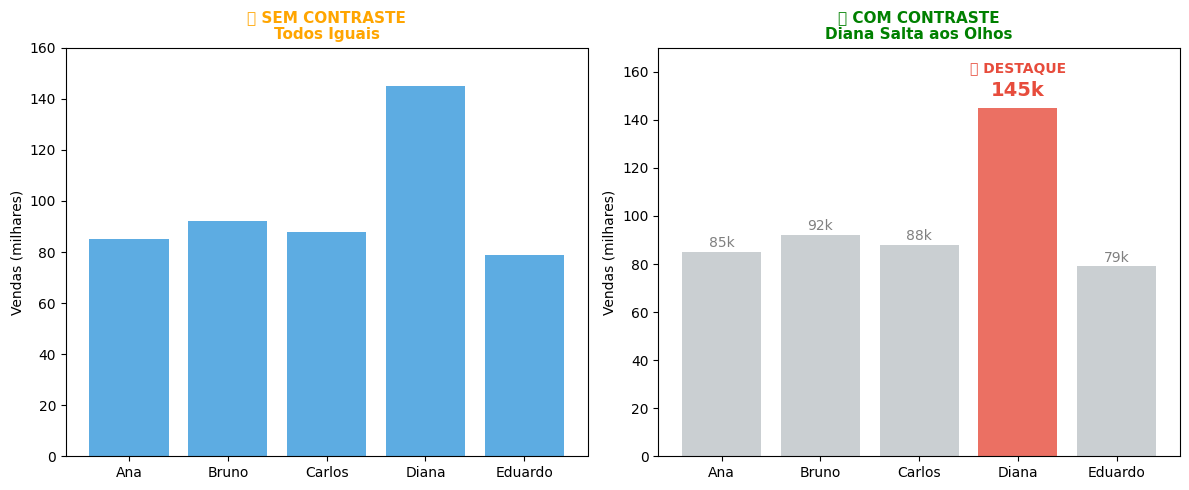

🎯 RESULTADO DO CONTRASTE:
   ❌ Sem contraste: Diana se perde no grupo
   ✅ Com contraste: Diana é vista instantaneamente
   📊 Diana vendeu 67% mais que a média do time!


In [ ]:
# BLOCO 3: Contraste estratégico mais visual

print("\n🎯 CONTRASTE ESTRATÉGICO - GUIANDO O OLHAR")
print("=" * 50)

# Dados simples
vendas_equipe = [85, 92, 88, 145, 79]  # Um destaque claro
nomes = ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# GRÁFICO 1: TUDO IGUAL (SEM CONTRASTE)
bars1 = ax1.bar(nomes, vendas_equipe, color='#3498DB', alpha=0.8)
ax1.set_title('❌ SEM CONTRASTE\nTodos Iguais', fontweight='bold', fontsize=11, color='orange')
ax1.set_ylabel('Vendas (milhares)')
ax1.set_ylim(0, 160)

# GRÁFICO 2: COM CONTRASTE ESTRATÉGICO
# Diana se destaca completamente
cores_contraste = ['#BDC3C7', '#BDC3C7', '#BDC3C7', '#E74C3C', '#BDC3C7']
bars2 = ax2.bar(nomes, vendas_equipe, color=cores_contraste, alpha=0.8)

# Diana recebe tratamento especial
for i, (bar, valor, nome) in enumerate(zip(bars2, vendas_equipe, nomes)):
    height = bar.get_height()
    if nome == 'Diana':  # A excepcional
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{valor}k', ha='center', fontsize=14,
                 fontweight='bold', color='#E74C3C')
        ax2.text(bar.get_x() + bar.get_width()/2., height + 15,
                 '🏆 DESTAQUE', ha='center', fontsize=10,
                 fontweight='bold', color='#E74C3C')
    else:
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{valor}k', ha='center', fontsize=10, color='gray')

ax2.set_title('✅ COM CONTRASTE\nDiana Salta aos Olhos',
              fontweight='bold', fontsize=11, color='green')
ax2.set_ylabel('Vendas (milhares)')
ax2.set_ylim(0, 170)

plt.tight_layout()
plt.show()

print("🎯 RESULTADO DO CONTRASTE:")
print("   ❌ Sem contraste: Diana se perde no grupo")
print("   ✅ Com contraste: Diana é vista instantaneamente")
print("   📊 Diana vendeu 67% mais que a média do time!")


🎨 APLICAÇÃO INTEGRADA - ORDEM VISUAL COMPLETA
Cenário: Dashboard executivo aplicando todos os princípios


/tmp/ipython-input-594952675.py:90: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


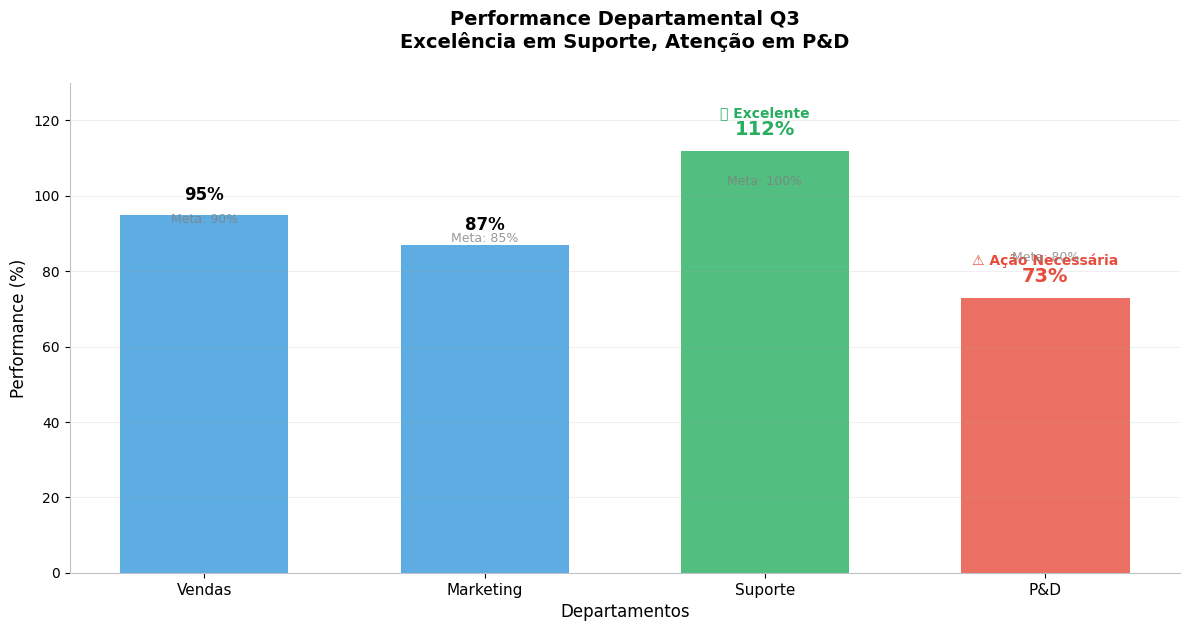

🎨 PRINCÍPIOS APLICADOS COM MAESTRIA:
   📐 ALINHAMENTO: Todos os elementos consistentemente posicionados
   ⬜ ESPAÇO EM BRANCO: Respiração visual, hierarquia clara
   🎯 CONTRASTE ESTRATÉGICO: Suporte e P&D destacados apropriadamente
   ✨ RESULTADO: Insights imediatos sem esforço cognitivo

📊 INSIGHTS DESTACADOS PELO DESIGN:
   🏆 Suporte: 112% (excepcional!)
   ⚠️ P&D: 73% (precisa atenção)
   📈 Departamentos acima da meta: 3 de 4


In [ ]:
# BLOCO 4: Exemplo integrando alinhamento + espaço + contraste

print("\n🎨 APLICAÇÃO INTEGRADA - ORDEM VISUAL COMPLETA")
print("=" * 55)
print("Cenário: Dashboard executivo aplicando todos os princípios")

# Dados executivos
categorias = ['Vendas', 'Marketing', 'Suporte', 'P&D']
performance = [95, 87, 112, 73]  # Suporte excepcional, P&D precisa atenção
benchmark = [90, 85, 100, 80]

# Identificando elementos para contraste
melhor_idx = np.argmax(performance)
pior_idx = np.argmin(performance)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# ALINHAMENTO: Tudo consistentemente posicionado
x_pos = np.arange(len(categorias))

# CONTRASTE ESTRATÉGICO: Cores diferentes para diferentes performances
cores = []
for i, (perf, bench) in enumerate(zip(performance, benchmark)):
    if i == melhor_idx:
        cores.append('#27AE60')  # Verde para excepcional
    elif i == pior_idx:
        cores.append('#E74C3C')  # Vermelho para problema
    elif perf >= bench:
        cores.append('#3498DB')  # Azul para bom
    else:
        cores.append('#F39C12')  # Laranja para atenção

bars = ax.bar(x_pos, performance, color=cores, alpha=0.8, width=0.6)

# ESPAÇO EM BRANCO: Margens generosas e elementos bem espaçados
ax.set_ylim(0, 130)  # Espaço extra no topo

# ALINHAMENTO: Todos os textos consistentemente alinhados
for i, (bar, valor, bench) in enumerate(zip(bars, performance, benchmark)):
    height = bar.get_height()

    # Valores principais - sempre centralizados
    if i == melhor_idx:
        # CONTRASTE: Destaque especial para o melhor
        ax.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{valor}%', ha='center', va='bottom',
                fontweight='bold', fontsize=14, color='#27AE60')
        ax.text(bar.get_x() + bar.get_width()/2., height + 8,
                '🏆 Excelente', ha='center', va='bottom',
                fontweight='bold', fontsize=10, color='#27AE60')
    elif i == pior_idx:
        # CONTRASTE: Atenção especial para problema
        ax.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{valor}%', ha='center', va='bottom',
                fontweight='bold', fontsize=14, color='#E74C3C')
        ax.text(bar.get_x() + bar.get_width()/2., height + 8,
                '⚠️ Ação Necessária', ha='center', va='bottom',
                fontweight='bold', fontsize=10, color='#E74C3C')
    else:
        # Outros mantêm formatação padrão
        ax.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{valor}%', ha='center', va='bottom',
                fontweight='bold', fontsize=12)

    # Benchmark sempre na mesma posição relativa
    ax.text(bar.get_x() + bar.get_width()/2., bench + 2,
            f'Meta: {bench}%', ha='center', va='bottom',
            fontsize=9, color='gray', alpha=0.8)

# Design limpo com muito ESPAÇO EM BRANCO
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#BDC3C7')
ax.spines['bottom'].set_color('#BDC3C7')

# ALINHAMENTO perfeito nos títulos e labels
ax.set_title('Performance Departamental Q3\nExcelência em Suporte, Atenção em P&D',
             fontweight='bold', fontsize=14, pad=25)  # ESPAÇO generoso
ax.set_xlabel('Departamentos', fontsize=12)
ax.set_ylabel('Performance (%)', fontsize=12)

# ALINHAMENTO: Labels centralizados
ax.set_xticks(x_pos)
ax.set_xticklabels(categorias, fontsize=11)

# Grid sutil para não competir
ax.grid(True, alpha=0.2, axis='y')

# ESPAÇO EM BRANCO: Layout com respiração
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)  # Margens generosas
plt.show()

print("🎨 PRINCÍPIOS APLICADOS COM MAESTRIA:")
print(f"   📐 ALINHAMENTO: Todos os elementos consistentemente posicionados")
print(f"   ⬜ ESPAÇO EM BRANCO: Respiração visual, hierarquia clara")
print(f"   🎯 CONTRASTE ESTRATÉGICO: Suporte e P&D destacados apropriadamente")
print(f"   ✨ RESULTADO: Insights imediatos sem esforço cognitivo")

print(f"\n📊 INSIGHTS DESTACADOS PELO DESIGN:")
print(f"   🏆 {categorias[melhor_idx]}: {performance[melhor_idx]}% (excepcional!)")
print(f"   ⚠️ {categorias[pior_idx]}: {performance[pior_idx]}% (precisa atenção)")
print(f"   📈 Departamentos acima da meta: {sum(1 for p, b in zip(performance, benchmark) if p >= b)} de {len(categorias)}")

# Atributos pré-atentivos

👁️ ATRIBUTOS PRÉ-ATENTIVOS - PROCESSAMENTO AUTOMÁTICO
Demonstração: Como diferentes elementos chamam atenção instantaneamente


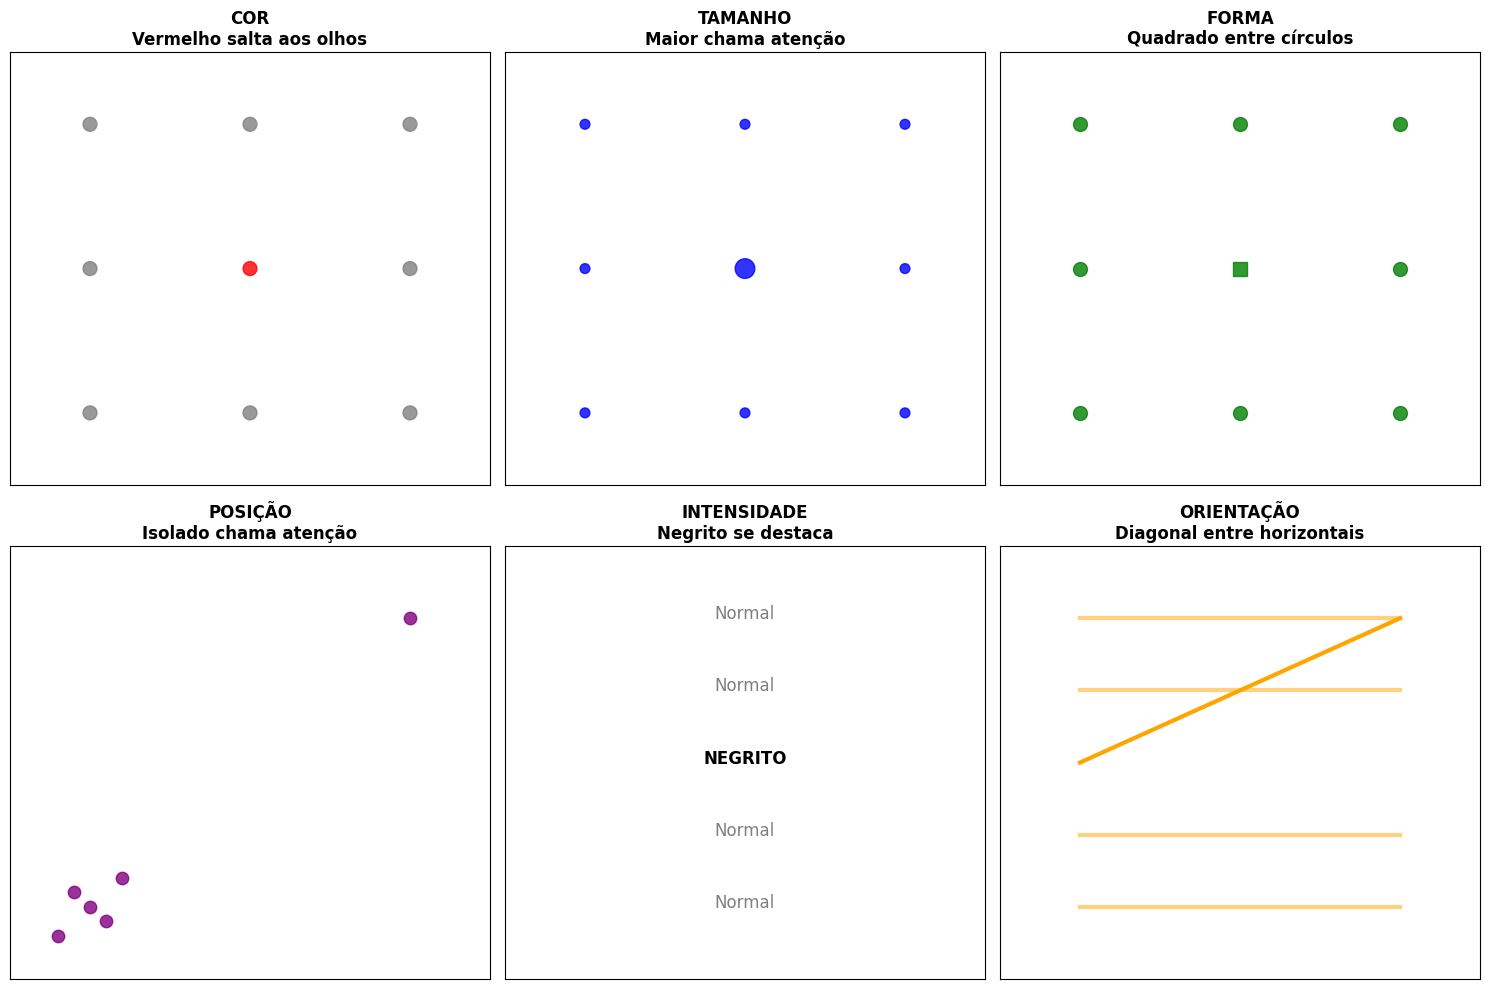

👁️ TESTE RÁPIDO:
   Qual elemento chamou sua atenção primeiro em cada exemplo?
   • Ponto vermelho? Círculo grande? Quadrado? Ponto isolado?
   • Texto em negrito? Linha diagonal?

💡 ISSO É PROCESSAMENTO PRÉ-ATENTIVO EM AÇÃO!
   Seu cérebro identificou as diferenças instantaneamente,
   sem esforço consciente. Isso acontece em < 250ms!


In [ ]:
# BLOCO 1: Demonstrando os diferentes atributos pré-atentivos

import matplotlib.pyplot as plt
import numpy as np

print("👁️ ATRIBUTOS PRÉ-ATENTIVOS - PROCESSAMENTO AUTOMÁTICO")
print("=" * 65)
print("Demonstração: Como diferentes elementos chamam atenção instantaneamente")

# Configurando grade para mostrar diferentes atributos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# EXEMPLO 1: COR como atributo pré-atentivo
ax1 = axes[0,0]
# Criando pontos onde apenas um se destaca por cor
x_pontos = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pontos = [1, 1, 1, 2, 2, 2, 3, 3, 3]
cores = ['gray'] * 9
cores[4] = 'red'  # Apenas o ponto central em vermelho

ax1.scatter(x_pontos, y_pontos, c=cores, s=100, alpha=0.8)
ax1.set_title('COR\nVermelho salta aos olhos', fontweight='bold', fontsize=12)
ax1.set_xlim(0.5, 3.5)
ax1.set_ylim(0.5, 3.5)
ax1.set_xticks([])
ax1.set_yticks([])

# EXEMPLO 2: TAMANHO como atributo pré-atentivo
ax2 = axes[0,1]
tamanhos = [50] * 9
tamanhos[4] = 200  # Ponto central maior
ax2.scatter(x_pontos, y_pontos, c='blue', s=tamanhos, alpha=0.8)
ax2.set_title('TAMANHO\nMaior chama atenção', fontweight='bold', fontsize=12)
ax2.set_xlim(0.5, 3.5)
ax2.set_ylim(0.5, 3.5)
ax2.set_xticks([])
ax2.set_yticks([])

# EXEMPLO 3: FORMA como atributo pré-atentivo
ax3 = axes[0,2]
# Círculos e um quadrado
for i, (x, y) in enumerate(zip(x_pontos, y_pontos)):
    if i == 4:  # Ponto central como quadrado
        ax3.scatter(x, y, c='green', s=100, marker='s', alpha=0.8)
    else:
        ax3.scatter(x, y, c='green', s=100, marker='o', alpha=0.8)

ax3.set_title('FORMA\nQuadrado entre círculos', fontweight='bold', fontsize=12)
ax3.set_xlim(0.5, 3.5)
ax3.set_ylim(0.5, 3.5)
ax3.set_xticks([])
ax3.set_yticks([])

# EXEMPLO 4: POSIÇÃO como atributo pré-atentivo
ax4 = axes[1,0]
# Pontos agrupados e um isolado
ax4.scatter([1, 1.2, 0.8, 1.1, 0.9], [1, 1.2, 0.8, 0.9, 1.1], c='purple', s=80, alpha=0.8)
ax4.scatter([3], [3], c='purple', s=80, alpha=0.8)  # Ponto isolado
ax4.set_title('POSIÇÃO\nIsolado chama atenção', fontweight='bold', fontsize=12)
ax4.set_xlim(0.5, 3.5)
ax4.set_ylim(0.5, 3.5)
ax4.set_xticks([])
ax4.set_yticks([])

# EXEMPLO 5: INTENSIDADE como atributo pré-atentivo
ax5 = axes[1,1]
ax5.text(1.5, 2.5, 'Normal', ha='center', fontsize=12, alpha=0.5)
ax5.text(1.5, 2.0, 'Normal', ha='center', fontsize=12, alpha=0.5)
ax5.text(1.5, 1.5, 'NEGRITO', ha='center', fontsize=12, fontweight='bold')
ax5.text(1.5, 1.0, 'Normal', ha='center', fontsize=12, alpha=0.5)
ax5.text(1.5, 0.5, 'Normal', ha='center', fontsize=12, alpha=0.5)
ax5.set_title('INTENSIDADE\nNegrito se destaca', fontweight='bold', fontsize=12)
ax5.set_xlim(0.5, 2.5)
ax5.set_ylim(0, 3)
ax5.set_xticks([])
ax5.set_yticks([])

# EXEMPLO 6: ORIENTAÇÃO como atributo pré-atentivo
ax6 = axes[1,2]
# Linhas horizontais e uma diagonal
for i in range(5):
    if i == 2:  # Linha central diagonal
        ax6.plot([0.5, 2.5], [1.5, 2.5], 'orange', linewidth=3)
    else:
        y_pos = 0.5 + i * 0.5
        ax6.plot([0.5, 2.5], [y_pos, y_pos], 'orange', linewidth=3, alpha=0.5)

ax6.set_title('ORIENTAÇÃO\nDiagonal entre horizontais', fontweight='bold', fontsize=12)
ax6.set_xlim(0, 3)
ax6.set_ylim(0, 3)
ax6.set_xticks([])
ax6.set_yticks([])

plt.tight_layout()
plt.show()

print("👁️ TESTE RÁPIDO:")
print("   Qual elemento chamou sua atenção primeiro em cada exemplo?")
print("   • Ponto vermelho? Círculo grande? Quadrado? Ponto isolado?")
print("   • Texto em negrito? Linha diagonal?")
print("\n💡 ISSO É PROCESSAMENTO PRÉ-ATENTIVO EM AÇÃO!")
print("   Seu cérebro identificou as diferenças instantaneamente,")
print("   sem esforço consciente. Isso acontece em < 250ms!")


🎨 USO ESTRATÉGICO DA COR - MODERAÇÃO E PROPÓSITO
Cenário: Dashboard de vendas - cores estratégicas vs 'arco-íris'


/tmp/ipython-input-2551120363.py:78: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2551120363.py:78: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


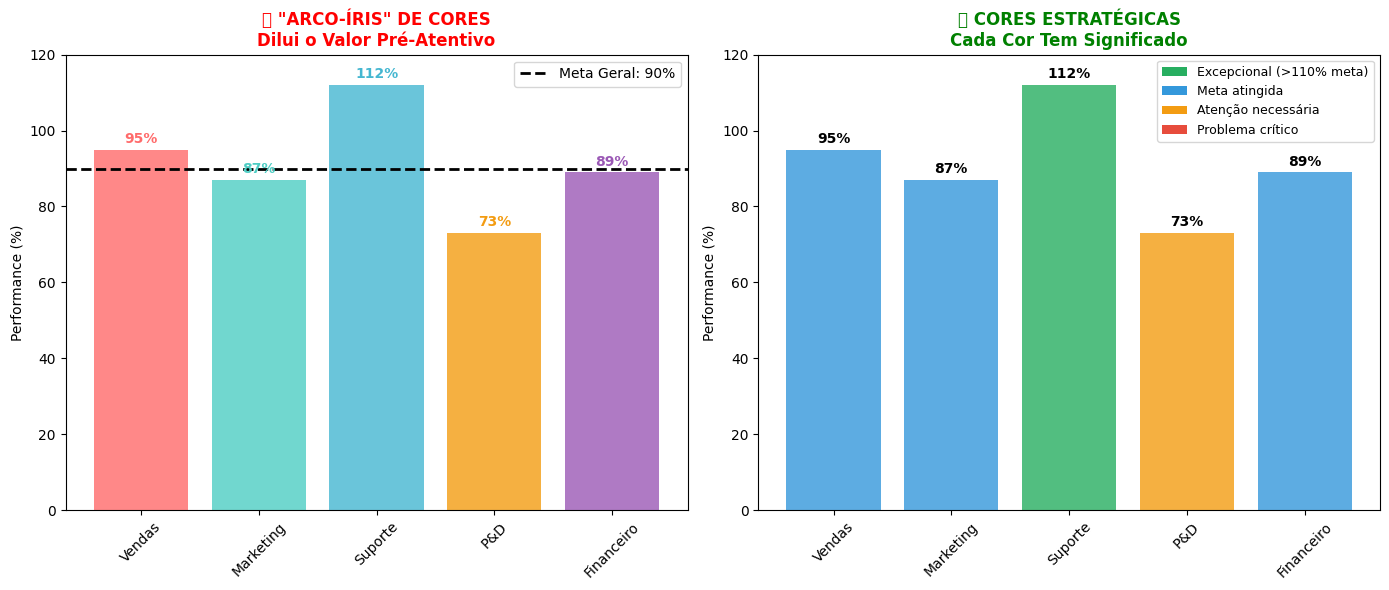

🎨 DIFERENÇA DO USO ESTRATÉGICO:
   ❌ 'Arco-íris': Cores competem, nenhuma se destaca
   ✅ Estratégico: Cada cor comunica status específico
   💡 Resultado: Insights instantâneos por cor!

📊 INSIGHTS IMEDIATOS PELAS CORES:
   • Vendas: 95% 🔵 META ATINGIDA
   • Marketing: 87% 🔵 META ATINGIDA
   • Suporte: 112% 🟢 EXCEPCIONAL
   • P&D: 73% 🟠 ATENÇÃO NECESSÁRIA
   • Financeiro: 89% 🔵 META ATINGIDA


In [ ]:
# BLOCO 2: Demonstrando uso estratégico vs problemático da cor

print("\n🎨 USO ESTRATÉGICO DA COR - MODERAÇÃO E PROPÓSITO")
print("=" * 60)
print("Cenário: Dashboard de vendas - cores estratégicas vs 'arco-íris'")

# Dados para demonstração
departamentos = ['Vendas', 'Marketing', 'Suporte', 'P&D', 'Financeiro']
performance = [95, 87, 112, 73, 89]
metas = [90, 85, 100, 80, 85]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: USO PROBLEMÁTICO - "ARCO-ÍRIS"
cores_arco_iris = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F39C12', '#9B59B6']
bars1 = ax1.bar(departamentos, performance, color=cores_arco_iris, alpha=0.8)

ax1.set_title('❌ "ARCO-ÍRIS" DE CORES\nDilui o Valor Pré-Atentivo',
              fontweight='bold', fontsize=12, color='red')
ax1.set_ylabel('Performance (%)')
ax1.set_ylim(0, 120)
ax1.tick_params(axis='x', rotation=45)

# Adicionando linha de meta com mais uma cor
ax1.axhline(y=90, color='black', linestyle='--', linewidth=2, label='Meta Geral: 90%')
ax1.legend()

# Valores com cores diferentes (mais confusão)
for bar, valor, cor in zip(bars1, performance, cores_arco_iris):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{valor}%', ha='center', va='bottom',
             fontsize=10, fontweight='bold', color=cor)

# GRÁFICO 2: USO ESTRATÉGICO - SIGNIFICADO NAS CORES
# Sistema de cores com propósito:
# Verde: Acima da meta
# Vermelho: Abaixo da meta (crítico)
# Azul: Próximo à meta
# Cinza: Meta atingida exatamente

cores_estrategicas = []
for perf, meta in zip(performance, metas):
    if perf >= meta * 1.1:  # 10% acima da meta
        cores_estrategicas.append('#27AE60')  # Verde: Excepcional
    elif perf < meta * 0.9:  # 10% abaixo da meta
        cores_estrategicas.append('#E74C3C')  # Vermelho: Problema
    elif perf >= meta:
        cores_estrategicas.append('#3498DB')  # Azul: Atingiu meta
    else:
        cores_estrategicas.append('#F39C12')  # Laranja: Atenção

bars2 = ax2.bar(departamentos, performance, color=cores_estrategicas, alpha=0.8)

ax2.set_title('✅ CORES ESTRATÉGICAS\nCada Cor Tem Significado',
              fontweight='bold', fontsize=12, color='green')
ax2.set_ylabel('Performance (%)')
ax2.set_ylim(0, 120)
ax2.tick_params(axis='x', rotation=45)

# Valores em cor neutra para não competir
for bar, valor in zip(bars2, performance):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{valor}%', ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')

# Legenda estratégica
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#27AE60', label='Excepcional (>110% meta)'),
    Patch(facecolor='#3498DB', label='Meta atingida'),
    Patch(facecolor='#F39C12', label='Atenção necessária'),
    Patch(facecolor='#E74C3C', label='Problema crítico')
]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

print("🎨 DIFERENÇA DO USO ESTRATÉGICO:")
print("   ❌ 'Arco-íris': Cores competem, nenhuma se destaca")
print("   ✅ Estratégico: Cada cor comunica status específico")
print("   💡 Resultado: Insights instantâneos por cor!")

# Demonstrando os insights que as cores revelam
print(f"\n📊 INSIGHTS IMEDIATOS PELAS CORES:")
for i, (depto, perf, meta) in enumerate(zip(departamentos, performance, metas)):
    if perf >= meta * 1.1:
        status = "🟢 EXCEPCIONAL"
    elif perf < meta * 0.9:
        status = "🔴 PROBLEMA CRÍTICO"
    elif perf >= meta:
        status = "🔵 META ATINGIDA"
    else:
        status = "🟠 ATENÇÃO NECESSÁRIA"

    print(f"   • {depto}: {perf}% {status}")


🎯 APLICAÇÃO INTEGRADA - MÚLTIPLOS ATRIBUTOS PRÉ-ATENTIVOS
Cenário: Relatório de vendas usando cor + tamanho + posição estrategicamente


/tmp/ipython-input-3469465044.py:72: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469465044.py:72: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469465044.py:72: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469465044.py:72: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469465044.py:72: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CI

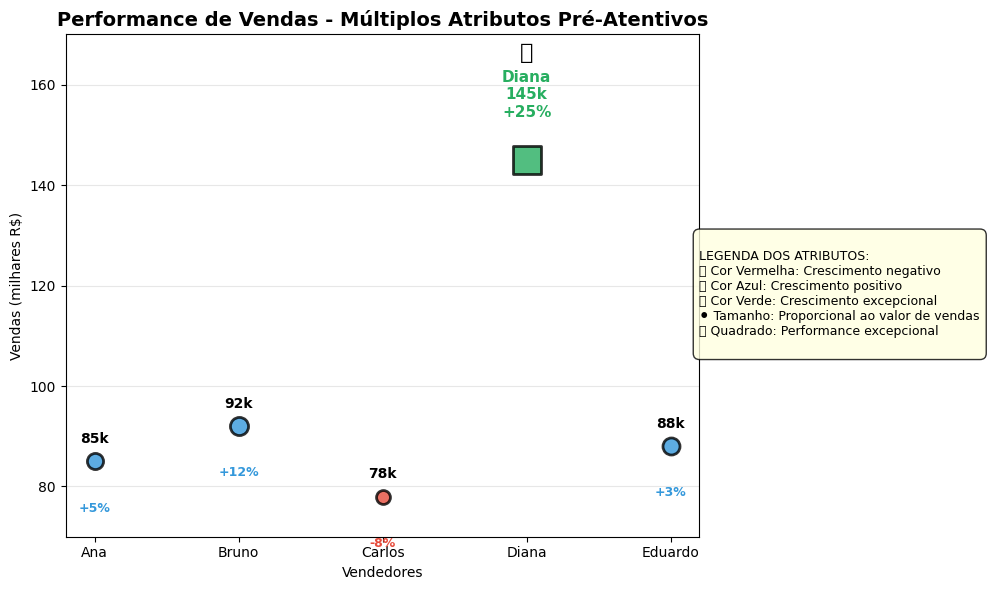

🎯 ATRIBUTOS PRÉ-ATENTIVOS APLICADOS:
   🎨 COR: Verde/azul/vermelho para crescimento
   📏 TAMANHO: Maior ponto = mais vendas
   🔶 FORMA: Quadrado destaca performance excepcional
   📍 POSIÇÃO: Diana isolada no topo com tratamento especial

✨ RESULTADO: Diana salta aos olhos instantaneamente!
   Cérebro processa automaticamente: 'Diana é excepcional'
   Sem precisar ler números ou fazer cálculos!


In [ ]:
# BLOCO 3: Exemplo integrado - Usando múltiplos atributos estrategicamente

print("\n🎯 APLICAÇÃO INTEGRADA - MÚLTIPLOS ATRIBUTOS PRÉ-ATENTIVOS")
print("=" * 70)
print("Cenário: Relatório de vendas usando cor + tamanho + posição estrategicamente")

# Dados de vendedores
vendedores = ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo']
vendas_valor = [85, 92, 78, 145, 88]  # Diana excepcional
crescimento = [5, 12, -8, 25, 3]      # Carlos com problema

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Usando MÚLTIPLOS atributos pré-atentivos estrategicamente
for i, (vendedor, vendas, cresc) in enumerate(zip(vendedores, vendas_valor, crescimento)):

    # COR baseada no crescimento
    if cresc >= 15:
        cor = '#27AE60'  # Verde: Crescimento excepcional
    elif cresc >= 0:
        cor = '#3498DB'  # Azul: Crescimento positivo
    else:
        cor = '#E74C3C'  # Vermelho: Crescimento negativo

    # TAMANHO baseado no valor de vendas (quanto maior, maior o ponto)
    tamanho = 100 + (vendas - min(vendas_valor)) * 5

    # FORMA diferente para destaque especial
    if vendas >= 140:  # Performance excepcional
        marker = 's'  # Quadrado para destaque
    else:
        marker = 'o'  # Círculo padrão

    # Plotando com todos os atributos
    ax.scatter(i, vendas, c=cor, s=tamanho, marker=marker,
               alpha=0.8, edgecolors='black', linewidth=2)

    # POSIÇÃO do texto estratégica
    if vendas >= 140:  # Excepcional recebe destaque especial
        ax.text(i, vendas + 8, f'{vendedor}\n{vendas}k\n+{cresc}%',
               ha='center', va='bottom', fontsize=11, fontweight='bold', color=cor)
        ax.text(i, vendas + 20, '🏆', ha='center', fontsize=16)
    else:
        ax.text(i, vendas + 3, f'{vendas}k', ha='center', va='bottom',
               fontsize=10, fontweight='bold')
        ax.text(i, vendas - 8, f'{cresc:+}%', ha='center', va='top',
               fontsize=9, color=cor, fontweight='bold')

# Configuração do gráfico
ax.set_title('Performance de Vendas - Múltiplos Atributos Pré-Atentivos',
             fontweight='bold', fontsize=14)
ax.set_xlabel('Vendedores')
ax.set_ylabel('Vendas (milhares R$)')
ax.set_xticks(range(len(vendedores)))
ax.set_xticklabels(vendedores)
ax.set_ylim(70, 170)
ax.grid(True, alpha=0.3, axis='y')

# Legenda explicativa
legend_text = """
LEGENDA DOS ATRIBUTOS:
🔴 Cor Vermelha: Crescimento negativo
🔵 Cor Azul: Crescimento positivo
🟢 Cor Verde: Crescimento excepcional
⚫ Tamanho: Proporcional ao valor de vendas
🟦 Quadrado: Performance excepcional
"""

ax.text(4.2, 130, legend_text, fontsize=9, va='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

print("🎯 ATRIBUTOS PRÉ-ATENTIVOS APLICADOS:")
print("   🎨 COR: Verde/azul/vermelho para crescimento")
print("   📏 TAMANHO: Maior ponto = mais vendas")
print("   🔶 FORMA: Quadrado destaca performance excepcional")
print("   📍 POSIÇÃO: Diana isolada no topo com tratamento especial")
print("\n✨ RESULTADO: Diana salta aos olhos instantaneamente!")
print("   Cérebro processa automaticamente: 'Diana é excepcional'")
print("   Sem precisar ler números ou fazer cálculos!")



# Estética e acessibilidade

🎯 AFFORDANCES - DESIGN QUE COMUNICA INTERATIVIDADE
Exemplo: Elementos visuais que indicam como usar


/tmp/ipython-input-2595460733.py:67: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2595460733.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2595460733.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2595460733.py:67: UserWarning: Glyph 128229 (\N{INBOX TRAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2595460733.py:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY C

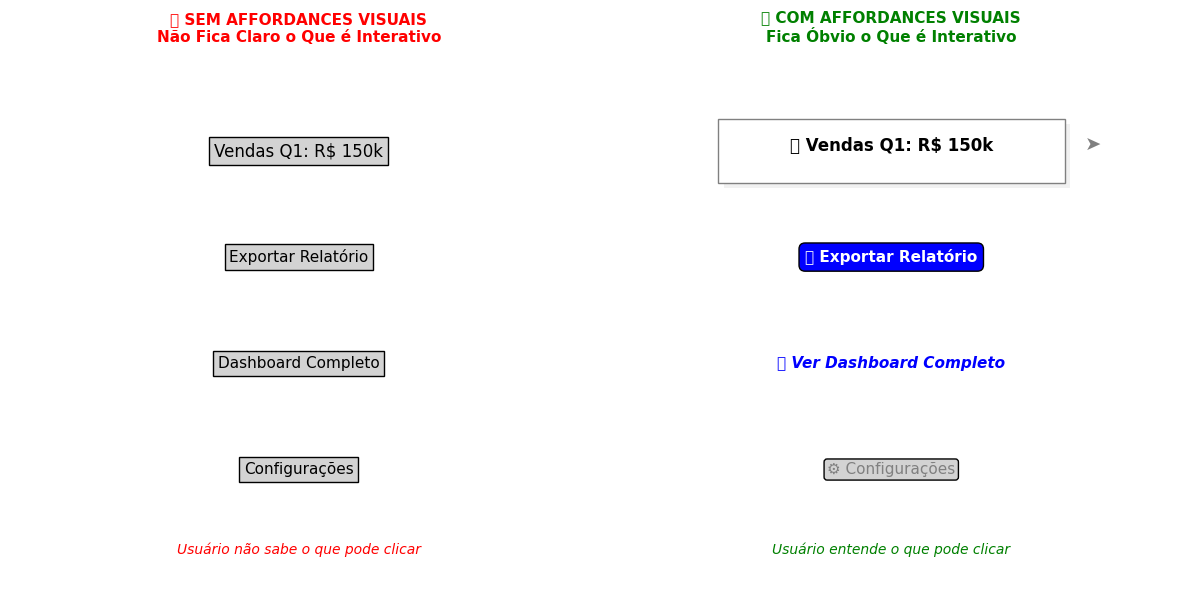

🎯 AFFORDANCES VISUAIS IDENTIFICADAS:
   📱 Card com sombra: Sugere que é clicável/tocável
   🔘 Botão colorido: Claramente indica ação principal
   🔗 Texto azul sublinhado: Convenção universal de link
   ⚙️ Ícone reconhecível: Comunicação visual direta

💡 PRINCÍPIO DAS AFFORDANCES:
   Design visual comunica função SEM precisar de instruções
   Usuário sabe instintivamente como interagir


In [ ]:
# BLOCO 1: Affordances - Elementos que comunicam interatividade

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

print("🎯 AFFORDANCES - DESIGN QUE COMUNICA INTERATIVIDADE")
print("=" * 60)
print("Exemplo: Elementos visuais que indicam como usar")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# GRÁFICO 1: SEM AFFORDANCES - Não fica claro o que é interativo
ax1.set_title('❌ SEM AFFORDANCES VISUAIS\nNão Fica Claro o Que é Interativo',
              fontweight='bold', fontsize=11, color='red')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')

# Elementos planos, sem indicação de interatividade
ax1.text(5, 8, 'Vendas Q1: R$ 150k', ha='center', fontsize=12,
         bbox=dict(boxstyle="square,pad=0.3", facecolor="lightgray"))

ax1.text(5, 6, 'Exportar Relatório', ha='center', fontsize=11,
         bbox=dict(boxstyle="square,pad=0.3", facecolor="lightgray"))

ax1.text(5, 4, 'Dashboard Completo', ha='center', fontsize=11,
         bbox=dict(boxstyle="square,pad=0.3", facecolor="lightgray"))

ax1.text(5, 2, 'Configurações', ha='center', fontsize=11,
         bbox=dict(boxstyle="square,pad=0.3", facecolor="lightgray"))

ax1.text(5, 0.5, 'Usuário não sabe o que pode clicar', ha='center',
         fontsize=10, color='red', style='italic')

# GRÁFICO 2: COM AFFORDANCES - Fica óbvio o que é interativo
ax2.set_title('✅ COM AFFORDANCES VISUAIS\nFica Óbvio o Que é Interativo',
              fontweight='bold', fontsize=11, color='green')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')

# CARD com sombra (indica que é clicável)
card = Rectangle((2, 7.5), 6, 1.2, facecolor='white', edgecolor='gray',
                linewidth=1)
ax2.add_patch(card)
# Simulando sombra
shadow = Rectangle((2.1, 7.4), 6, 1.2, facecolor='lightgray', alpha=0.3, zorder=0)
ax2.add_patch(shadow)
ax2.text(5, 8.1, '📊 Vendas Q1: R$ 150k', ha='center', fontsize=12, fontweight='bold')
ax2.text(8.5, 8.1, '➤', ha='center', fontsize=14, color='gray')

# BOTÃO com aparência clicável
ax2.text(5, 6, '📥 Exportar Relatório', ha='center', fontsize=11, fontweight='bold',
         color='white', bbox=dict(boxstyle="round,pad=0.4", facecolor="blue"))

# LINK com aparência de link
ax2.text(5, 4, '📈 Ver Dashboard Completo', ha='center', fontsize=11,
         color='blue', style='italic', fontweight='bold')

# ÍCONE de configuração
ax2.text(5, 2, '⚙️ Configurações', ha='center', fontsize=11,
         color='gray', bbox=dict(boxstyle="round,pad=0.2", facecolor="lightgray"))

ax2.text(5, 0.5, 'Usuário entende o que pode clicar', ha='center',
         fontsize=10, color='green', style='italic')

plt.tight_layout()
plt.show()

print("🎯 AFFORDANCES VISUAIS IDENTIFICADAS:")
print("   📱 Card com sombra: Sugere que é clicável/tocável")
print("   🔘 Botão colorido: Claramente indica ação principal")
print("   🔗 Texto azul sublinhado: Convenção universal de link")
print("   ⚙️ Ícone reconhecível: Comunicação visual direta")
print("\n💡 PRINCÍPIO DAS AFFORDANCES:")
print("   Design visual comunica função SEM precisar de instruções")
print("   Usuário sabe instintivamente como interagir")


✨ SIMPLICIDADE - A SOFISTICAÇÃO SUPREMA
Exemplo: Relatório de performance - complexo vs simples


/tmp/ipython-input-1574734871.py:74: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


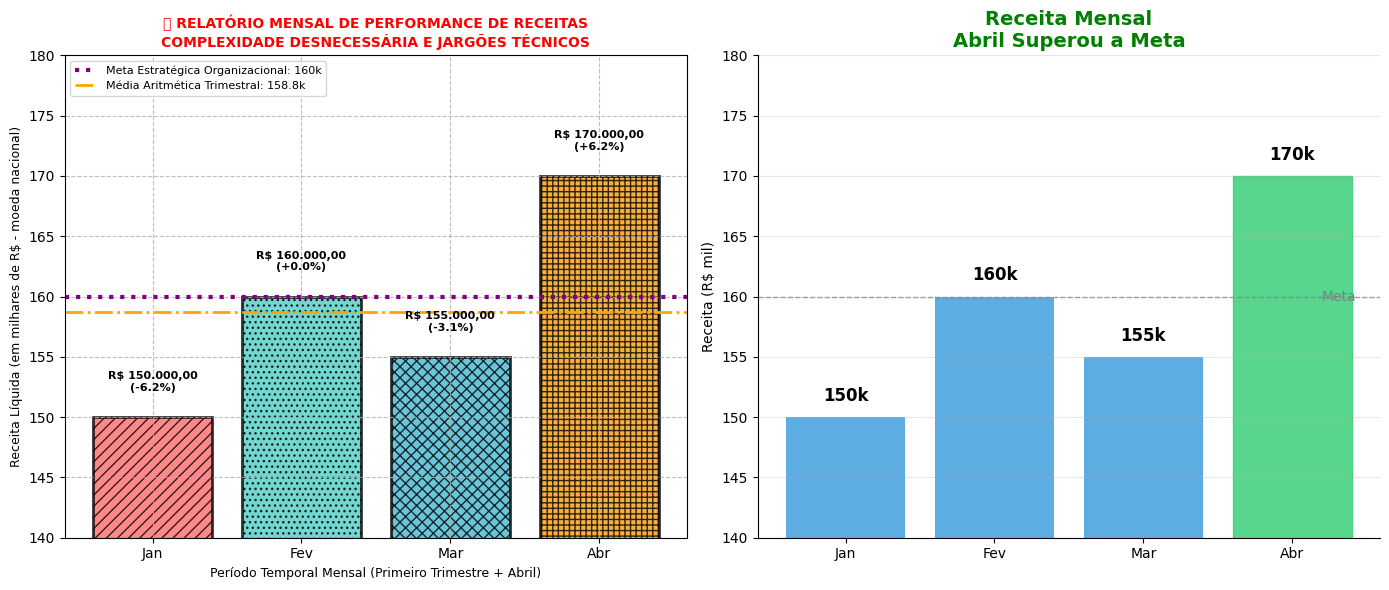

✨ PODER DA SIMPLICIDADE:
   ❌ Complexo: Muitos elementos competem pela atenção
   ✅ Simples: Foco claro na mensagem principal
   💡 Resultado: Abril superou meta - insight instantâneo!

🎯 ELEMENTOS DA SIMPLICIDADE APLICADOS:
   📝 Linguagem: 'Receita Mensal' vs 'Relatório de Performance...'
   🎨 Visual: Uma cor + destaque vs múltiplas cores
   📊 Dados: Valores essenciais vs excesso de informação
   🖼️ Layout: Limpo e respirado vs sobrecarregado


In [ ]:
# BLOCO 2: Demonstrando simplicidade vs complexidade desnecessária

print("\n✨ SIMPLICIDADE - A SOFISTICAÇÃO SUPREMA")
print("=" * 50)
print("Exemplo: Relatório de performance - complexo vs simples")

# Dados para demonstração
meses = ['Jan', 'Fev', 'Mar', 'Abr']
receita = [150, 160, 155, 170]
meta = 160

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: COMPLEXIDADE DESNECESSÁRIA
# Muitos elementos visuais competindo
bars1 = ax1.bar(meses, receita, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F39C12'],
                alpha=0.8, edgecolor='black', linewidth=2,
                hatch=['///', '...', 'xxx', '+++'])

# Excesso de informação textual
ax1.set_title('❌ RELATÓRIO MENSAL DE PERFORMANCE DE RECEITAS\nCOMPLEXIDADE DESNECESSÁRIA E JARGÕES TÉCNICOS',
              fontweight='bold', fontsize=10, color='red')
ax1.set_xlabel('Período Temporal Mensal (Primeiro Trimestre + Abril)', fontsize=9)
ax1.set_ylabel('Receita Líquida (em milhares de R$ - moeda nacional)', fontsize=9)

# Muitas linhas e anotações
ax1.axhline(y=meta, color='purple', linestyle=':', linewidth=3,
           label=f'Meta Estratégica Organizacional: {meta}k')
ax1.axhline(y=np.mean(receita), color='orange', linestyle='-.', linewidth=2,
           label=f'Média Aritmética Trimestral: {np.mean(receita):.1f}k')

# Excesso de valores e informações
for i, (bar, valor) in enumerate(zip(bars1, receita)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'R$ {valor}.000,00\n({((valor/meta)-1)*100:+.1f}%)',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

ax1.legend(fontsize=8, loc='upper left')
ax1.grid(True, alpha=0.8, linestyle='--')
ax1.set_ylim(140, 180)

# GRÁFICO 2: SIMPLICIDADE ELEGANTE
# Design limpo focado na mensagem
bars2 = ax2.bar(meses, receita, color='#3498DB', alpha=0.8)

# Destacando apenas o essencial
bars2[3].set_color('#2ECC71')  # Abril se destaca (melhor mês)

# Linha de meta sutil
ax2.axhline(y=meta, color='gray', linestyle='--', alpha=0.7, linewidth=1)
ax2.text(3.2, meta, 'Meta', va='center', fontsize=10, color='gray')

# Título simples e claro
ax2.set_title('Receita Mensal\nAbril Superou a Meta',
              fontweight='bold', fontsize=14, color='green')

# Labels mínimos mas suficientes
ax2.set_ylabel('Receita (R$ mil)')

# Apenas valores essenciais
for bar, valor in zip(bars2, receita):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{valor}k', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

# Design limpo
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(140, 180)

plt.tight_layout()
plt.show()

print("✨ PODER DA SIMPLICIDADE:")
print("   ❌ Complexo: Muitos elementos competem pela atenção")
print("   ✅ Simples: Foco claro na mensagem principal")
print("   💡 Resultado: Abril superou meta - insight instantâneo!")

print(f"\n🎯 ELEMENTOS DA SIMPLICIDADE APLICADOS:")
print("   📝 Linguagem: 'Receita Mensal' vs 'Relatório de Performance...'")
print("   🎨 Visual: Uma cor + destaque vs múltiplas cores")
print("   📊 Dados: Valores essenciais vs excesso de informação")
print("   🖼️ Layout: Limpo e respirado vs sobrecarregado")


📝 TEXTO ESTRATÉGICO - NARRATIVA QUE GUIA
Exemplo: Análise de satisfação - texto genérico vs estratégico


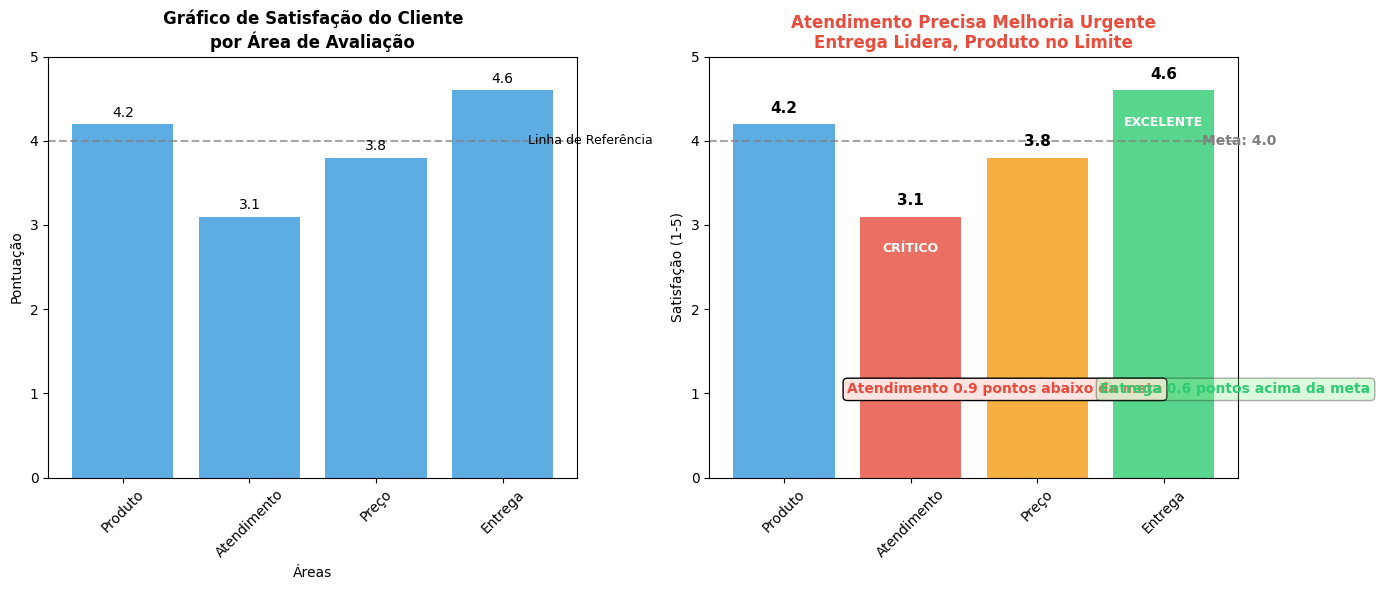

📝 PODER DO TEXTO ESTRATÉGICO:
   ❌ Genérico: 'Gráfico de Satisfação' (não comunica nada)
   ✅ Estratégico: 'Atendimento Precisa Melhoria Urgente' (acionável)
   💡 Resultado: Público sabe exatamente o que fazer!

🎯 ELEMENTOS DO TEXTO ESTRATÉGICO:
   📢 Título de ação: Comunica insight + urgência
   📊 Contexto quantificado: Gaps e lideranças específicos
   🎨 Integração visual: Texto como parte do design
   ⚡ Linguagem acionável: 'Precisa melhoria' vs 'pontuação'


In [ ]:
# BLOCO 3: Demonstrando texto estratégico vs texto genérico

print("\n📝 TEXTO ESTRATÉGICO - NARRATIVA QUE GUIA")
print("=" * 50)
print("Exemplo: Análise de satisfação - texto genérico vs estratégico")

# Dados para demonstração
areas = ['Produto', 'Atendimento', 'Preço', 'Entrega']
satisfacao = [4.2, 3.1, 3.8, 4.6]
benchmark = 4.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: TEXTO GENÉRICO E POUCO ÚTIL
bars1 = ax1.bar(areas, satisfacao, color='#3498DB', alpha=0.8)
ax1.axhline(y=benchmark, color='gray', linestyle='--', alpha=0.7)

# Título genérico que não comunica insight
ax1.set_title('Gráfico de Satisfação do Cliente\npor Área de Avaliação',
              fontweight='bold', fontsize=12)
ax1.set_ylabel('Pontuação')
ax1.set_xlabel('Áreas')

# Texto genérico que não adiciona valor
ax1.text(3.2, benchmark, 'Linha de Referência', va='center', fontsize=9)

# Valores sem contexto
for bar, valor in zip(bars1, satisfacao):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{valor}', ha='center', va='bottom', fontsize=10)

ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=45)

# GRÁFICO 2: TEXTO ESTRATÉGICO E ACIONÁVEL
# Cores estratégicas baseadas na performance
cores_estrategicas = []
for valor in satisfacao:
    if valor >= benchmark + 0.3:
        cores_estrategicas.append('#2ECC71')  # Verde: Excelente
    elif valor >= benchmark:
        cores_estrategicas.append('#3498DB')  # Azul: Bom
    elif valor >= benchmark - 0.5:
        cores_estrategicas.append('#F39C12')  # Laranja: Atenção
    else:
        cores_estrategicas.append('#E74C3C')  # Vermelho: Problema

bars2 = ax2.bar(areas, satisfacao, color=cores_estrategicas, alpha=0.8)
ax2.axhline(y=benchmark, color='gray', linestyle='--', alpha=0.7)

# TÍTULO DE AÇÃO que comunica o insight principal
ax2.set_title('Atendimento Precisa Melhoria Urgente\nEntrega Lidera, Produto no Limite',
              fontweight='bold', fontsize=12, color='#E74C3C')

# Labels que contextualizam
ax2.set_ylabel('Satisfação (1-5)')
ax2.text(3.3, benchmark, f'Meta: {benchmark}', va='center', fontsize=10,
         fontweight='bold', color='gray')

# Valores com contexto estratégico
for i, (bar, valor, area) in enumerate(zip(bars2, satisfacao, areas)):
    height = bar.get_height()

    # Valor principal
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{valor}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

    # Contexto estratégico baseado na performance
    if area == 'Atendimento' and valor < benchmark - 0.5:
        ax2.text(bar.get_x() + bar.get_width()/2., height - 0.3,
                 'CRÍTICO', ha='center', va='top',
                 fontsize=9, fontweight='bold', color='white')
    elif valor >= benchmark + 0.3:
        ax2.text(bar.get_x() + bar.get_width()/2., height - 0.3,
                 'EXCELENTE', ha='center', va='top',
                 fontsize=9, fontweight='bold', color='white')

# Insights quantificados
gap_atendimento = benchmark - satisfacao[1]
lideranca_entrega = satisfacao[3] - benchmark

ax2.text(0.5, 1, f'Atendimento {gap_atendimento:.1f} pontos abaixo da meta',
         fontsize=10, fontweight='bold', color='#E74C3C',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="mistyrose"))

ax2.text(2.5, 1, f'Entrega {lideranca_entrega:.1f} pontos acima da meta',
         fontsize=10, fontweight='bold', color='#2ECC71',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.3))

ax2.set_ylim(0, 5)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📝 PODER DO TEXTO ESTRATÉGICO:")
print("   ❌ Genérico: 'Gráfico de Satisfação' (não comunica nada)")
print("   ✅ Estratégico: 'Atendimento Precisa Melhoria Urgente' (acionável)")
print("   💡 Resultado: Público sabe exatamente o que fazer!")

print(f"\n🎯 ELEMENTOS DO TEXTO ESTRATÉGICO:")
print("   📢 Título de ação: Comunica insight + urgência")
print("   📊 Contexto quantificado: Gaps e lideranças específicos")
print("   🎨 Integração visual: Texto como parte do design")
print("   ⚡ Linguagem acionável: 'Precisa melhoria' vs 'pontuação'")

In [ ]:
# BLOCO 4: Checklist prático para acessibilidade e estética

print("\n✅ CHECKLIST PRÁTICO - ACESSIBILIDADE E ESTÉTICA")
print("=" * 60)

checklist_items = [
    ("🎯 AFFORDANCES", [
        "Elementos interativos parecem clicáveis?",
        "Funcionalidade corresponde à aparência?",
        "Navegação é intuitiva?",
        "Feedback visual adequado?"
    ]),

    ("✨ SIMPLICIDADE", [
        "Fontes legíveis (min 12pt)?",
        "Contraste adequado (4.5:1 mínimo)?",
        "Layout limpo sem decoração desnecessária?",
        "Linguagem acessível ao público-alvo?"
    ]),

    ("📝 TEXTO ESTRATÉGICO", [
        "Título comunica o insight principal?",
        "Legendas são claras e completas?",
        "Contexto suficiente fornecido?",
        "Linguagem acionável vs descritiva?"
    ]),

    ("🌈 ACESSIBILIDADE", [
        "Considerou daltonismo (8% dos homens)?",
        "Funciona sem cor (só forma/tamanho)?",
        "Texto legível em diferentes tamanhos?",
        "Compatível com leitores de tela?"
    ]),

    ("🎨 ESTÉTICA FUNCIONAL", [
        "Design inspira confiança?",
        "Hierarquia visual clara?",
        "Elementos alinhados consistentemente?",
        "Espaço em branco usado estrategicamente?"
    ])
]

for categoria, items in checklist_items:
    print(f"\n{categoria}:")
    for item in items:
        print(f"   ☐ {item}")

print("\n" + "=" * 60)
print("💡 LEMBRE-SE:")
print("• Design acessível é design melhor para TODOS")
print("• Estética funcional aumenta credibilidade")
print("• Simplicidade não é falta de sofisticação - é sofisticação suprema")
print("• Texto estratégico transforma dados em narrativa acionável")
print("\n🎯 OBJETIVO FINAL:")
print("Criar visualizações que não só informam, mas inspiram confiança")
print("e são acessíveis a todos os membros do seu público!")


✅ CHECKLIST PRÁTICO - ACESSIBILIDADE E ESTÉTICA

🎯 AFFORDANCES:
   ☐ Elementos interativos parecem clicáveis?
   ☐ Funcionalidade corresponde à aparência?
   ☐ Navegação é intuitiva?
   ☐ Feedback visual adequado?

✨ SIMPLICIDADE:
   ☐ Fontes legíveis (min 12pt)?
   ☐ Contraste adequado (4.5:1 mínimo)?
   ☐ Layout limpo sem decoração desnecessária?
   ☐ Linguagem acessível ao público-alvo?

📝 TEXTO ESTRATÉGICO:
   ☐ Título comunica o insight principal?
   ☐ Legendas são claras e completas?
   ☐ Contexto suficiente fornecido?
   ☐ Linguagem acionável vs descritiva?

🌈 ACESSIBILIDADE:
   ☐ Considerou daltonismo (8% dos homens)?
   ☐ Funciona sem cor (só forma/tamanho)?
   ☐ Texto legível em diferentes tamanhos?
   ☐ Compatível com leitores de tela?

🎨 ESTÉTICA FUNCIONAL:
   ☐ Design inspira confiança?
   ☐ Hierarquia visual clara?
   ☐ Elementos alinhados consistentemente?
   ☐ Espaço em branco usado estrategicamente?

💡 LEMBRE-SE:
• Design acessível é design melhor para TODOS
• Estétic

# Comunicaçao eficaz com dados

📖 STORYTELLING COM DADOS - TRANSFORMANDO NÚMEROS EM NARRATIVA
Cenário: Análise de churn de clientes - dados vs história


/tmp/ipython-input-2663704894.py:66: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2663704894.py:66: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2663704894.py:66: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

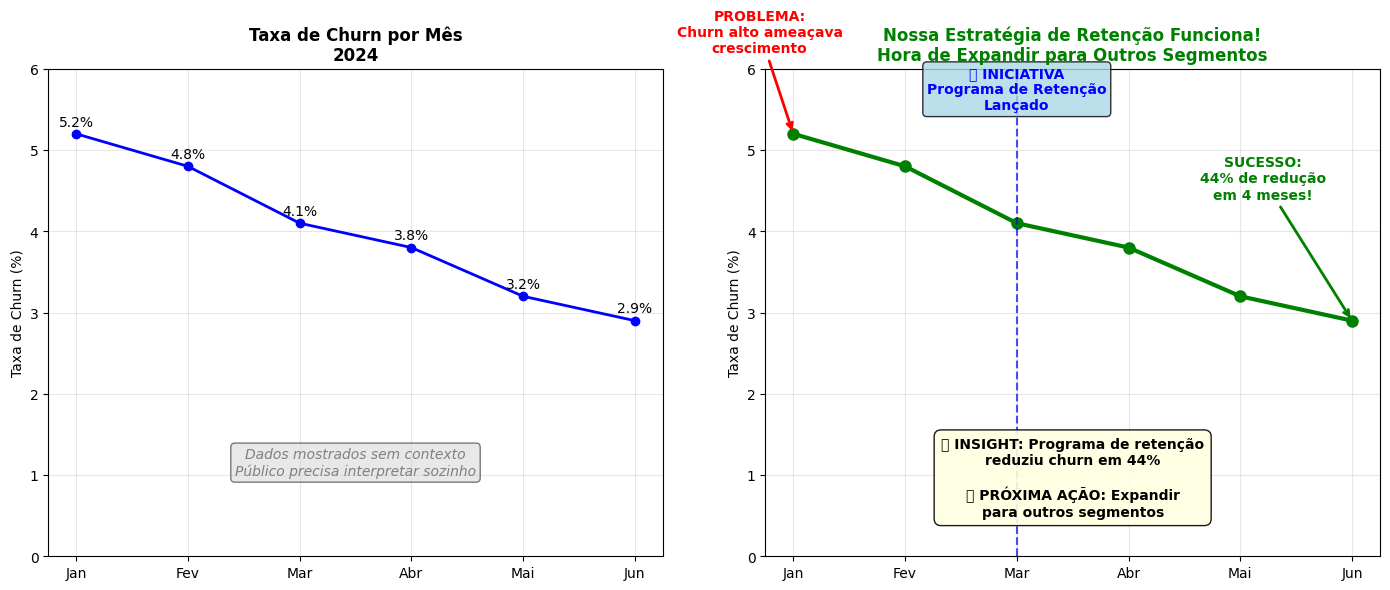

📖 DIFERENÇA ENTRE DADOS E HISTÓRIA:
   📊 Apenas dados: 'Churn caiu de 5.2% para 2.9%'
   📚 Com história: 'Nossa iniciativa salvou a situação e deve ser expandida'

🎯 ELEMENTOS DA HISTÓRIA IDENTIFICADOS:
   🎭 Protagonista: Programa de Retenção de Clientes
   ⚔️ Conflito: Churn alto ameaçando crescimento
   📈 Jornada: Implementação em março, resultados consistentes
   🏆 Resolução: Expansão para outros segmentos
   📋 Ação: Próximos passos claros e justificados


In [ ]:
# BLOCO 1: Demonstrando a diferença entre mostrar dados vs contar história

import matplotlib.pyplot as plt
import numpy as np

print("📖 STORYTELLING COM DADOS - TRANSFORMANDO NÚMEROS EM NARRATIVA")
print("=" * 70)
print("Cenário: Análise de churn de clientes - dados vs história")

# Dados para demonstração
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
churn_rate = [5.2, 4.8, 4.1, 3.8, 3.2, 2.9]
iniciativa_retencao = 2  # Março (índice 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: APENAS MOSTRANDO DADOS (SEM HISTÓRIA)
ax1.plot(meses, churn_rate, 'bo-', linewidth=2, markersize=6)
ax1.set_title('Taxa de Churn por Mês\n2024', fontweight='bold', fontsize=12)
ax1.set_ylabel('Taxa de Churn (%)')
ax1.set_ylim(0, 6)
ax1.grid(True, alpha=0.3)

# Apenas valores, sem contexto
for i, valor in enumerate(churn_rate):
    ax1.text(i, valor + 0.1, f'{valor}%', ha='center', fontsize=10)

ax1.text(2.5, 1, 'Dados mostrados sem contexto\nPúblico precisa interpretar sozinho',
         ha='center', fontsize=10, color='gray', style='italic',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

# GRÁFICO 2: CONTANDO UMA HISTÓRIA COM OS DADOS
ax2.plot(meses, churn_rate, 'go-', linewidth=3, markersize=8)

# Adicionando elementos narrativos
# 1. Estabelecendo o problema inicial
ax2.annotate('PROBLEMA:\nChurn alto ameaçava\ncrescimento',
             xy=(0, churn_rate[0]), xytext=(-0.3, churn_rate[0] + 1),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold', color='red', ha='center')

# 2. Ponto de inflexão (início da solução)
ax2.axvline(x=iniciativa_retencao, color='blue', linestyle='--', alpha=0.7)
ax2.text(iniciativa_retencao, 5.5, '⭐ INICIATIVA\nPrograma de Retenção\nLançado',
         ha='center', fontsize=10, fontweight='bold', color='blue',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# 3. Resultado positivo
ax2.annotate('SUCESSO:\n44% de redução\nem 4 meses!',
             xy=(5, churn_rate[5]), xytext=(4.2, churn_rate[5] + 1.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, fontweight='bold', color='green', ha='center')

# 4. Contextualizando a melhoria
reducao_percentual = ((churn_rate[0] - churn_rate[-1]) / churn_rate[0]) * 100
ax2.text(2.5, 0.5, f'💡 INSIGHT: Programa de retenção\nreduziu churn em {reducao_percentual:.0f}%\n\n🎯 PRÓXIMA AÇÃO: Expandir\npara outros segmentos',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9))

ax2.set_title('Nossa Estratégia de Retenção Funciona!\nHora de Expandir para Outros Segmentos',
              fontweight='bold', fontsize=12, color='green')
ax2.set_ylabel('Taxa de Churn (%)')
ax2.set_ylim(0, 6)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📖 DIFERENÇA ENTRE DADOS E HISTÓRIA:")
print("   📊 Apenas dados: 'Churn caiu de 5.2% para 2.9%'")
print("   📚 Com história: 'Nossa iniciativa salvou a situação e deve ser expandida'")
print("\n🎯 ELEMENTOS DA HISTÓRIA IDENTIFICADOS:")
print("   🎭 Protagonista: Programa de Retenção de Clientes")
print("   ⚔️ Conflito: Churn alto ameaçando crescimento")
print("   📈 Jornada: Implementação em março, resultados consistentes")
print("   🏆 Resolução: Expansão para outros segmentos")
print("   📋 Ação: Próximos passos claros e justificados")


🎯 ENTENDENDO O CONTEXTO - MESMOS DADOS, NARRATIVAS DIFERENTES
Cenário: Queda nas vendas online - como contexto muda a história


/tmp/ipython-input-857494868.py:62: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-857494868.py:62: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-857494868.py:62: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-857494868.py:62: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

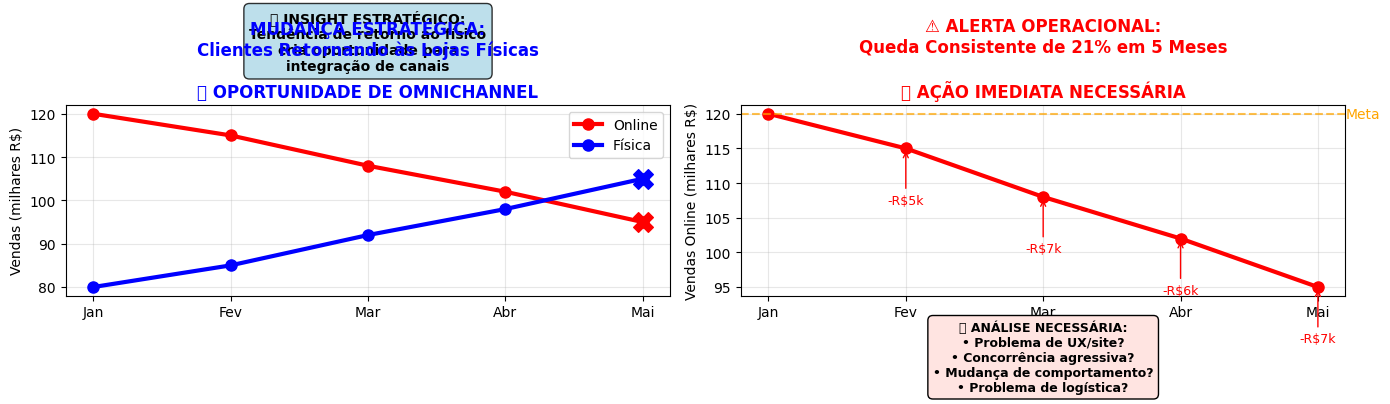

🎯 COMO O CONTEXTO MUDOU A NARRATIVA:

👔 PARA O CEO (Contexto Estratégico):
   • Foco: Oportunidade de negócio
   • Linguagem: 'Mudança estratégica', 'Omnichannel'
   • Ação: Investir em integração de canais
   • Tom: Otimista, visionário

💻 PARA O GERENTE DE E-COMMERCE (Contexto Operacional):
   • Foco: Problema a ser resolvido
   • Linguagem: 'Queda consistente', 'Ação imediata'
   • Ação: Investigar causas específicas
   • Tom: Urgente, analítico

💡 MESMOS DADOS, HISTÓRIAS DIFERENTES:
   O contexto determina qual aspecto dos dados destacar
   e como apresentar a narrativa para máximo impacto


In [ ]:
# BLOCO 2: Demonstrando como o contexto muda a apresentação dos mesmos dados

print("\n🎯 ENTENDENDO O CONTEXTO - MESMOS DADOS, NARRATIVAS DIFERENTES")
print("=" * 75)
print("Cenário: Queda nas vendas online - como contexto muda a história")

# Dados base
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai']
vendas_online = [120, 115, 108, 102, 95]
vendas_fisica = [80, 85, 92, 98, 105]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# CONTEXTO 1: Para CEO (foco estratégico, alto nível)
ax1.plot(meses, vendas_online, 'ro-', linewidth=3, markersize=8, label='Online')
ax1.plot(meses, vendas_fisica, 'bo-', linewidth=3, markersize=8, label='Física')

# Destacando o ponto de cruzamento
crossover_idx = 4
ax1.scatter([crossover_idx], [vendas_online[crossover_idx]], s=200, color='red',
           marker='X', zorder=5)
ax1.scatter([crossover_idx], [vendas_fisica[crossover_idx]], s=200, color='blue',
           marker='X', zorder=5)

ax1.set_title('MUDANÇA ESTRATÉGICA:\nClientes Retornando às Lojas Físicas\n\n🎯 OPORTUNIDADE DE OMNICHANNEL',
              fontweight='bold', fontsize=12, color='blue')
ax1.set_ylabel('Vendas (milhares R$)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Contexto estratégico para CEO
ax1.text(2, 130, '💡 INSIGHT ESTRATÉGICO:\nTendência de retorno ao físico\ncria oportunidade para\nintegração de canais',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.8))

# CONTEXTO 2: Para gerente de e-commerce (foco operacional, detalhado)
ax2.plot(meses, vendas_online, 'ro-', linewidth=3, markersize=8, label='Online')

# Destacando cada queda mensal
for i in range(1, len(vendas_online)):
    queda = vendas_online[i-1] - vendas_online[i]
    ax2.annotate(f'-R${queda}k', xy=(i, vendas_online[i]),
                xytext=(i, vendas_online[i] - 8),
                arrowprops=dict(arrowstyle='->', color='red', lw=1),
                fontsize=9, color='red', ha='center')

# Linha de meta/benchmark
meta_online = 120
ax2.axhline(y=meta_online, color='orange', linestyle='--', alpha=0.7)
ax2.text(4.2, meta_online, 'Meta', va='center', fontsize=10, color='orange')

ax2.set_title('⚠️ ALERTA OPERACIONAL:\nQueda Consistente de 21% em 5 Meses\n\n🚨 AÇÃO IMEDIATA NECESSÁRIA',
              fontweight='bold', fontsize=12, color='red')
ax2.set_ylabel('Vendas Online (milhares R$)')
ax2.grid(True, alpha=0.3)

# Contexto operacional para gerente
ax2.text(2, 80, '🔍 ANÁLISE NECESSÁRIA:\n• Problema de UX/site?\n• Concorrência agressiva?\n• Mudança de comportamento?\n• Problema de logística?',
         ha='center', fontsize=9, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="mistyrose"))

plt.tight_layout()
plt.show()

print("🎯 COMO O CONTEXTO MUDOU A NARRATIVA:")
print("\n👔 PARA O CEO (Contexto Estratégico):")
print("   • Foco: Oportunidade de negócio")
print("   • Linguagem: 'Mudança estratégica', 'Omnichannel'")
print("   • Ação: Investir em integração de canais")
print("   • Tom: Otimista, visionário")

print("\n💻 PARA O GERENTE DE E-COMMERCE (Contexto Operacional):")
print("   • Foco: Problema a ser resolvido")
print("   • Linguagem: 'Queda consistente', 'Ação imediata'")
print("   • Ação: Investigar causas específicas")
print("   • Tom: Urgente, analítico")

print("\n💡 MESMOS DADOS, HISTÓRIAS DIFERENTES:")
print("   O contexto determina qual aspecto dos dados destacar")
print("   e como apresentar a narrativa para máximo impacto")

In [ ]:
# BLOCO 3: Framework prático para estruturar comunicação com dados

print("\n📋 FRAMEWORK PRÁTICO - ESTRUTURANDO COMUNICAÇÃO EFICAZ")
print("=" * 70)

framework_steps = [
    ("🎯 1. DEFINA O CONTEXTO", [
        "Quem é o público e qual seu nível de conhecimento?",
        "Qual decisão precisa ser tomada?",
        "Qual a urgência e importância?",
        "Que resistências ou preocupações existem?"
    ]),

    ("📖 2. CONSTRUA A NARRATIVA", [
        "Qual é o protagonista da história?",
        "Qual é o conflito ou tensão?",
        "Que jornada os dados revelam?",
        "Qual é a resolução acionável?"
    ]),

    ("📊 3. ESCOLHA AS EVIDÊNCIAS", [
        "Quais dados suportam a narrativa?",
        "Que visualizações tornam os insights óbvios?",
        "Que comparações ou contexto são necessários?",
        "Que objeções os dados podem antecipar?"
    ]),

    ("🎨 4. DESENHE A EXPERIÊNCIA", [
        "Como estruturar a sequência de informações?",
        "Onde colocar os insights mais importantes?",
        "Como usar design para guiar a atenção?",
        "Que elementos visuais reforçam a mensagem?"
    ]),

    ("⚡ 5. TESTE E REFINE", [
        "A mensagem principal fica clara em 30 segundos?",
        "As ações necessárias são óbvias?",
        "O público tem informação suficiente para decidir?",
        "A apresentação inspira confiança e credibilidade?"
    ])
]

for fase, checklist in framework_steps:
    print(f"\n{fase}:")
    for item in checklist:
        print(f"   ☐ {item}")

print("\n" + "=" * 70)
print("🏆 RESULTADO DE UMA COMUNICAÇÃO EFICAZ:")
print("   ✅ Público entende a situação rapidamente")
print("   ✅ Decisões são tomadas com base em evidências claras")
print("   ✅ Ações específicas são iniciadas")
print("   ✅ Stakeholders sentem-se confiantes nas escolhas")

print("\n💡 LEMBRE-SE:")
print("   Dados informam → Histórias transformam → Ações geram resultados")




📋 FRAMEWORK PRÁTICO - ESTRUTURANDO COMUNICAÇÃO EFICAZ

🎯 1. DEFINA O CONTEXTO:
   ☐ Quem é o público e qual seu nível de conhecimento?
   ☐ Qual decisão precisa ser tomada?
   ☐ Qual a urgência e importância?
   ☐ Que resistências ou preocupações existem?

📖 2. CONSTRUA A NARRATIVA:
   ☐ Qual é o protagonista da história?
   ☐ Qual é o conflito ou tensão?
   ☐ Que jornada os dados revelam?
   ☐ Qual é a resolução acionável?

📊 3. ESCOLHA AS EVIDÊNCIAS:
   ☐ Quais dados suportam a narrativa?
   ☐ Que visualizações tornam os insights óbvios?
   ☐ Que comparações ou contexto são necessários?
   ☐ Que objeções os dados podem antecipar?

🎨 4. DESENHE A EXPERIÊNCIA:
   ☐ Como estruturar a sequência de informações?
   ☐ Onde colocar os insights mais importantes?
   ☐ Como usar design para guiar a atenção?
   ☐ Que elementos visuais reforçam a mensagem?

⚡ 5. TESTE E REFINE:
   ☐ A mensagem principal fica clara em 30 segundos?
   ☐ As ações necessárias são óbvias?
   ☐ O público tem informaçã


🎬 EXEMPLO COMPLETO - DO INSIGHT À NARRATIVA ACIONÁVEL
Caso: Análise de satisfação do cliente que gerou mudança organizacional


/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4158703559.py:80: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaV

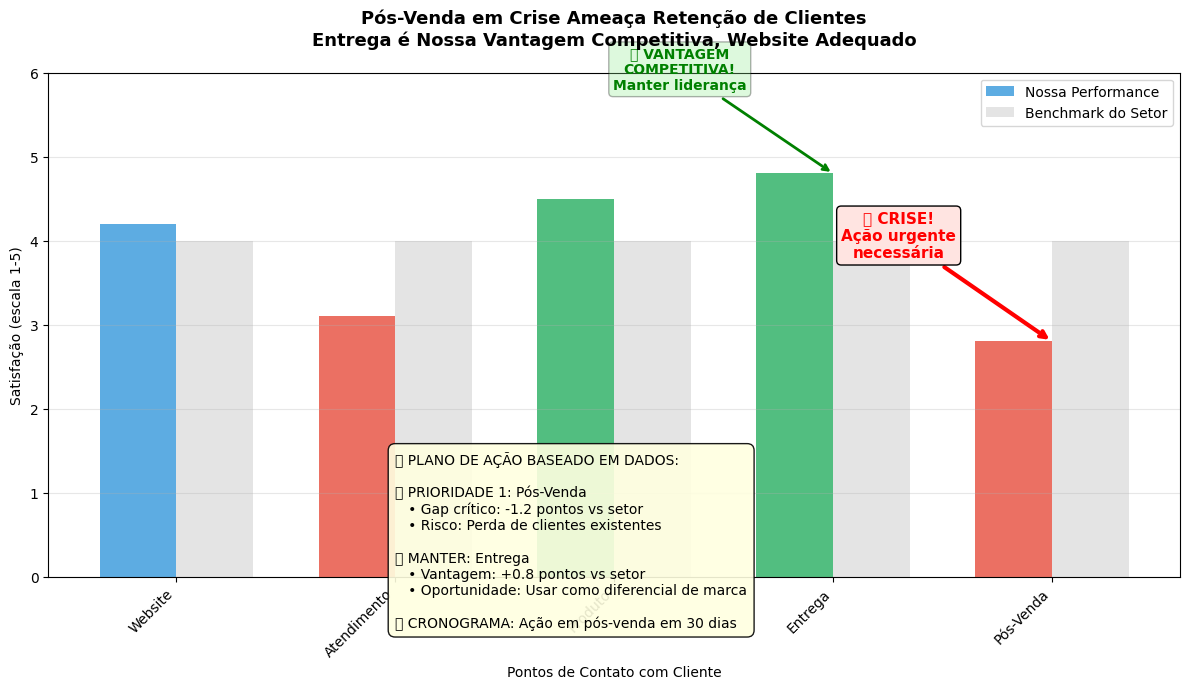

🎬 ELEMENTOS DA NARRATIVA APLICADOS:
   🎭 Protagonista: Experiência do Cliente
   ⚔️ Conflito: Pós-venda em crise vs Entrega excelente
   📊 Evidência: Dados comparativos com setor
   🎯 Resolução: Plano de ação específico e cronograma
   📢 Tom: Urgente mas otimista (temos uma vantagem)

🏆 RESULTADO DESTA COMUNICAÇÃO:
   ✅ Problema identificado com precisão
   ✅ Urgência justificada com dados
   ✅ Ações específicas recomendadas
   ✅ Cronograma realista estabelecido
   ✅ Vantagem competitiva preservada


In [ ]:
# BLOCO 4: Exemplo completo - transformando insight em narrativa acionável

print("\n🎬 EXEMPLO COMPLETO - DO INSIGHT À NARRATIVA ACIONÁVEL")
print("=" * 65)
print("Caso: Análise de satisfação do cliente que gerou mudança organizacional")

# Dados de satisfação por touchpoint
touchpoints = ['Website', 'Atendimento', 'Produto', 'Entrega', 'Pós-Venda']
satisfacao_atual = [4.2, 3.1, 4.5, 4.8, 2.8]
benchmark_setor = [4.0, 4.0, 4.0, 4.0, 4.0]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Criando visualização com narrativa integrada
x_pos = np.arange(len(touchpoints))
width = 0.35

# Barras com cores que contam a história
cores_historia = []
for satisf, bench in zip(satisfacao_atual, benchmark_setor):
    if satisf >= bench + 0.5:
        cores_historia.append('#27AE60')  # Verde: Força competitiva
    elif satisf >= bench:
        cores_historia.append('#3498DB')  # Azul: Adequado
    elif satisf >= bench - 0.5:
        cores_historia.append('#F39C12')  # Laranja: Atenção
    else:
        cores_historia.append('#E74C3C')  # Vermelho: Crise

bars1 = ax.bar(x_pos - width/2, satisfacao_atual, width,
               color=cores_historia, alpha=0.8, label='Nossa Performance')
bars2 = ax.bar(x_pos + width/2, benchmark_setor, width,
               color='lightgray', alpha=0.6, label='Benchmark do Setor')

# Adicionando elementos narrativos
# 1. Título que conta a história principal
ax.set_title('Pós-Venda em Crise Ameaça Retenção de Clientes\nEntrega é Nossa Vantagem Competitiva, Website Adequado',
             fontweight='bold', fontsize=13, pad=20)

# 2. Destacando o problema crítico
ax.annotate('🚨 CRISE!\nAção urgente\nnecessária',
            xy=(4, satisfacao_atual[4]), xytext=(3.3, satisfacao_atual[4] + 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=3),
            fontsize=11, fontweight='bold', color='red', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="mistyrose"))

# 3. Destacando a força
ax.annotate('💪 VANTAGEM\nCOMPETITIVA!\nManter liderança',
            xy=(3, satisfacao_atual[3]), xytext=(2.3, satisfacao_atual[3] + 1),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, fontweight='bold', color='green', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.3))

# 4. Contextualizando com números
gap_pos_venda = benchmark_setor[4] - satisfacao_atual[4]
vantagem_entrega = satisfacao_atual[3] - benchmark_setor[3]

# 5. Box com próximos passos
ax.text(1, 1.5,
        f'📋 PLANO DE AÇÃO BASEADO EM DADOS:\n\n' +
        f'🔴 PRIORIDADE 1: Pós-Venda\n' +
        f'   • Gap crítico: -{gap_pos_venda:.1f} pontos vs setor\n' +
        f'   • Risco: Perda de clientes existentes\n\n' +
        f'🟢 MANTER: Entrega\n' +
        f'   • Vantagem: +{vantagem_entrega:.1f} pontos vs setor\n' +
        f'   • Oportunidade: Usar como diferencial de marca\n\n' +
        f'⏰ CRONOGRAMA: Ação em pós-venda em 30 dias',
        fontsize=10, ha='left', va='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9))

# Configurações finais
ax.set_xlabel('Pontos de Contato com Cliente')
ax.set_ylabel('Satisfação (escala 1-5)')
ax.set_xticks(x_pos)
ax.set_xticklabels(touchpoints, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 6)

plt.tight_layout()
plt.show()

print("🎬 ELEMENTOS DA NARRATIVA APLICADOS:")
print("   🎭 Protagonista: Experiência do Cliente")
print("   ⚔️ Conflito: Pós-venda em crise vs Entrega excelente")
print("   📊 Evidência: Dados comparativos com setor")
print("   🎯 Resolução: Plano de ação específico e cronograma")
print("   📢 Tom: Urgente mas otimista (temos uma vantagem)")

print(f"\n🏆 RESULTADO DESTA COMUNICAÇÃO:")
print("   ✅ Problema identificado com precisão")
print("   ✅ Urgência justificada com dados")
print("   ✅ Ações específicas recomendadas")
print("   ✅ Cronograma realista estabelecido")
print("   ✅ Vantagem competitiva preservada")

